In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
structure_data=pd.read_excel('Artificial_Data.xlsx')
structure_data.head(2)

RATING_TYPE Rating  FundaIndxint  FundaIndxsga  monthvwretd  monthvwretx  \
0       Fitch     A+      0.150659     -0.420047    -0.846934     0.560226   
1     Moody's     BB     -0.015715      0.139204    -0.045250    -0.912128   

   monthewretd  monthewretx  monthsprtrn  monthspindx  ...   at_turn  \
0     0.579303    -0.578314    -0.225006    -0.415867  ... -0.810215   
1     0.497292    -0.910558     1.207592    -0.104050  ...  1.201837   

   rect_turn  pay_turn  sale_invcap  sale_equity   rd_sale  adv_sale  \
0   0.308114 -0.596329    -0.235425    -0.456676  1.878286 -1.338060   
1  -0.469586  0.925473    -0.021617    -0.410984  1.426555 -1.121401   

   staff_sale   accrual                                      string_values  
0    0.862565  0.822648  Challenges remain in the supply chain, but str...  
1    0.853764  0.978653  The company reported a steady increase in reve...  

[2 rows x 154 columns]

In [5]:
structure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 154 entries, RATING_TYPE to string_values
dtypes: float64(151), object(3)
memory usage: 120.4+ KB


In [6]:
structure_data['RATING_TYPE'].unique()

array(['Fitch', "Moody's", 'S&P'], dtype=object)

In [7]:
structure_data['Rating'].unique()

array(['A+', 'BB', 'BBB', 'AA', 'AAA', 'A', 'AA+', 'BBB+'], dtype=object)

In [4]:
# object_columns = structure_data.select_dtypes(include=['object'])

# # Separate int and float columns
# numeric_columns = structure_data.select_dtypes(include=['number'])

In [9]:
numeric_columns=structure_data.copy()

In [10]:
numeric_columns.drop(columns=['string_values'],inplace=True)
numeric_columns.shape

(100, 153)

In [11]:
numeric_columns.describe()

FundaIndxint  FundaIndxsga  monthvwretd  monthvwretx  monthewretd  \
count    100.000000    100.000000   100.000000   100.000000   100.000000   
mean      -0.067201      0.075317     0.010728     0.127477     0.093248   
std        1.017370      1.029466     1.091580     1.093258     1.111350   
min       -2.318068     -2.339597    -3.478169    -2.277950    -2.572931   
25%       -0.733156     -0.587366    -0.681876    -0.528532    -0.636587   
50%       -0.150513      0.100186     0.020146     0.141856     0.208633   
75%        0.537932      0.750813     0.613014     0.704034     0.806156   
max        3.061095      3.253985     2.539258     2.616700     3.174442   

       monthewretx  monthsprtrn  monthspindx  monthCAP1RET  monthCAP2RET  ...  \
count   100.000000   100.000000   100.000000    100.000000    100.000000  ...   
mean      0.032180    -0.026623     0.107747      0.166456     -0.016642  ...   
std       1.088224     1.025100     0.881458      1.090800      1.068152  ...   
min      -3.568205    -2.712490    -1.846772     -2.284820     -2.455125  ...   
25%      -0.624850    -0.511380    -0.542076     -0.489579     -0.669254  ...   
50%       0.037285     0.052313     0.076285      0.084101      0.006114  ...   
75%       0.824912     0.733167     0.649335      0.937880      0.779529  ...   
max       2.760762     1.601238     2.564058      3.094049      2.307792  ...   

         de_ratio     at_turn   rect_turn    pay_turn  sale_invcap  \
count  100.000000  100.000000  100.000000  100.000000   100.000000   
mean     0.023786    0.071921    0.105777    0.075999    -0.035098   
std      0.939972    0.903357    0.836632    0.916895     0.883666   
min     -1.840672   -2.141136   -1.918081   -2.441242    -2.041328   
25%     -0.630071   -0.536992   -0.474784   -0.455624    -0.558593   
50%     -0.047836   -0.036914    0.060110    0.099997    -0.036728   
75%      0.580306    0.800664    0.599499    0.687332     0.575864   
max      2.378967    2.055849    2.241760    2.641072     2.129482   

       sale_equity     rd_sale    adv_sale  staff_sale     accrual  
count   100.000000  100.000000  100.000000  100.000000  100.000000  
mean      0.044566    0.039607    0.035657    0.201078   -0.002298  
std       0.937523    1.031948    0.949490    0.995136    0.954758  
min      -3.104605   -2.445939   -2.180120   -2.290097   -2.240399  
25%      -0.587734   -0.700866   -0.555797   -0.500505   -0.576669  
50%       0.013978    0.011593    0.026002    0.311479   -0.098740  
75%       0.781912    0.661605    0.590220    0.857408    0.687526  
max       2.090344    2.702611    2.166460    2.648904    2.113185  

[8 rows x 151 columns]

### Histogram to check data distribution

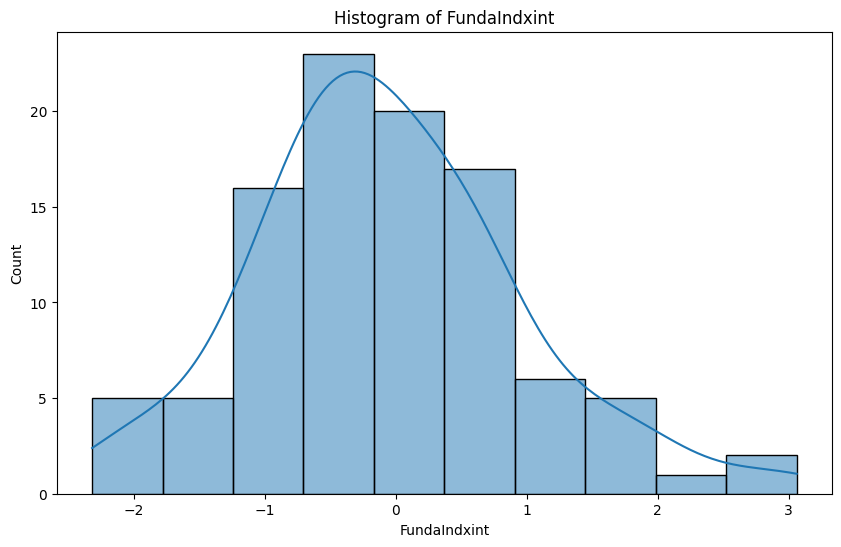

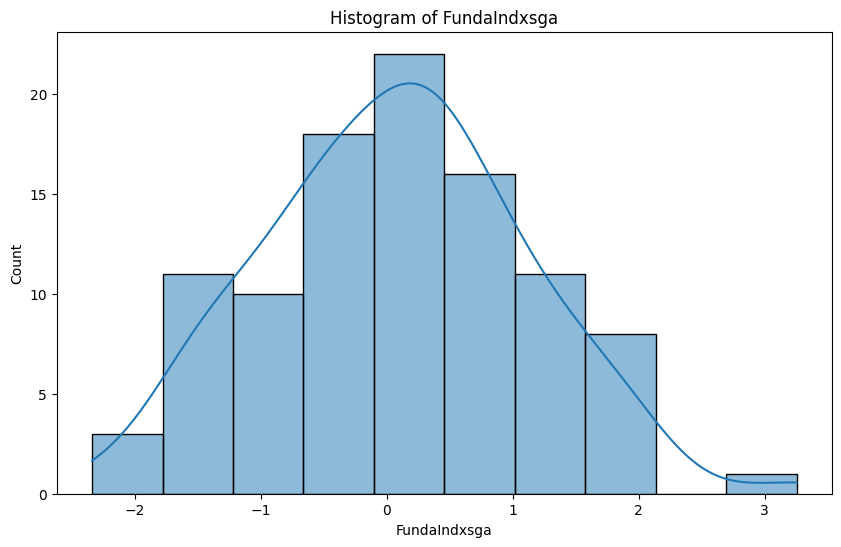

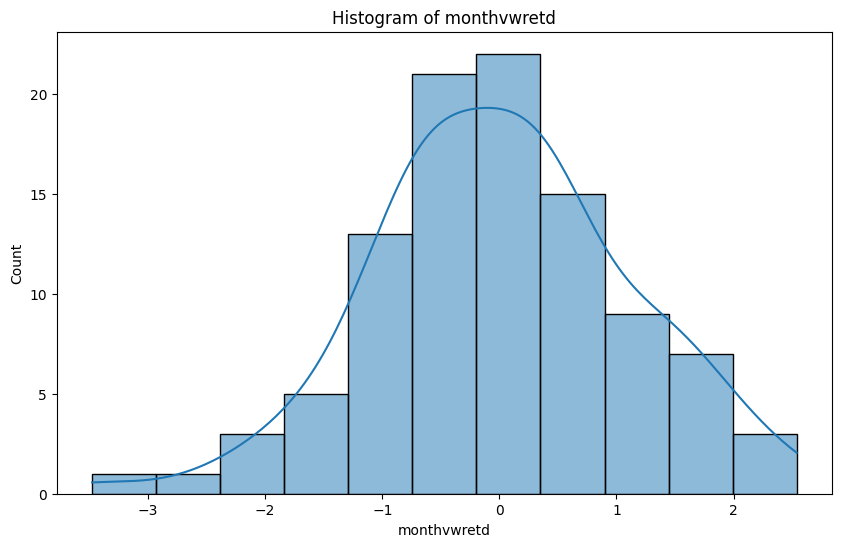

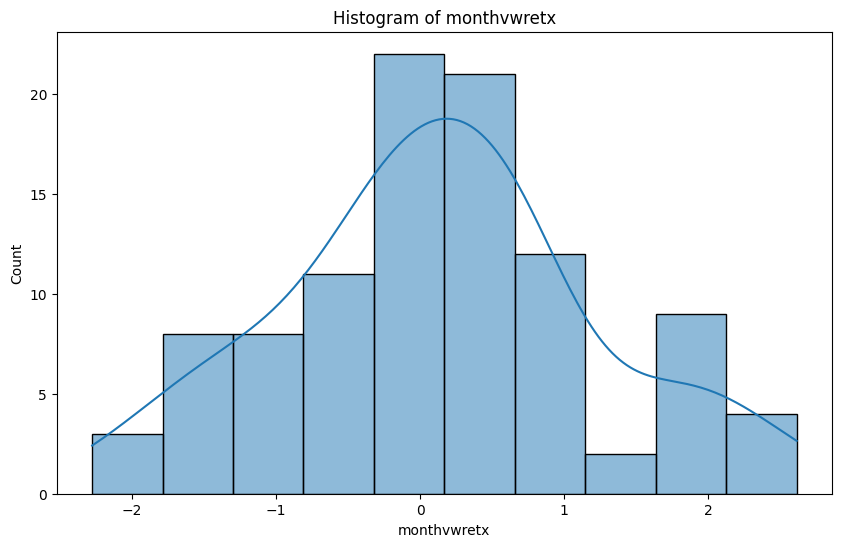

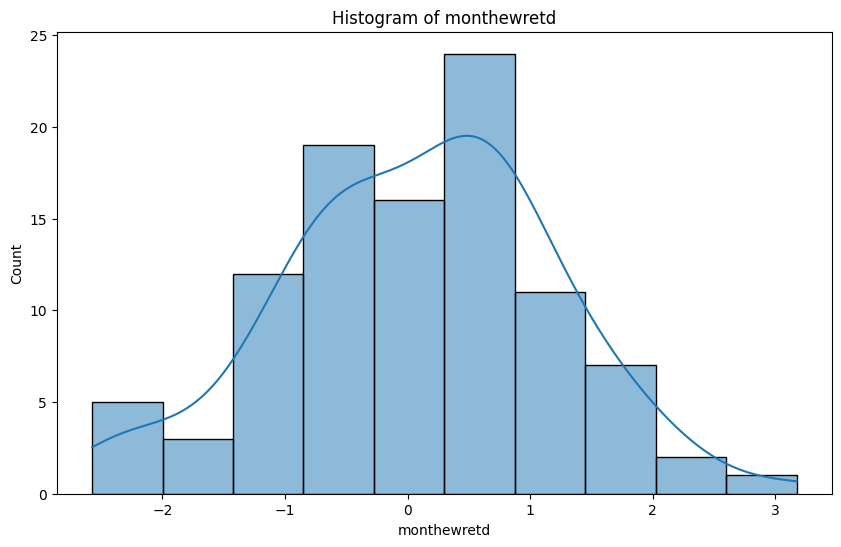

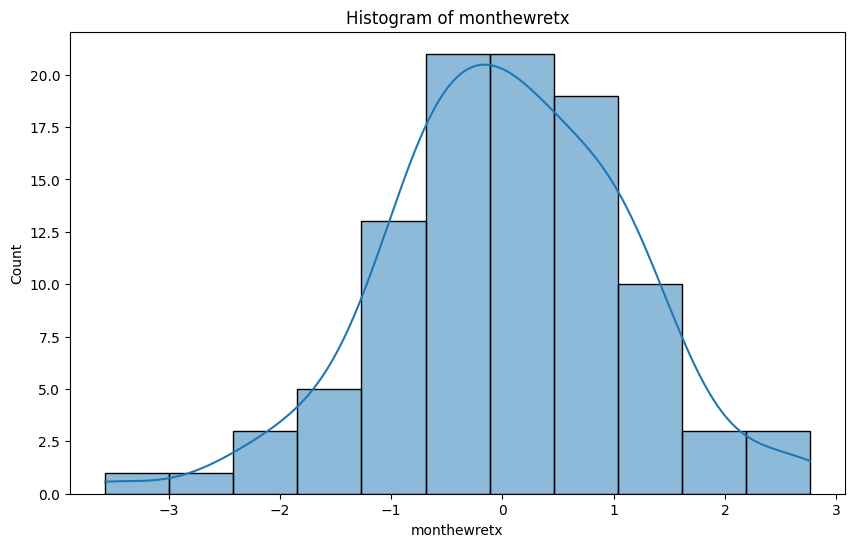

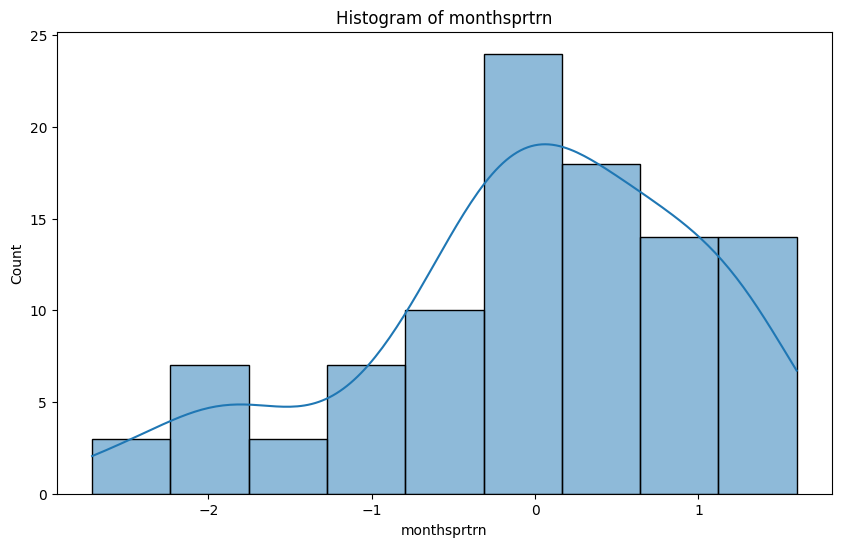

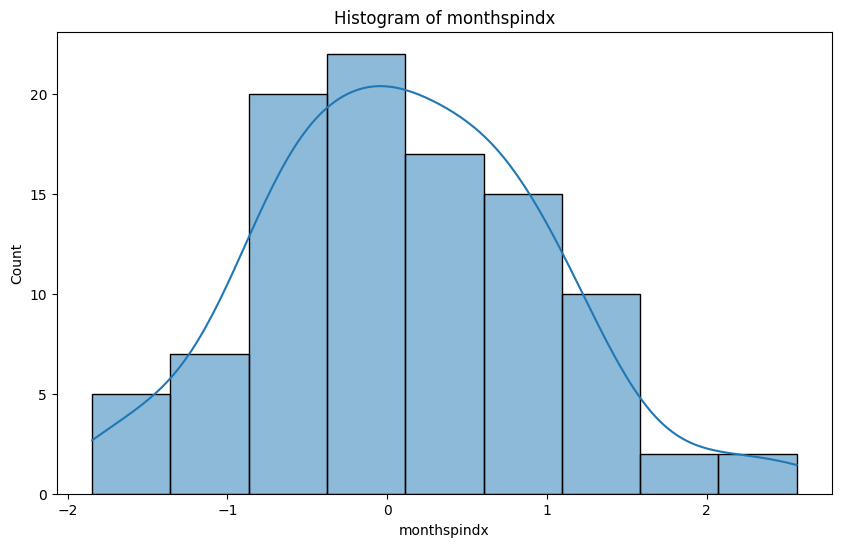

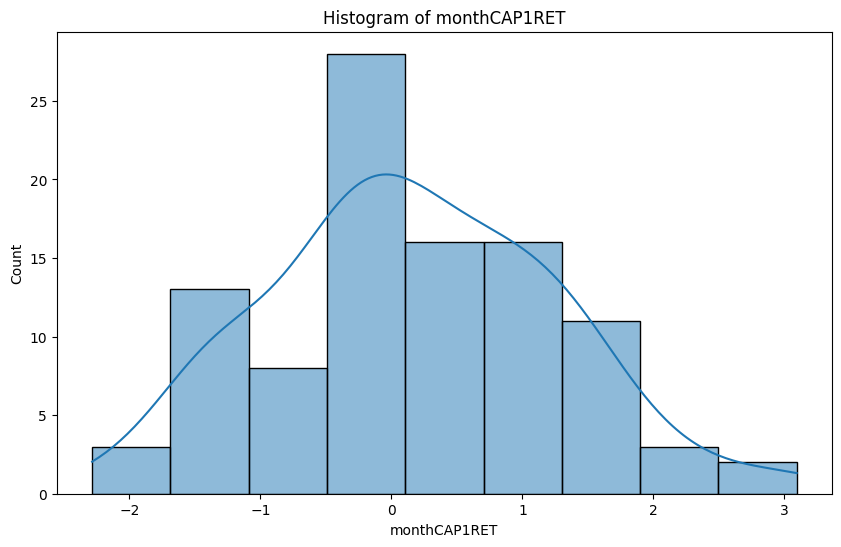

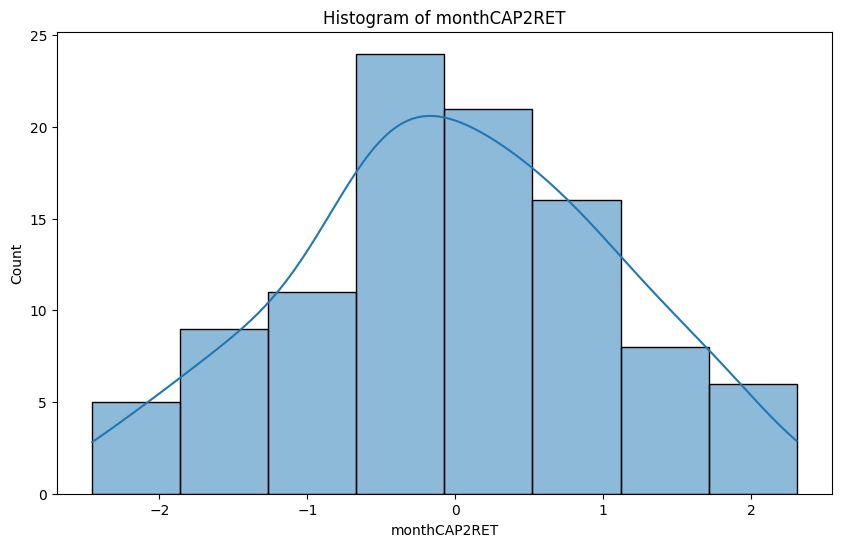

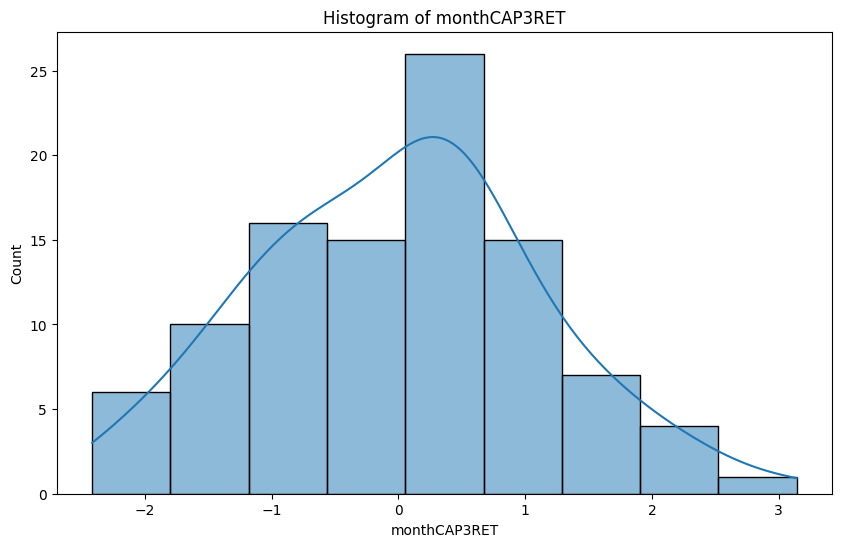

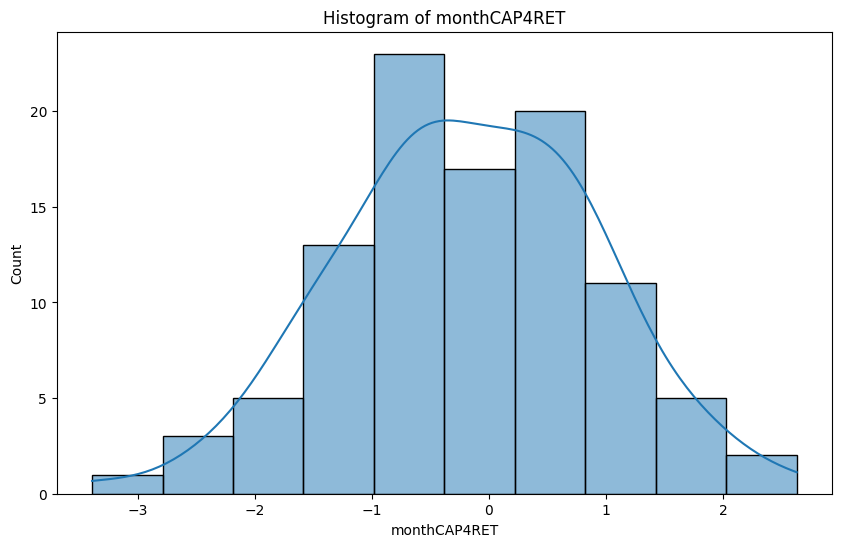

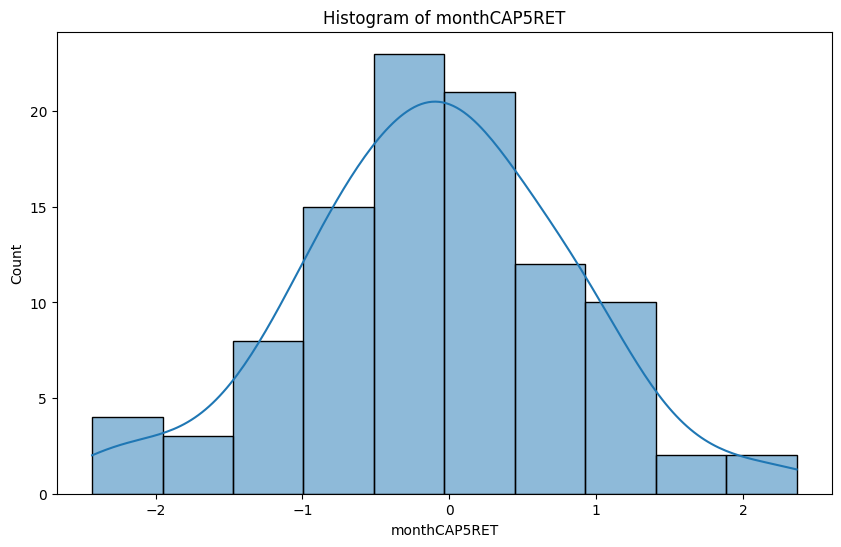

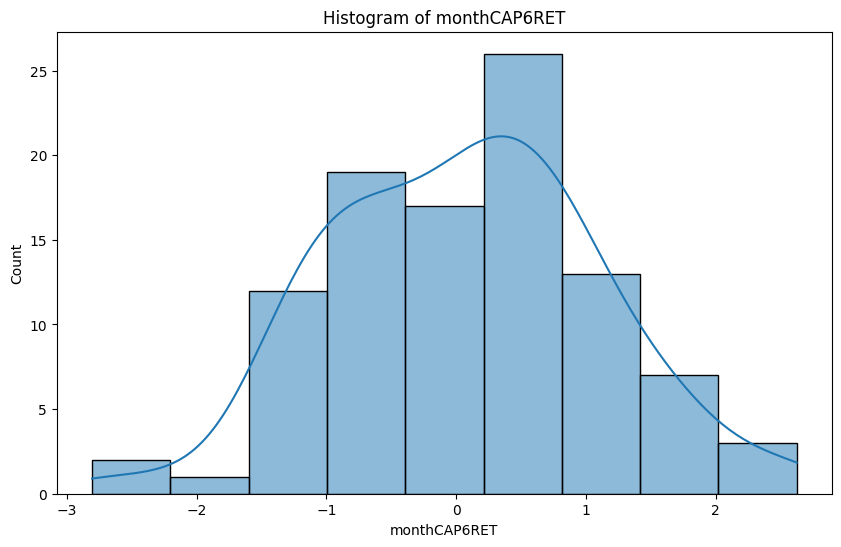

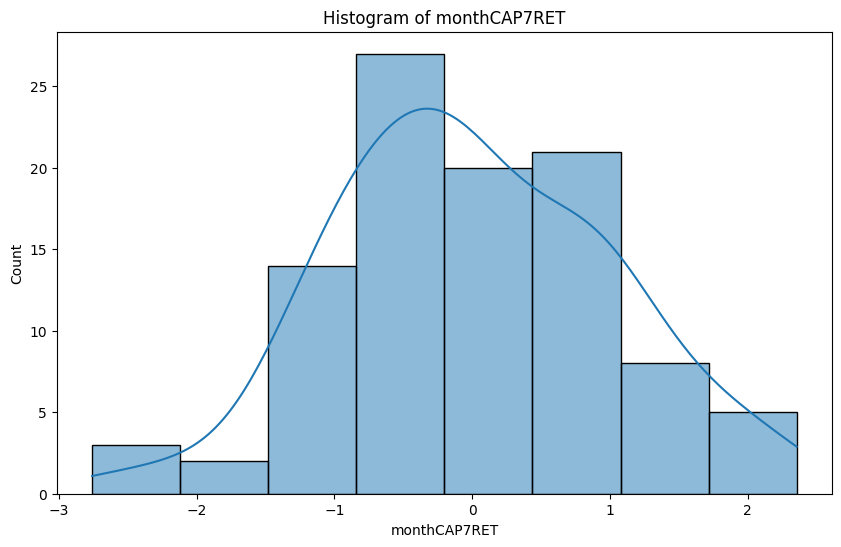

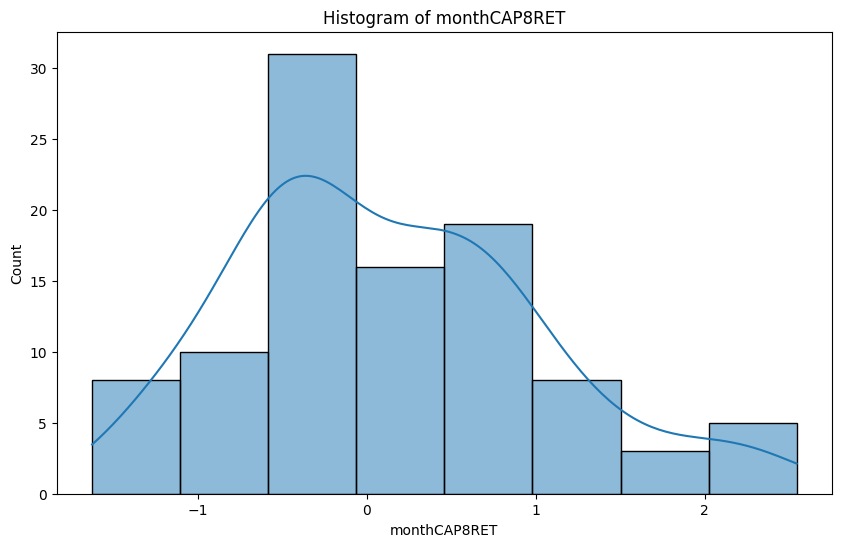

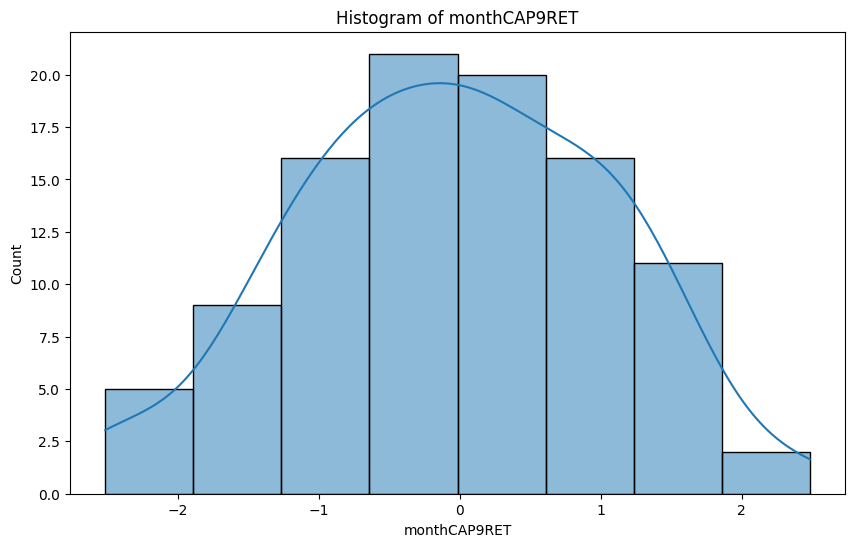

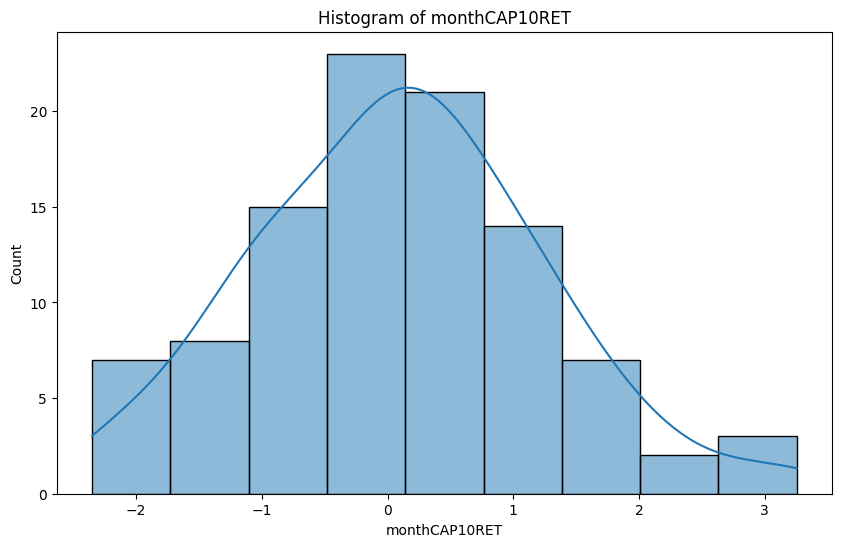

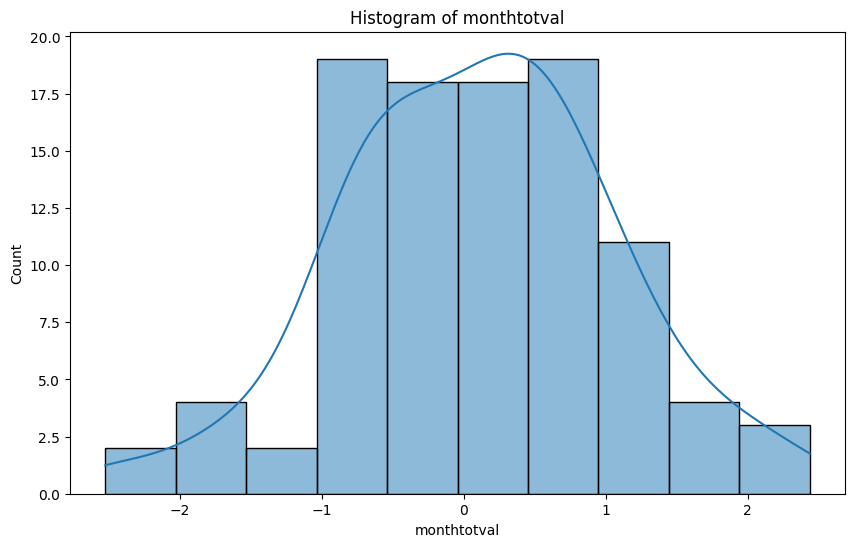

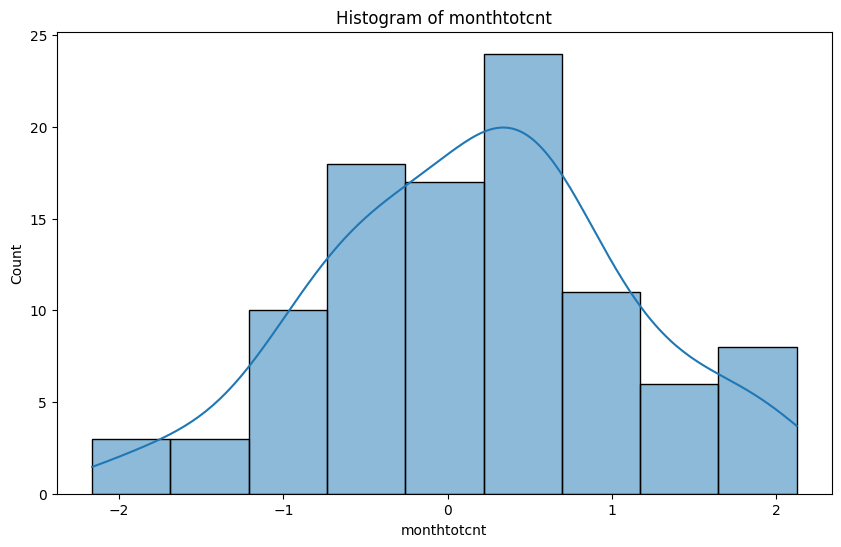

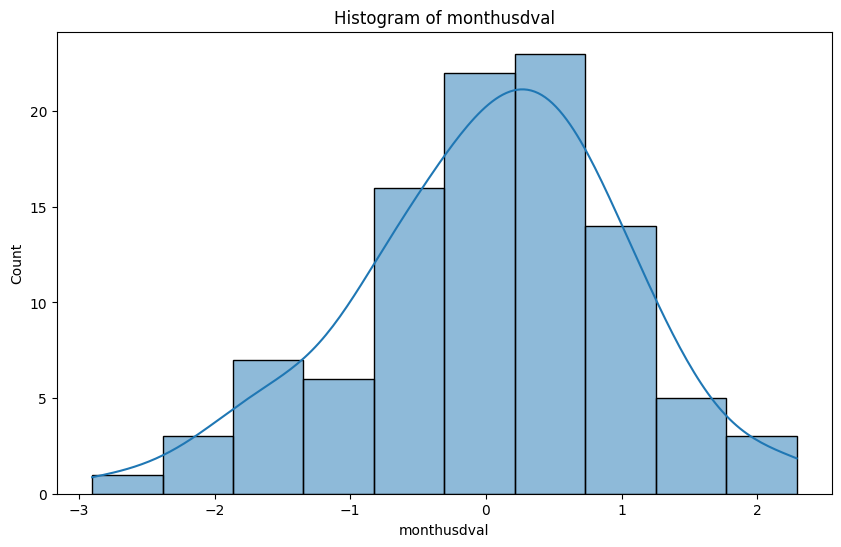

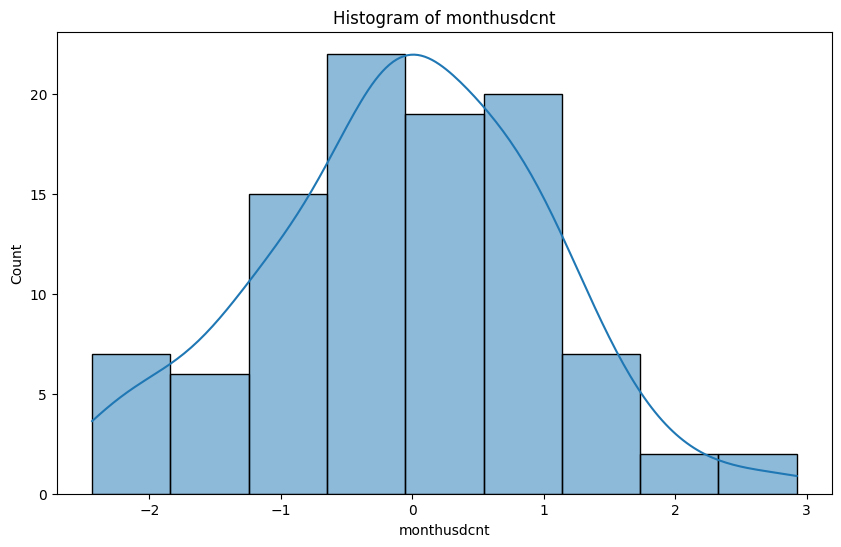

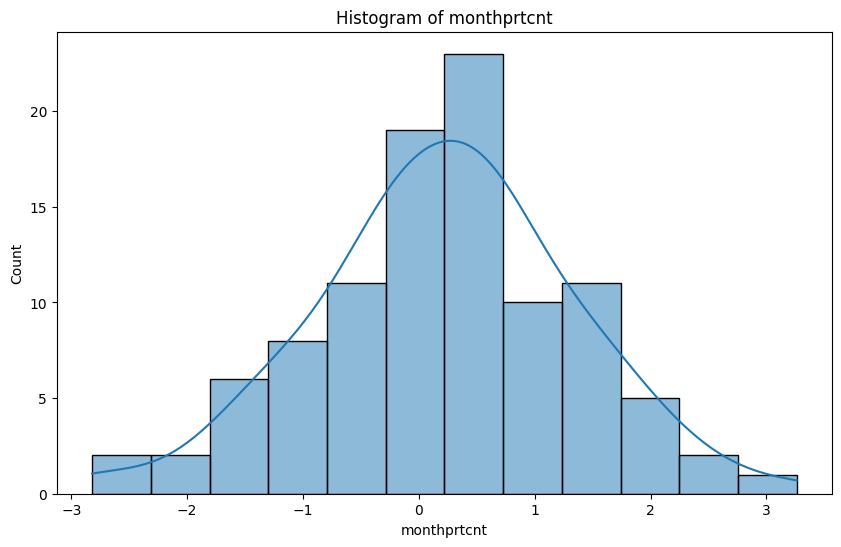

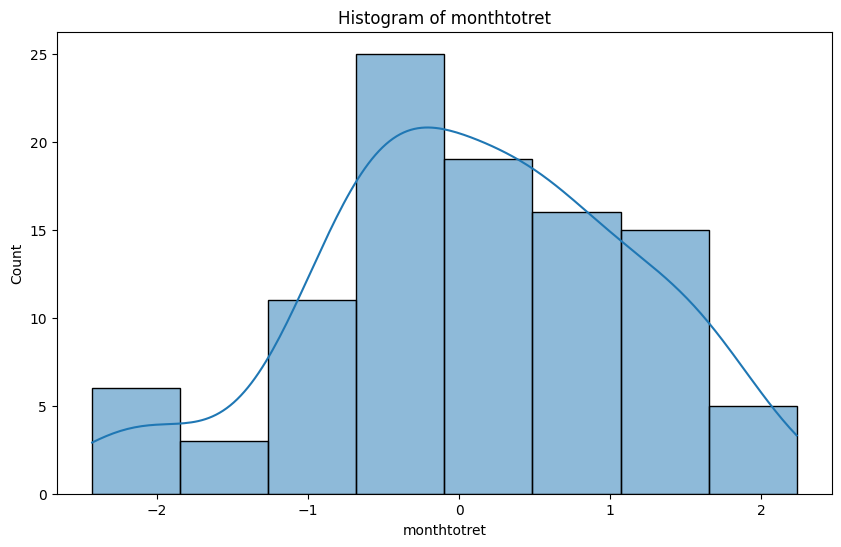

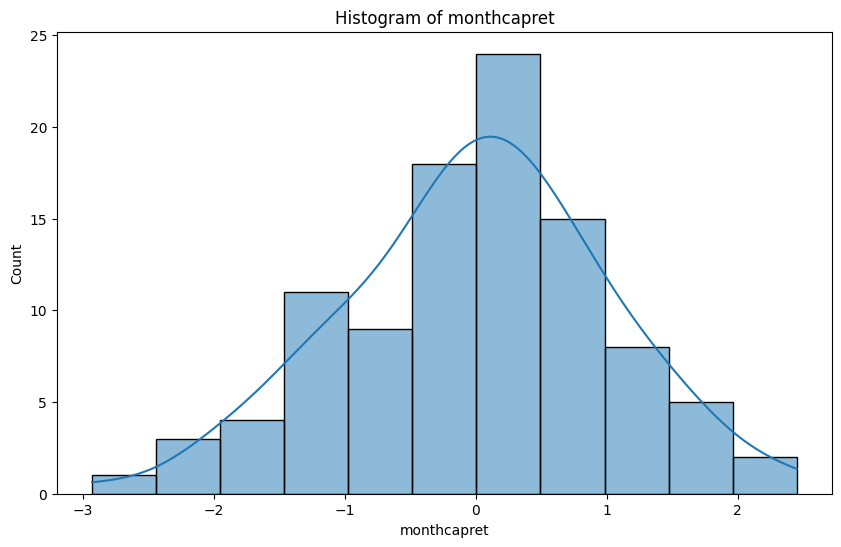

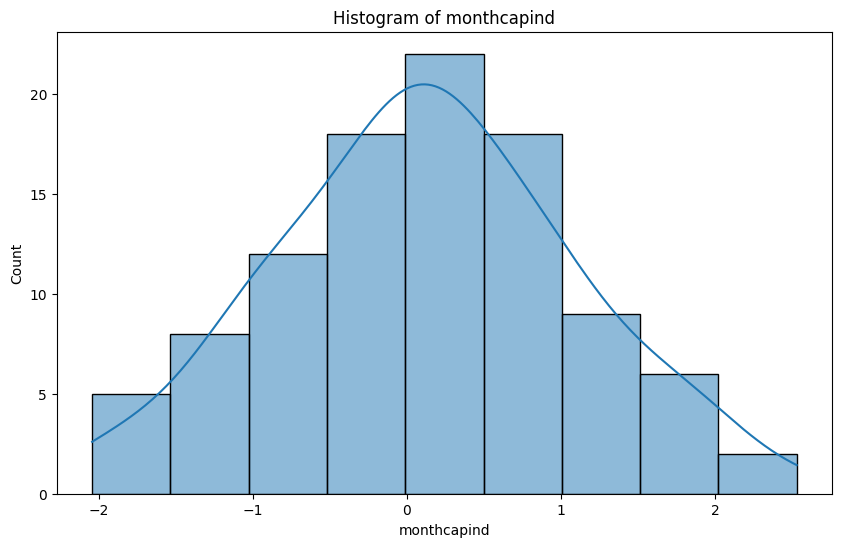

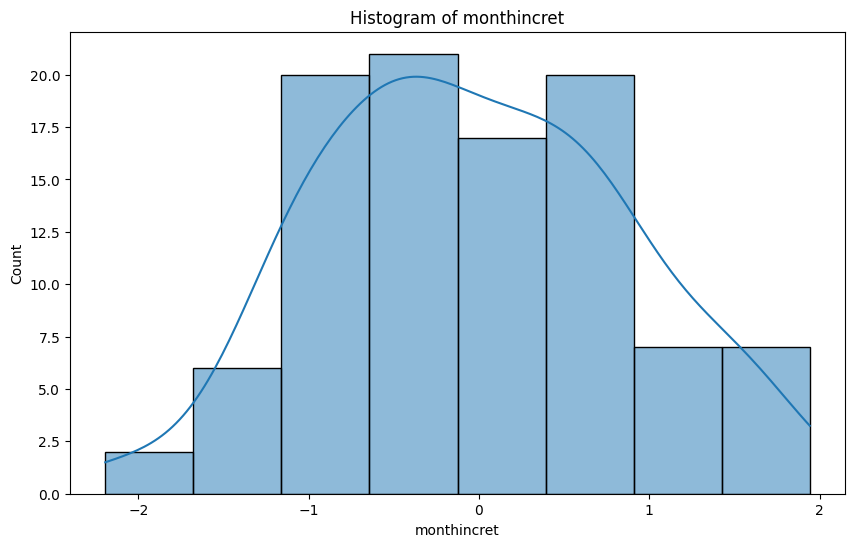

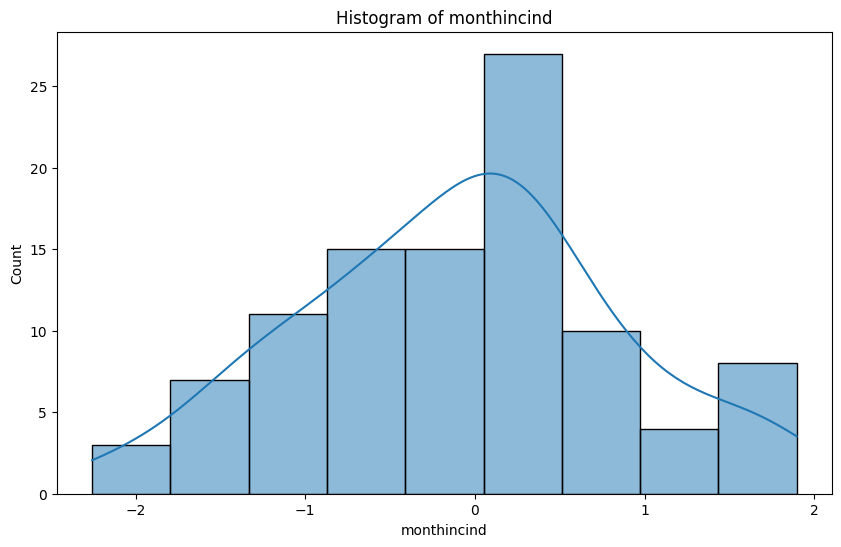

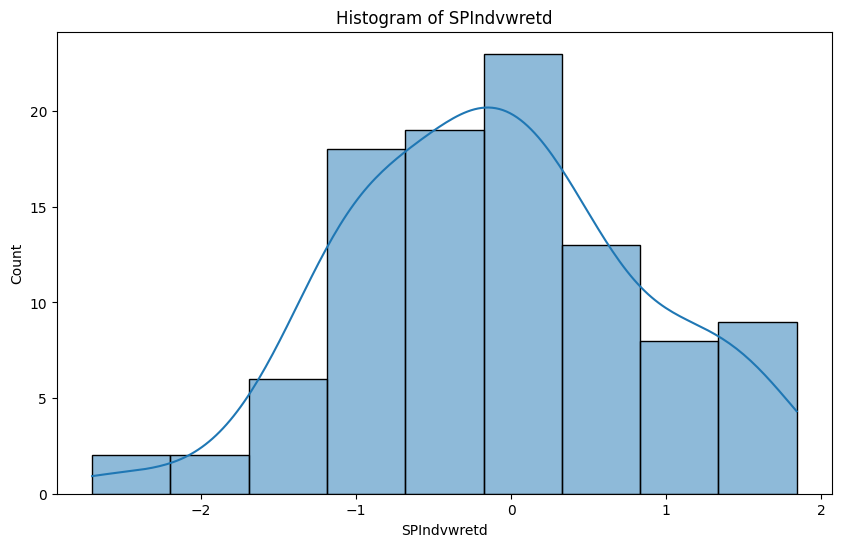

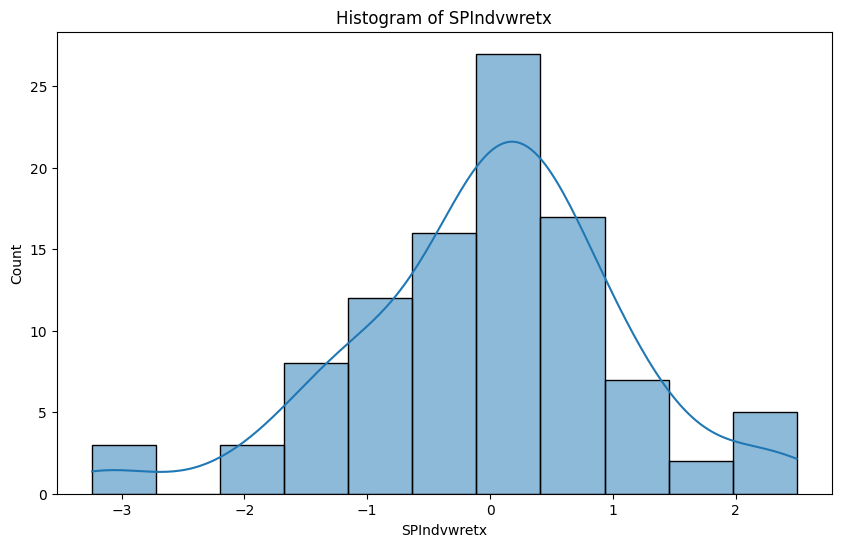

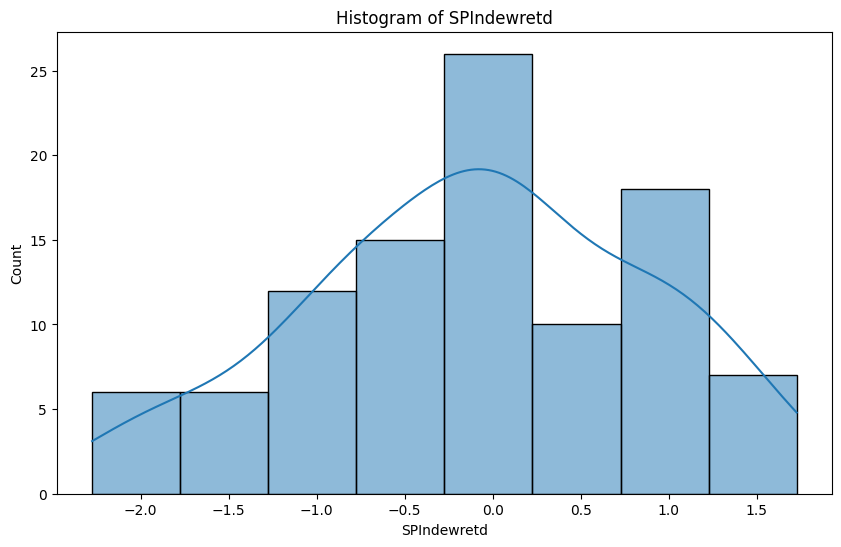

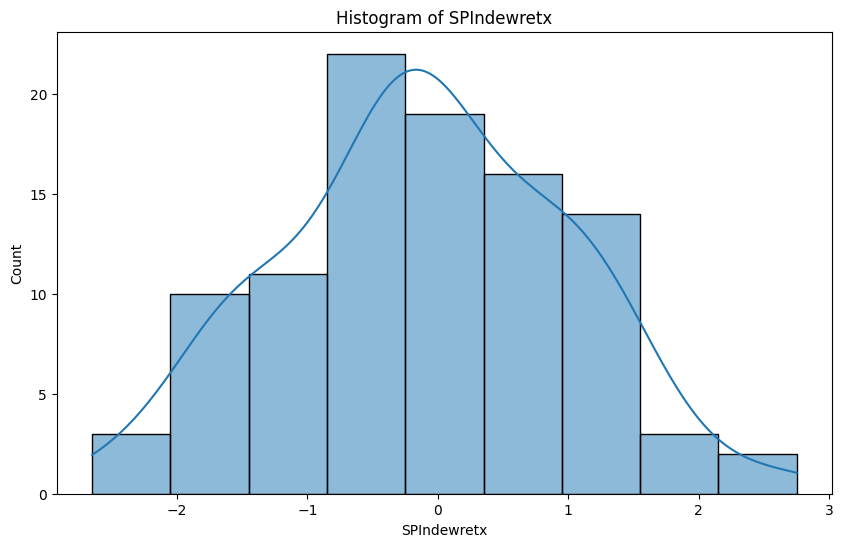

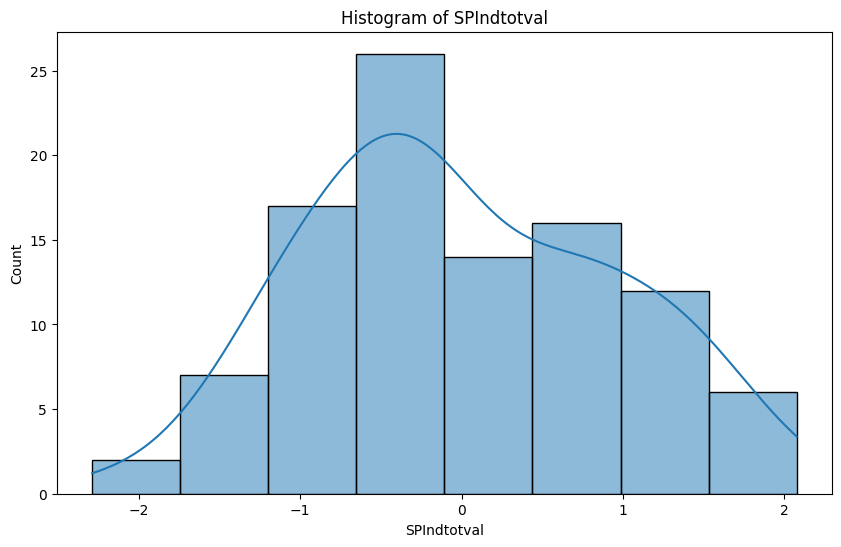

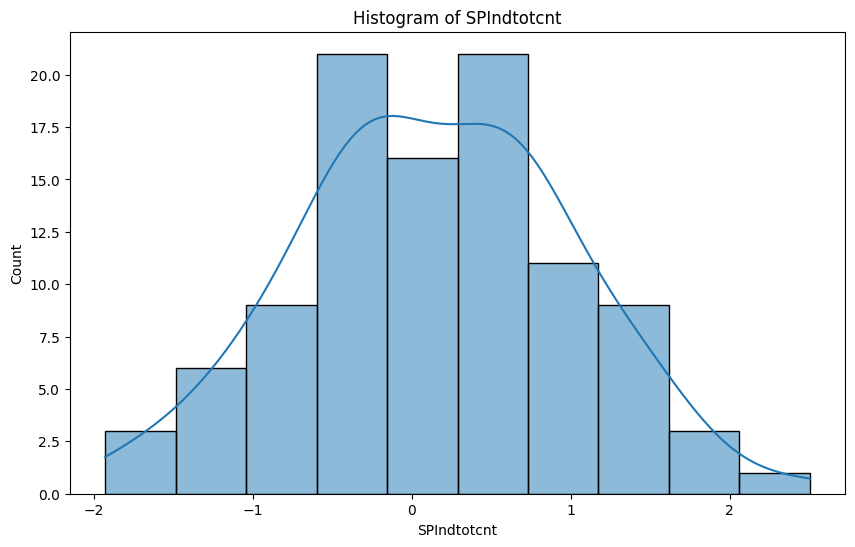

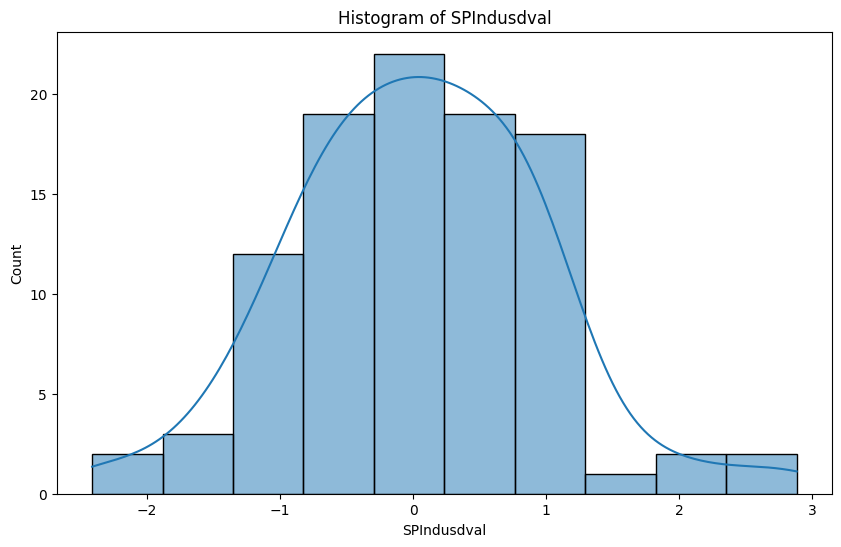

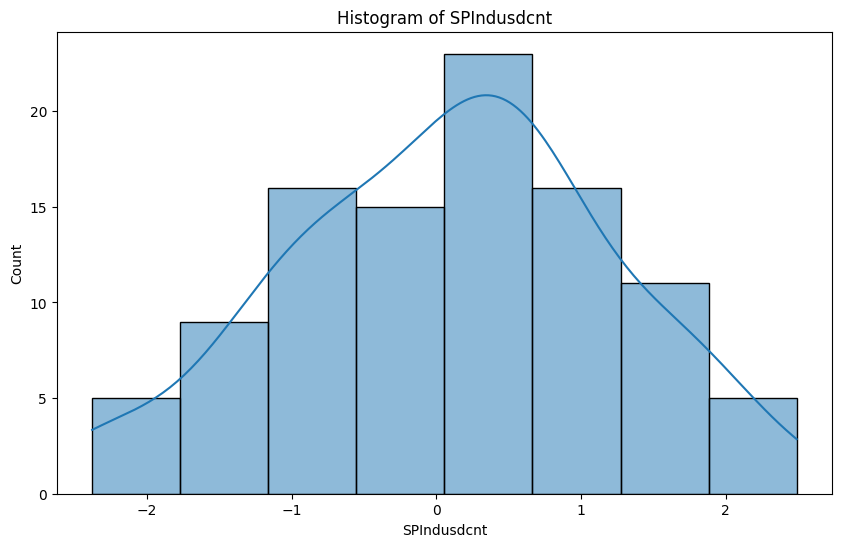

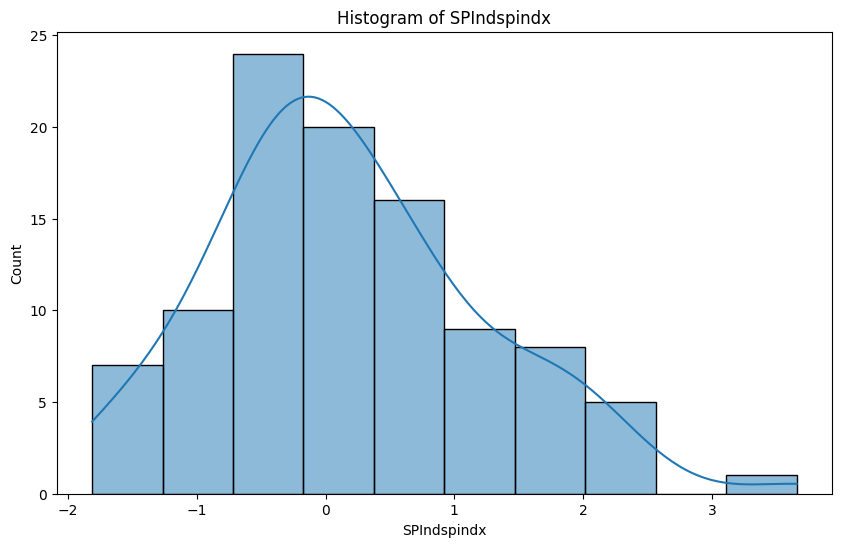

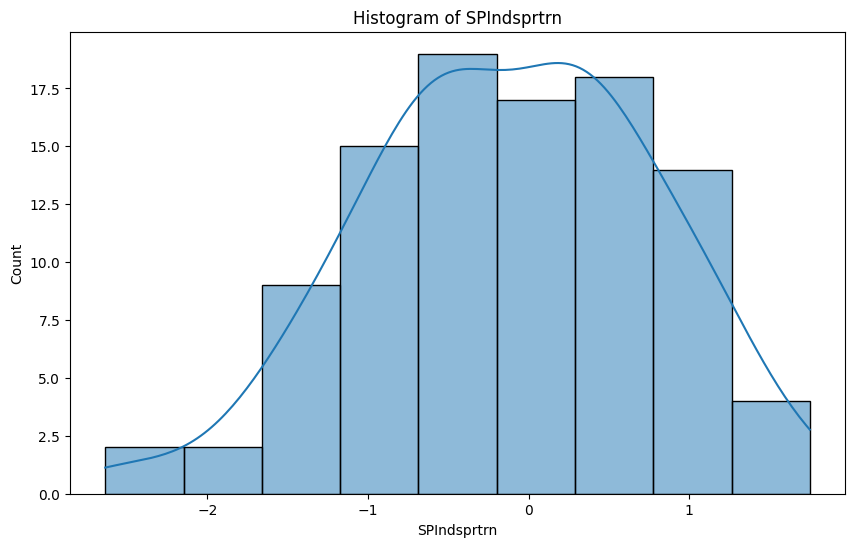

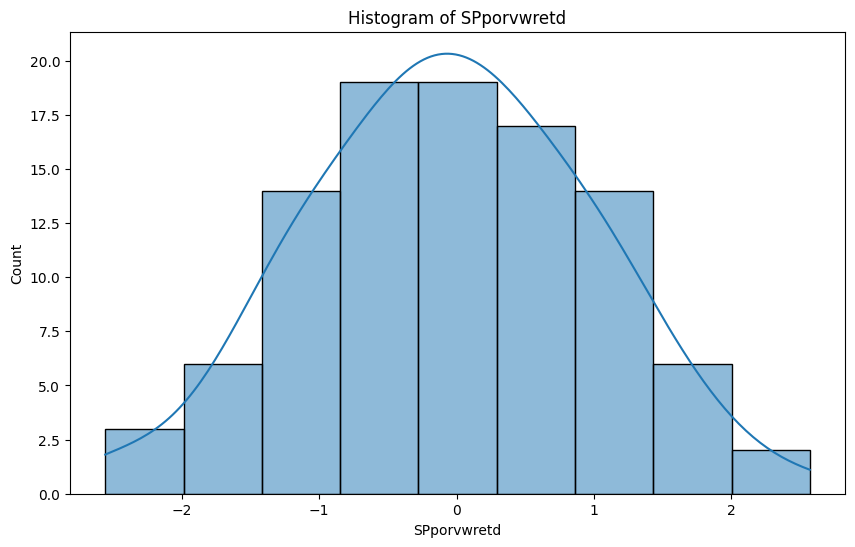

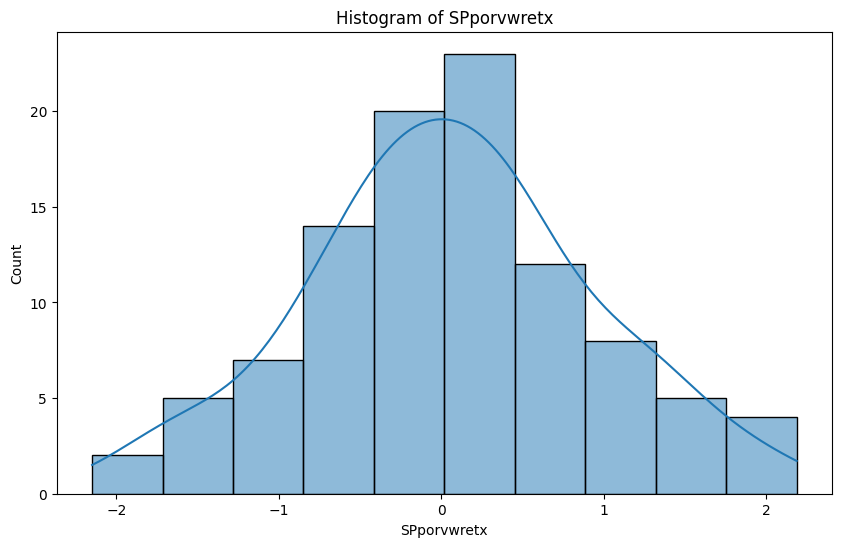

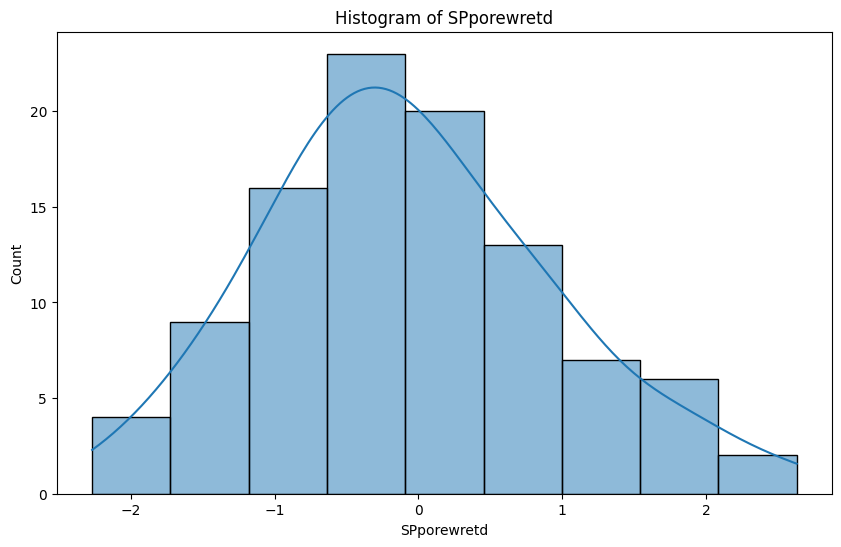

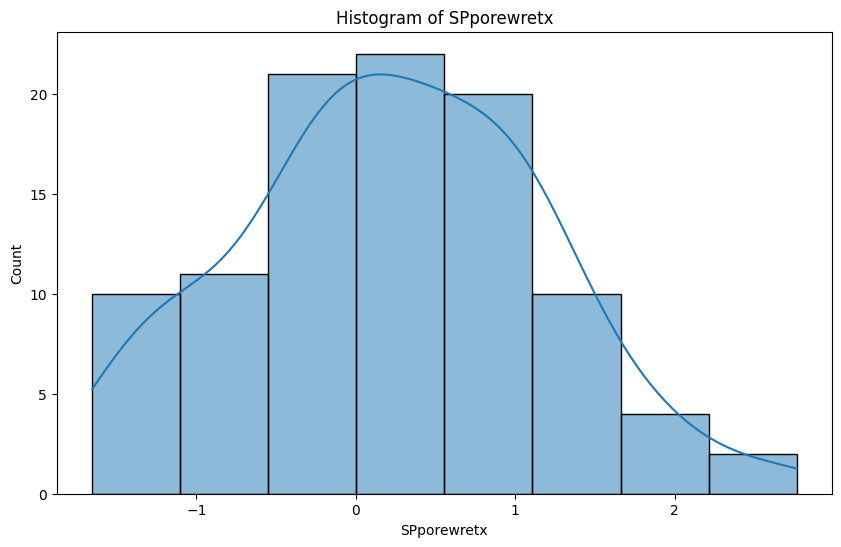

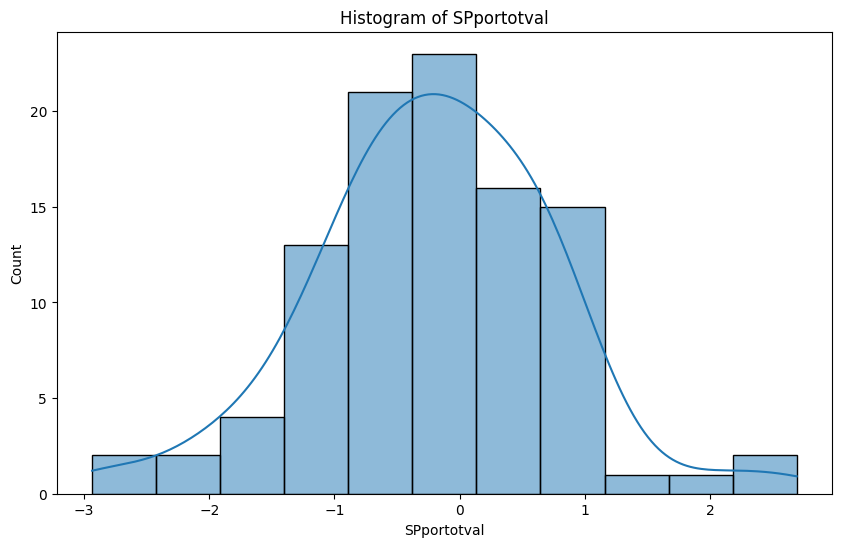

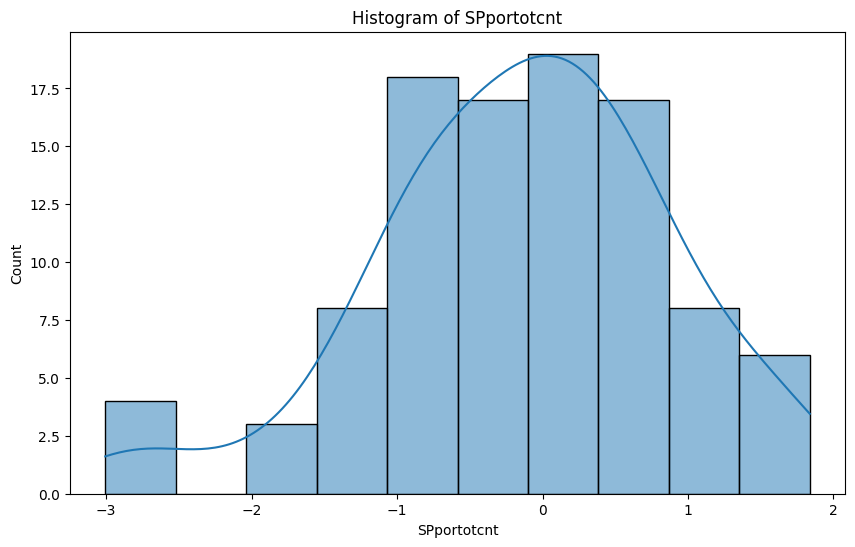

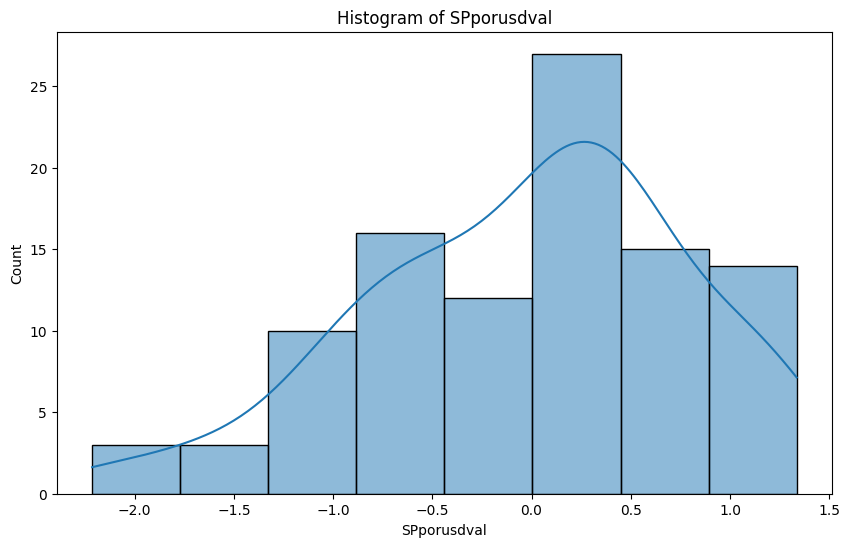

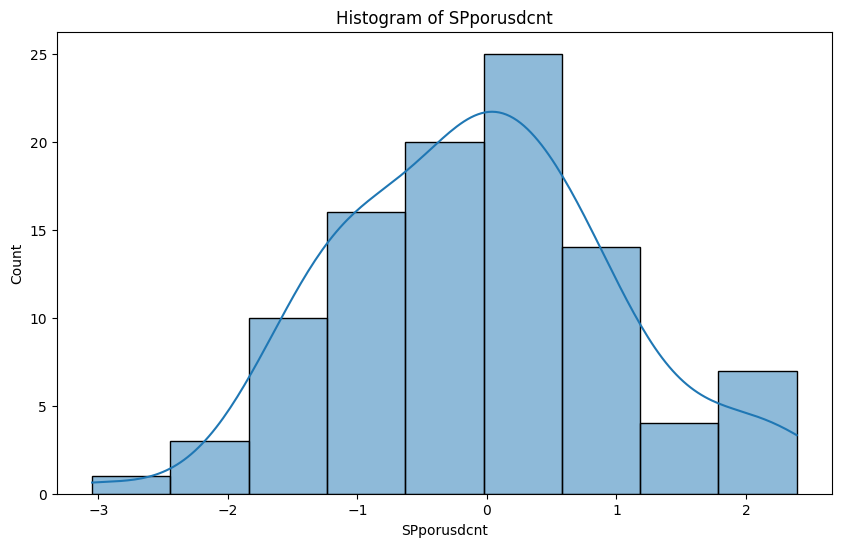

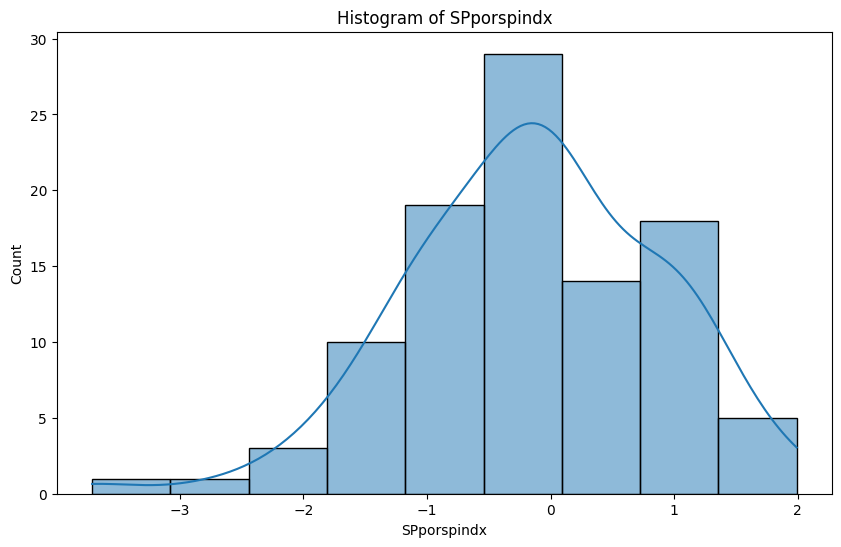

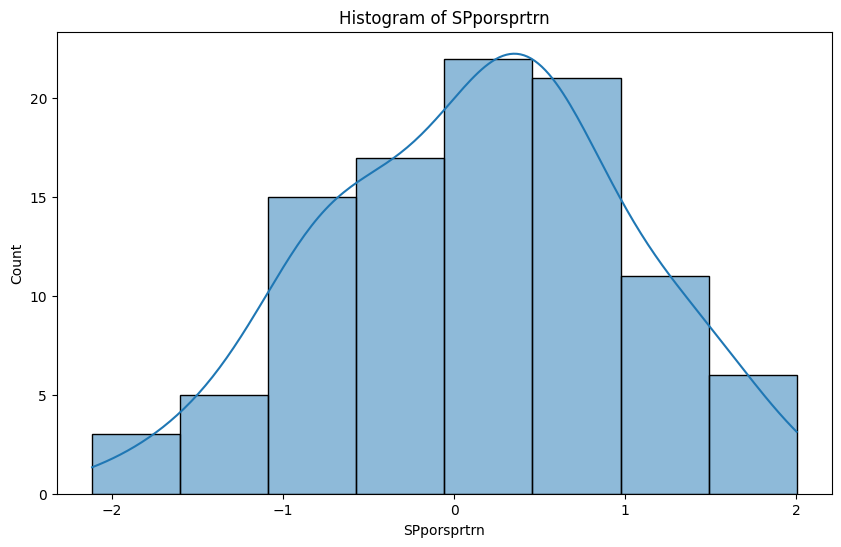

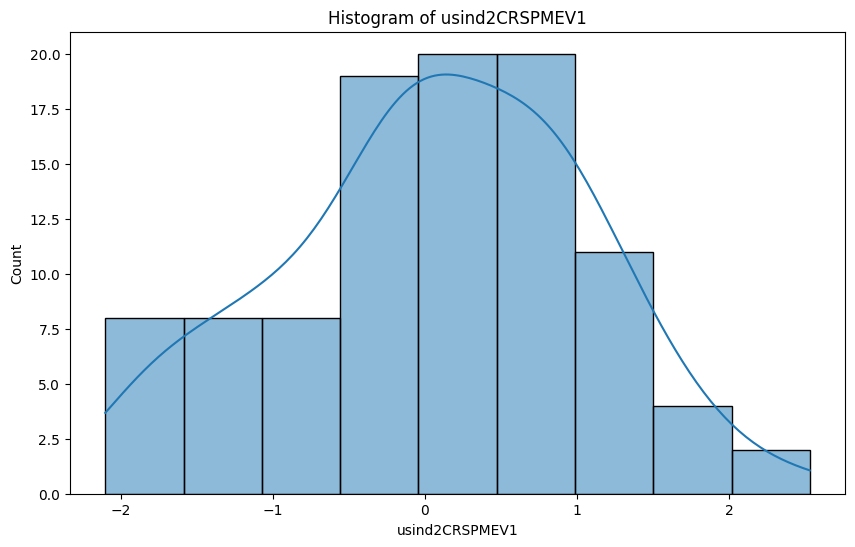

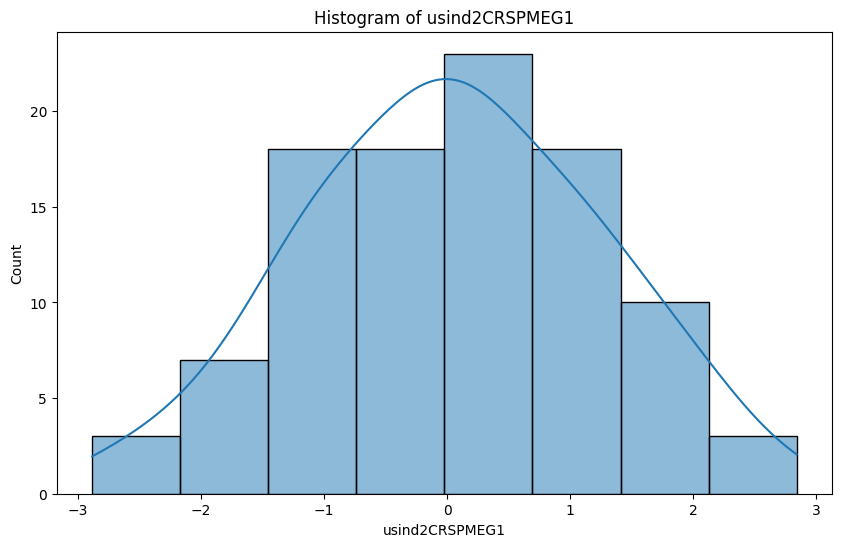

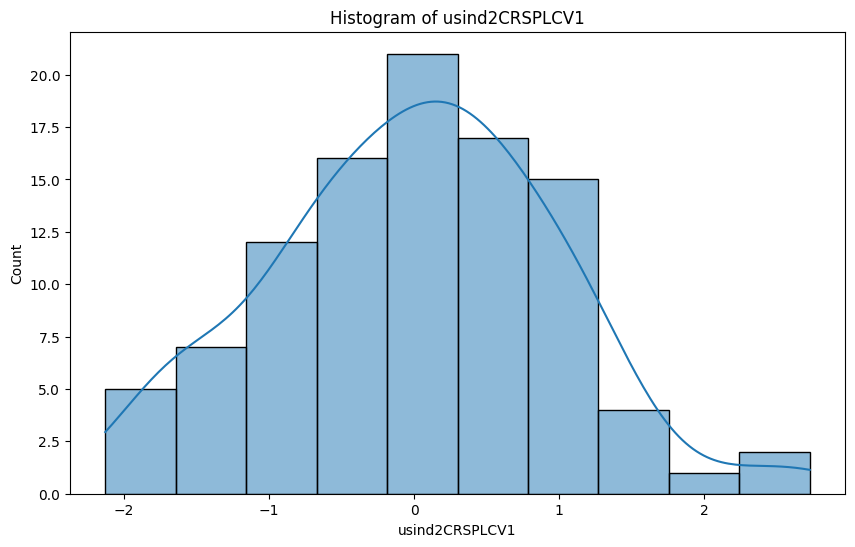

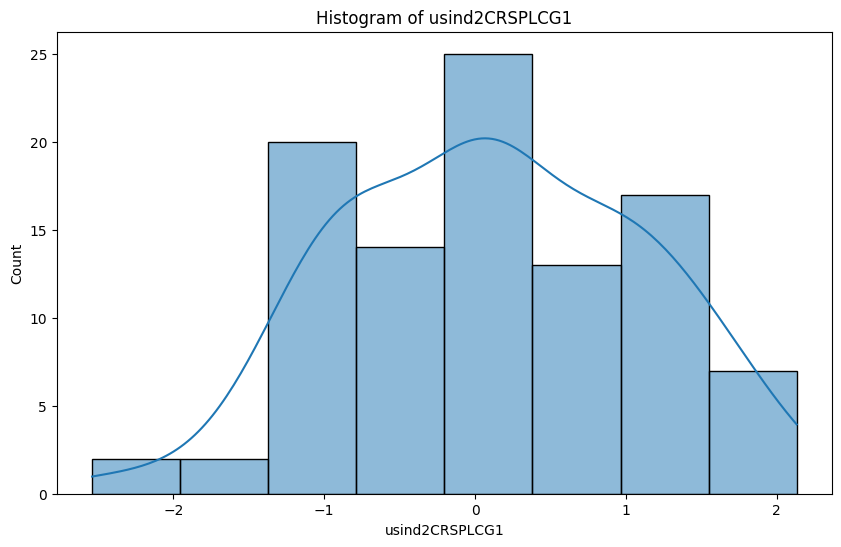

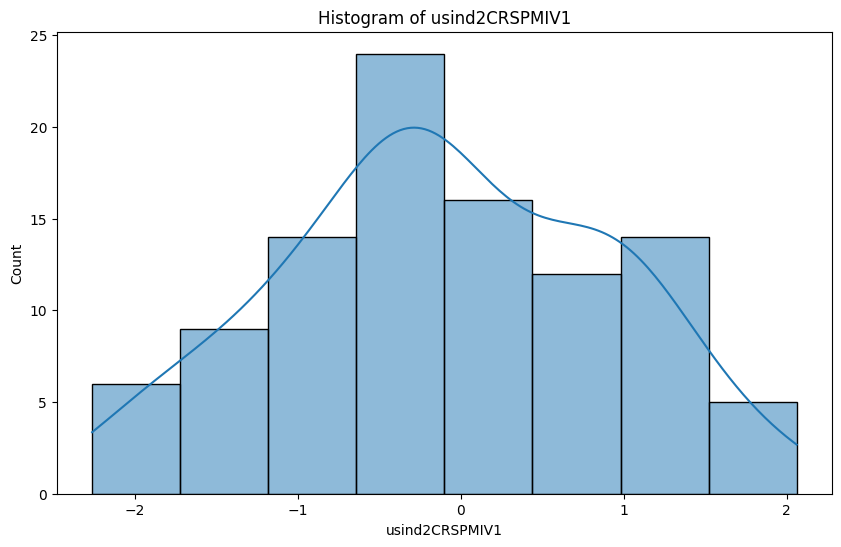

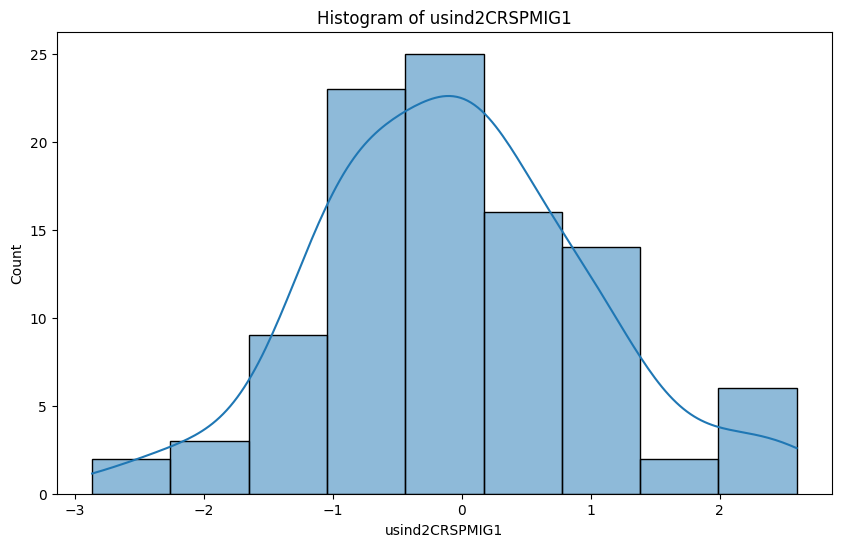

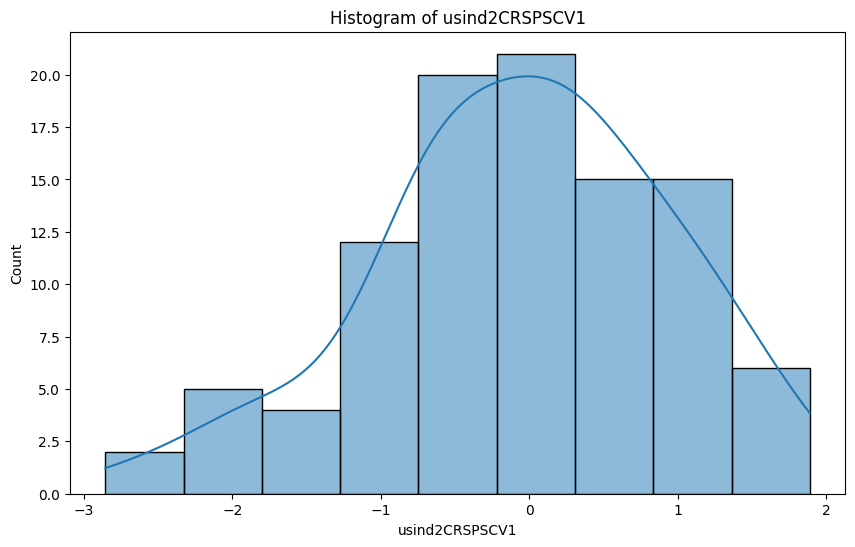

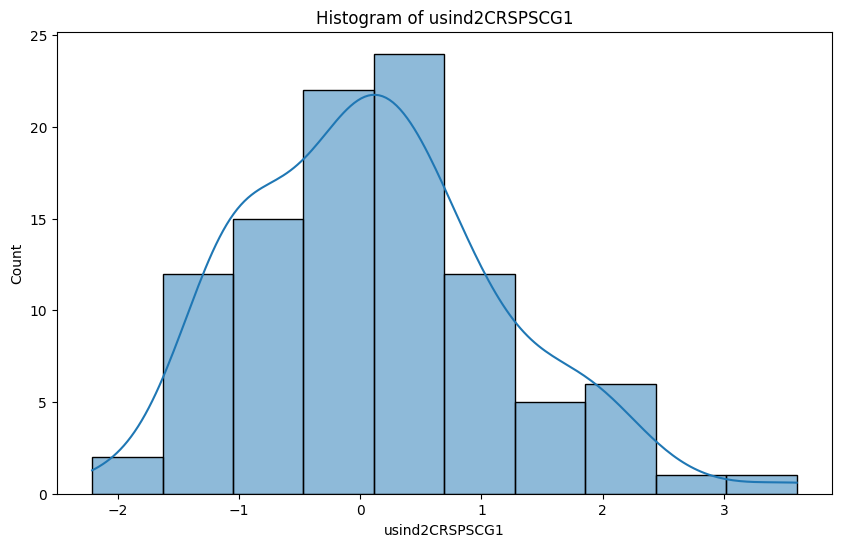

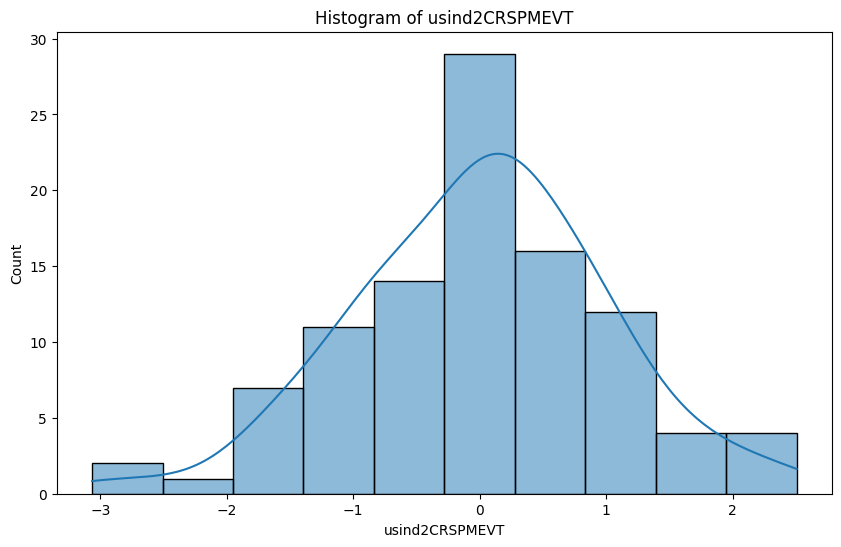

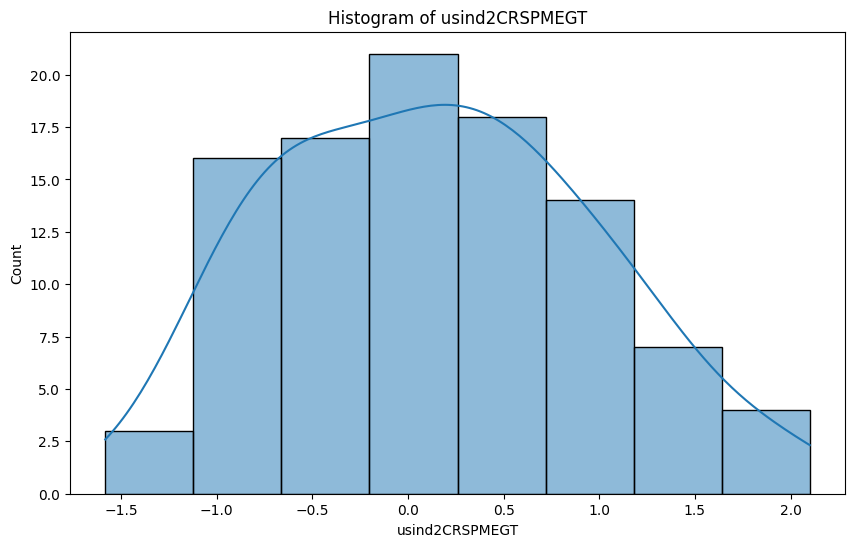

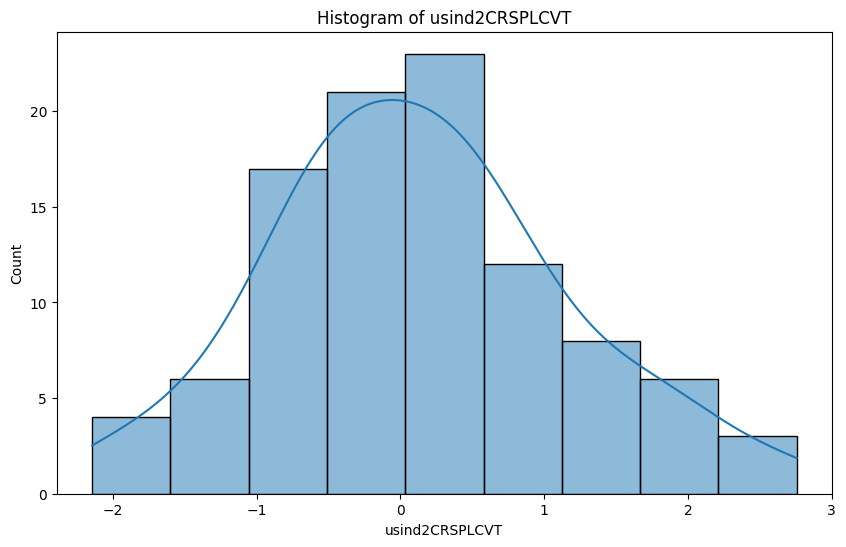

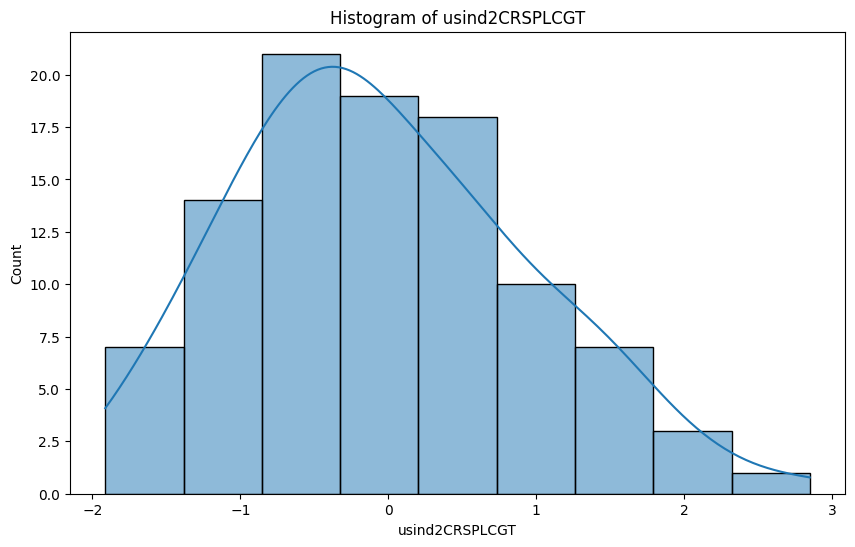

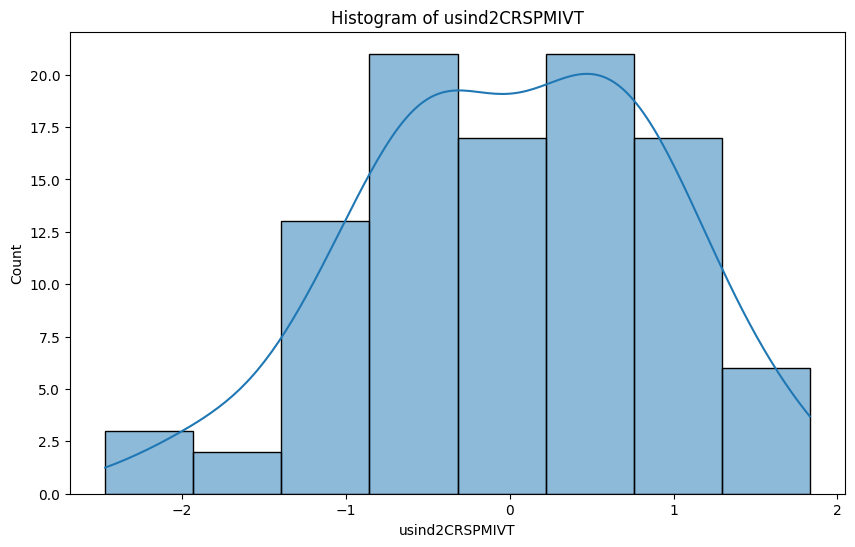

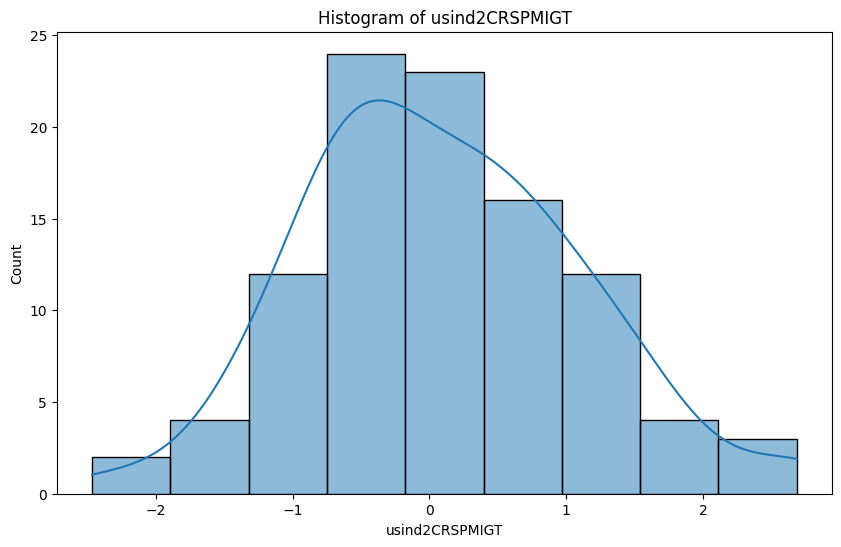

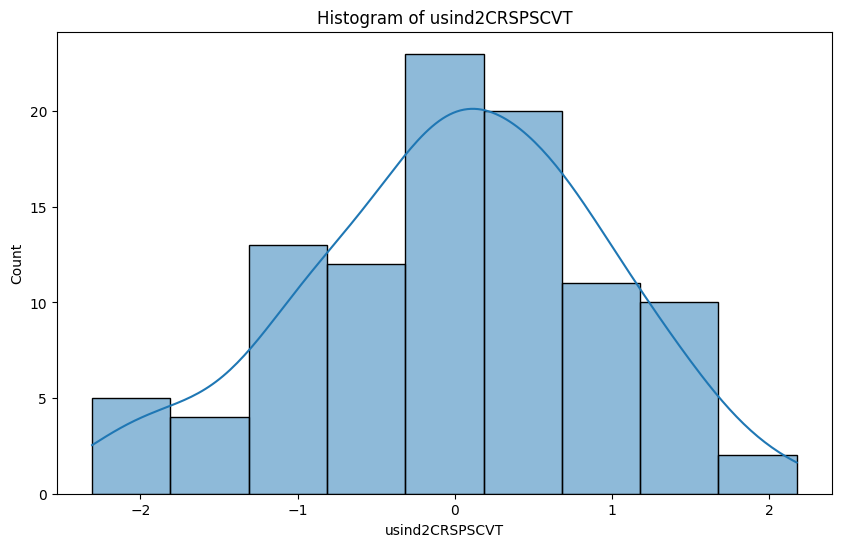

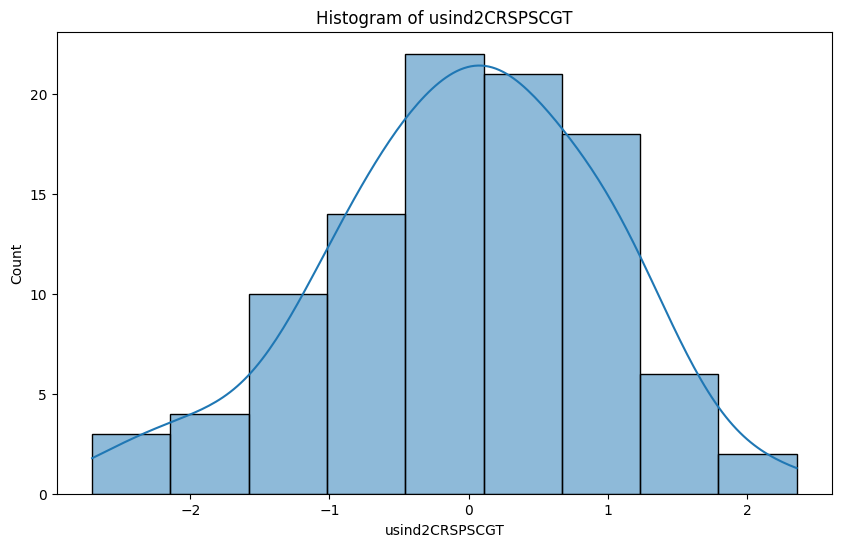

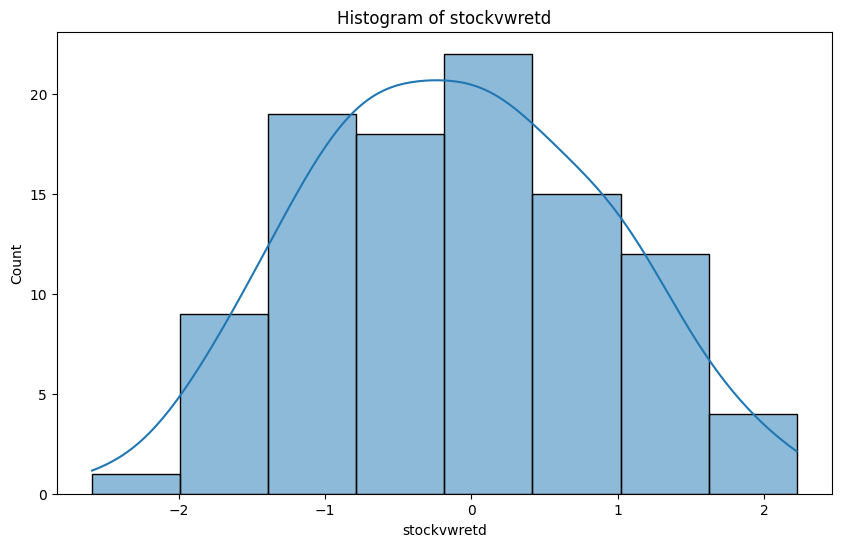

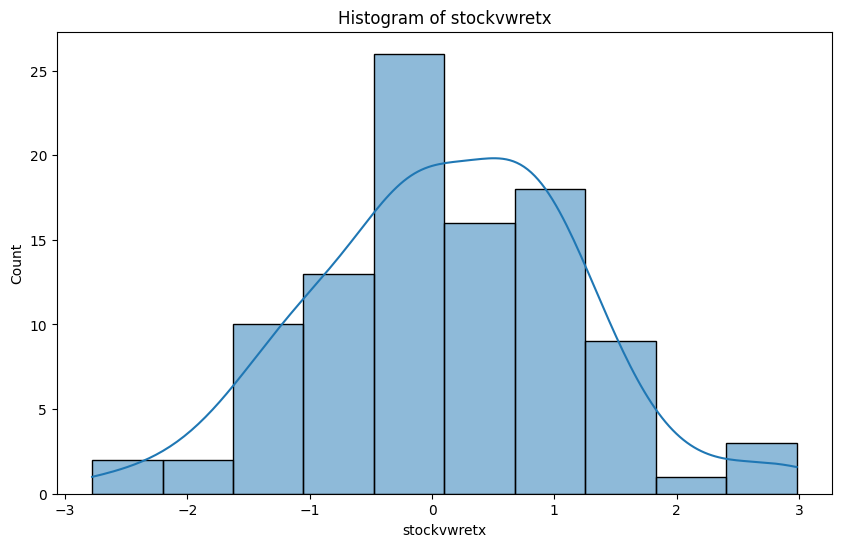

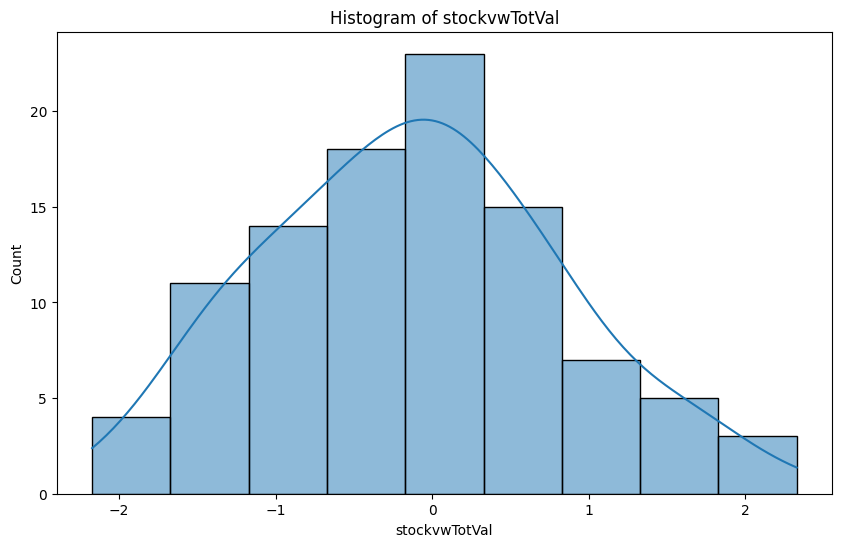

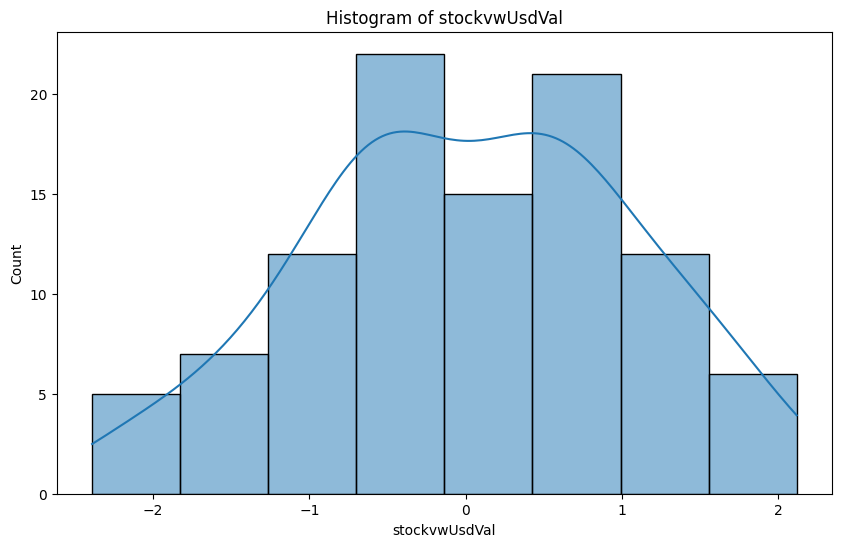

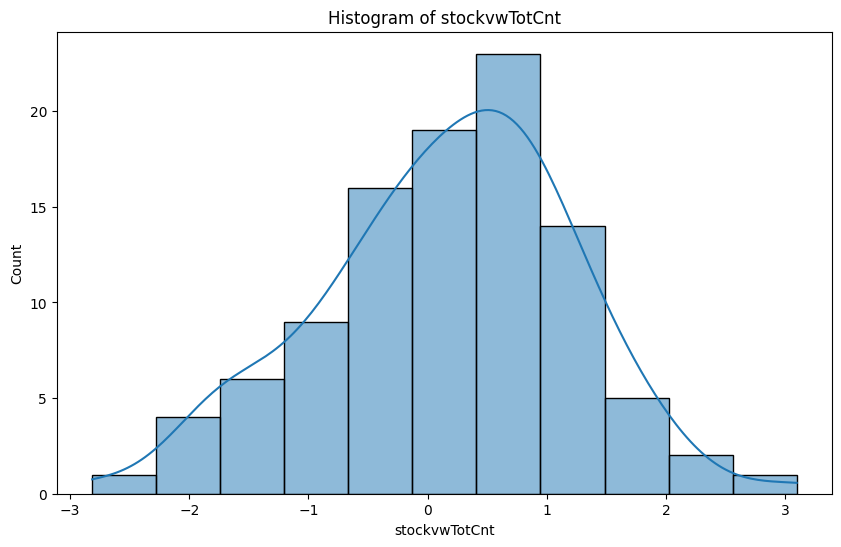

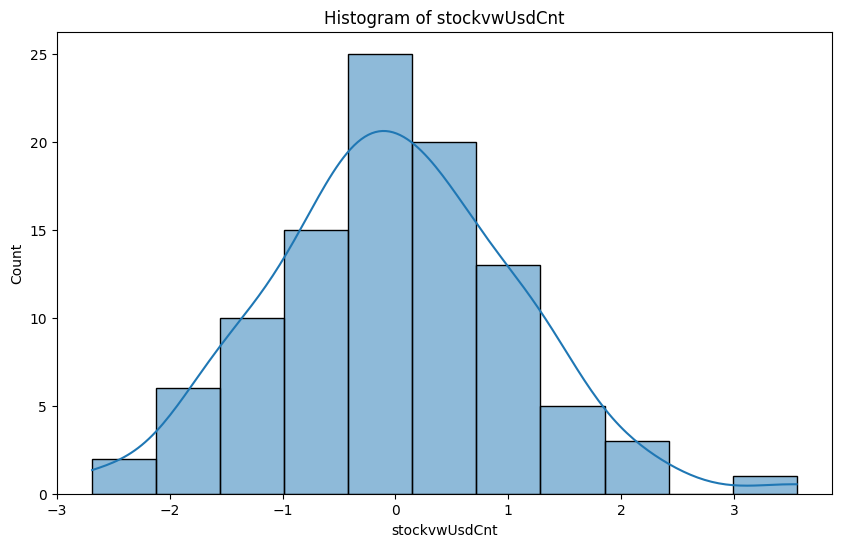

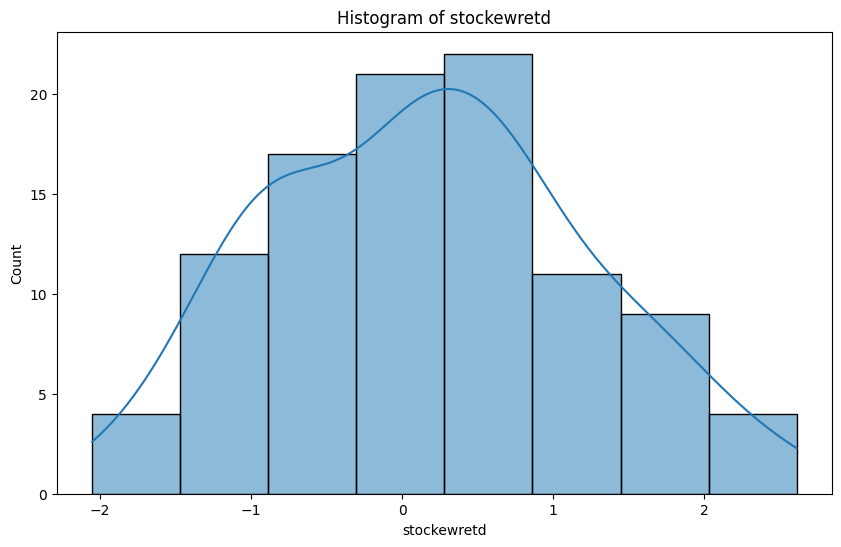

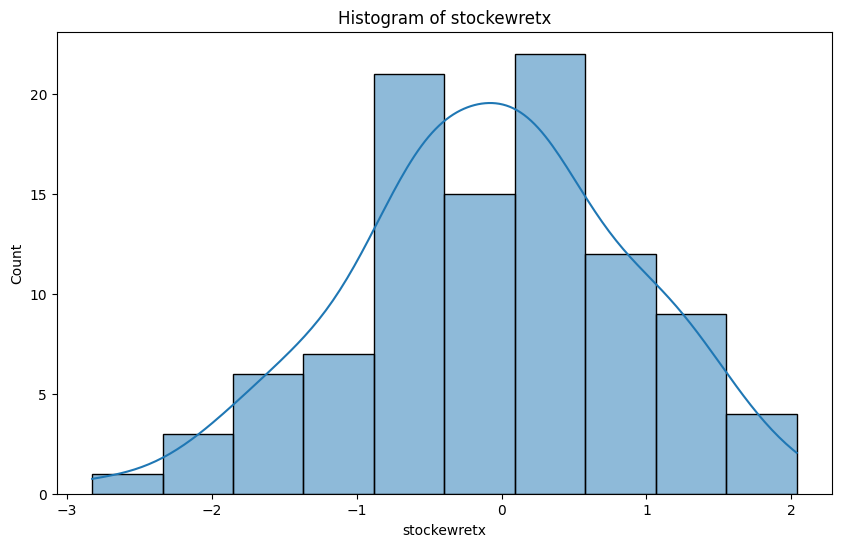

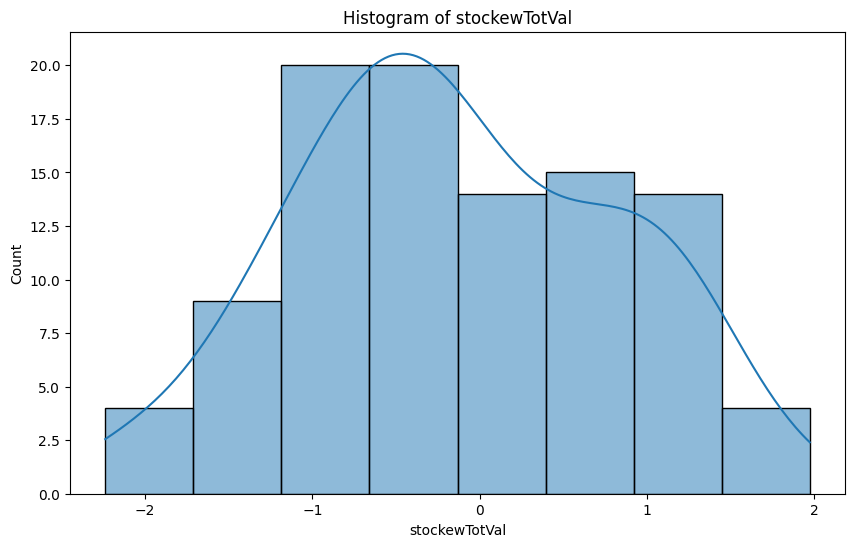

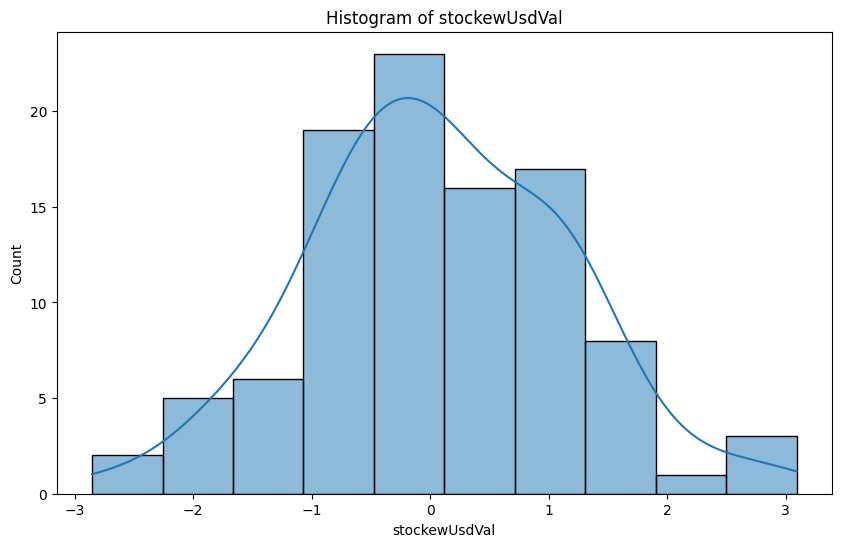

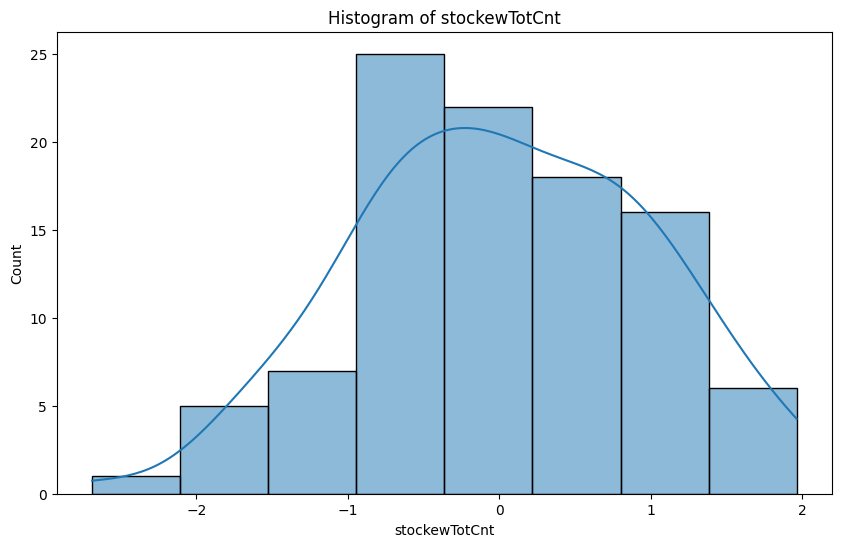

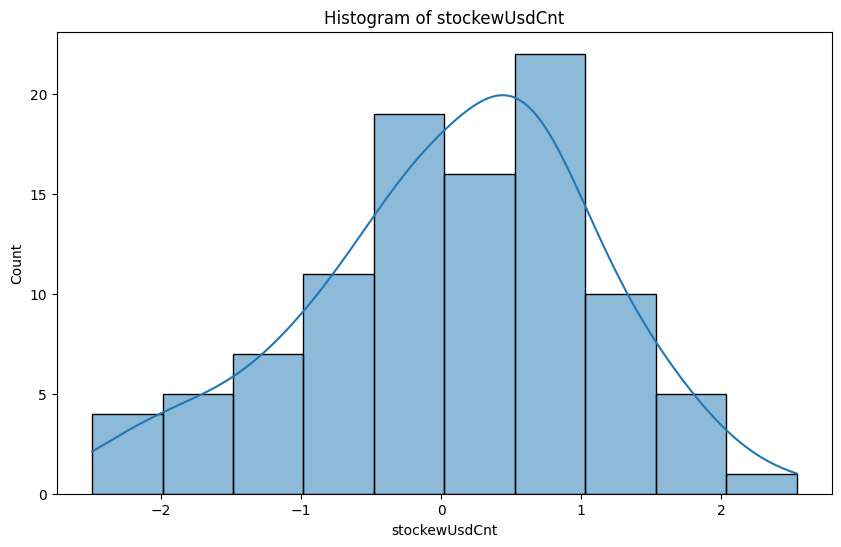

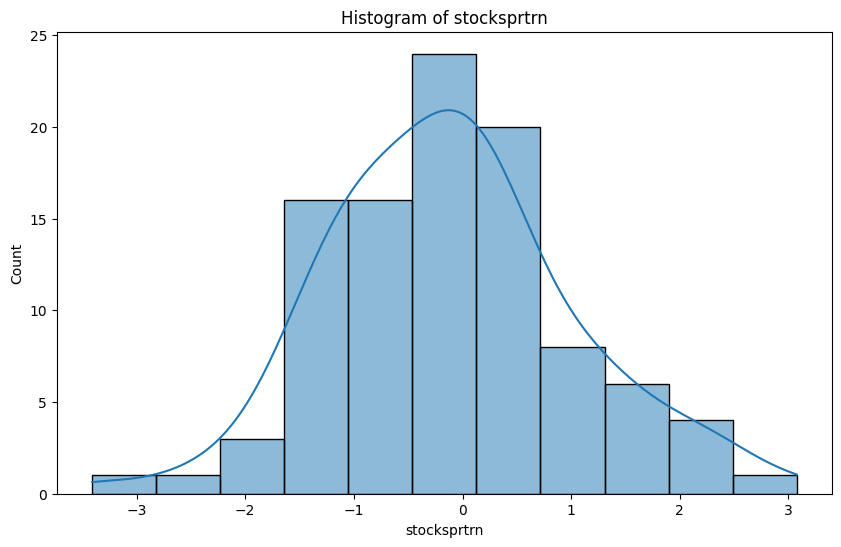

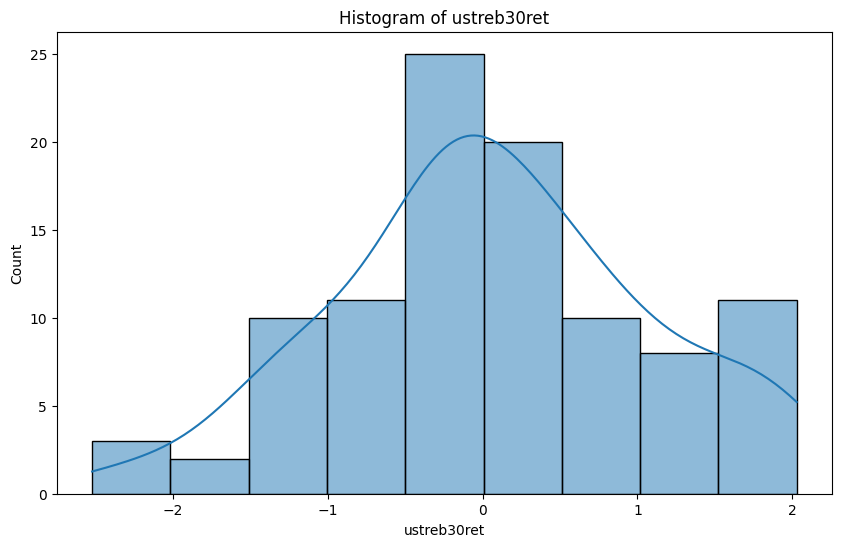

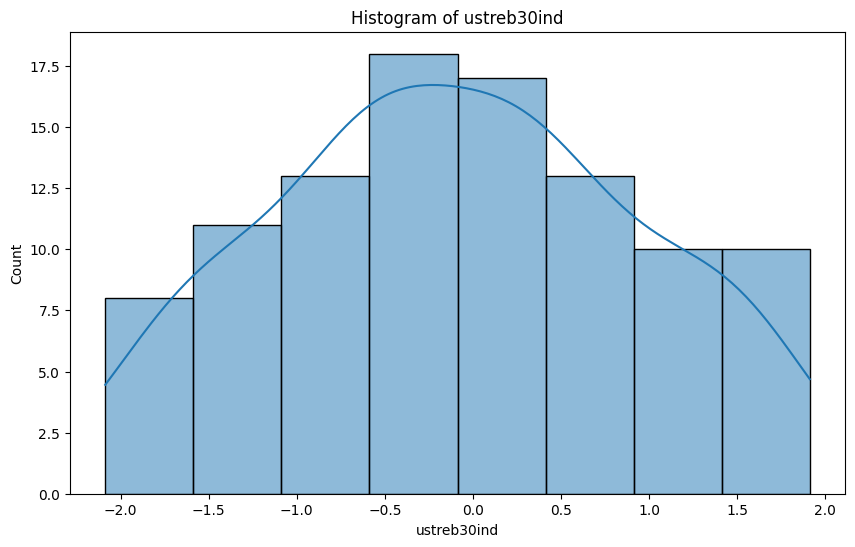

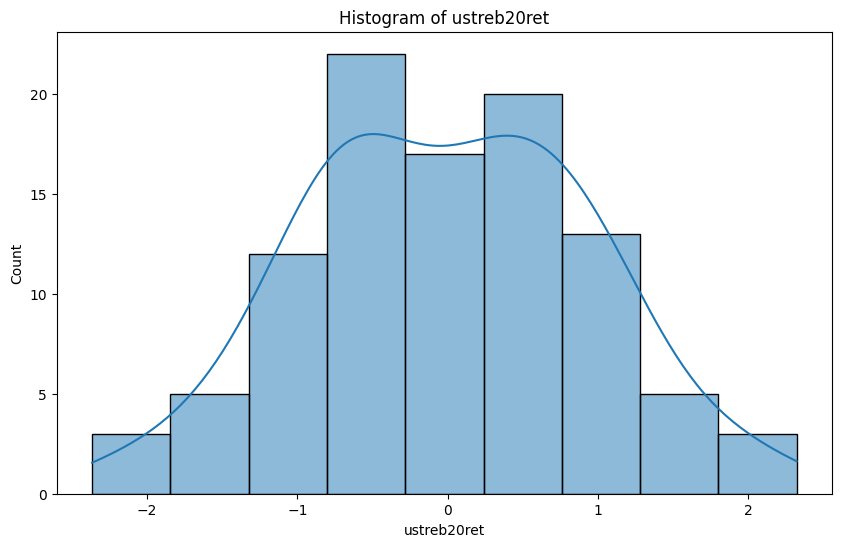

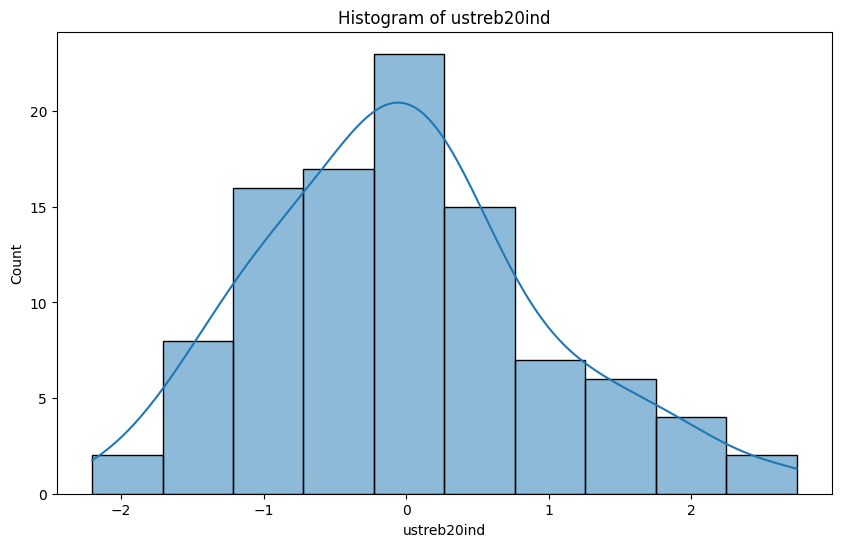

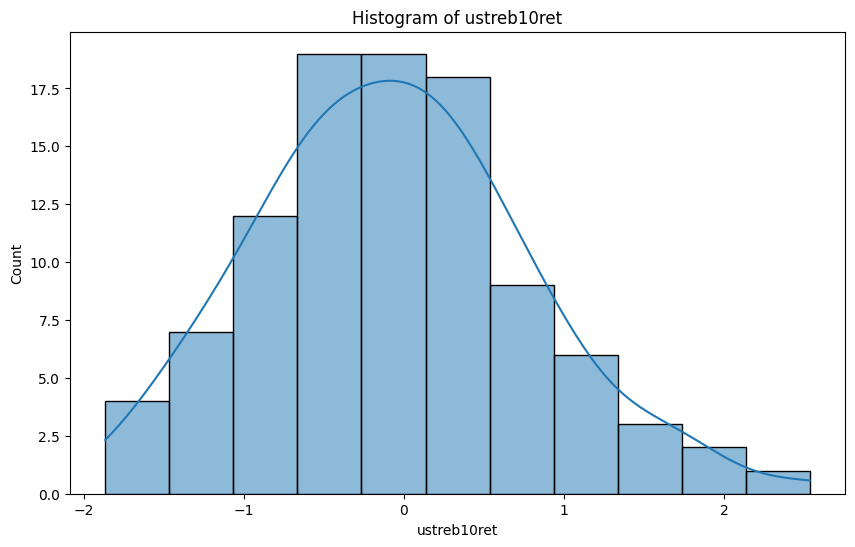

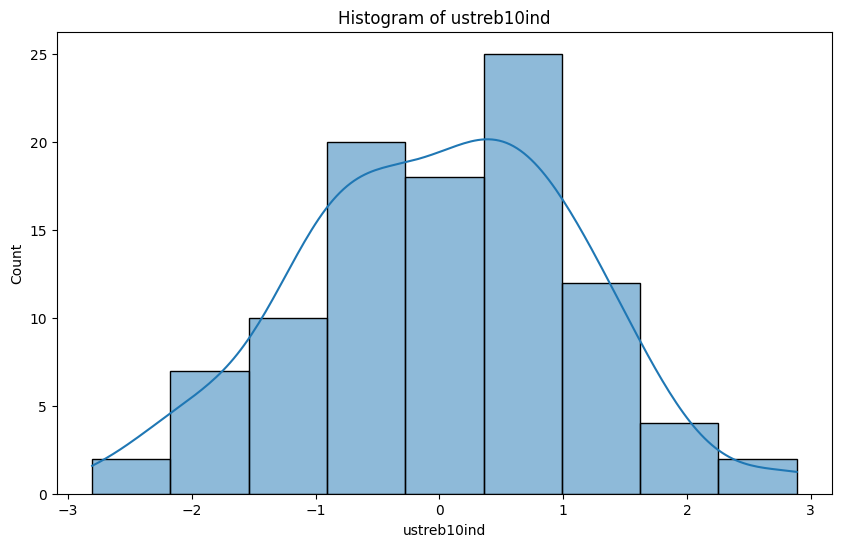

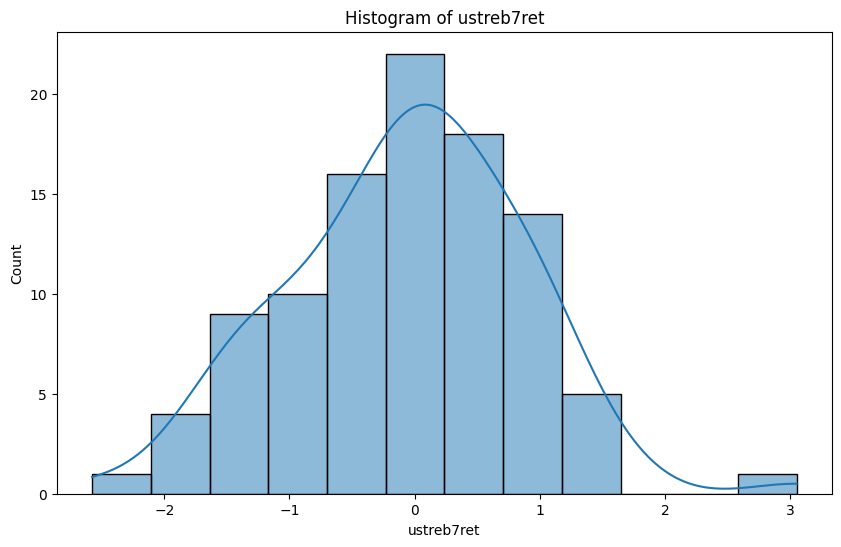

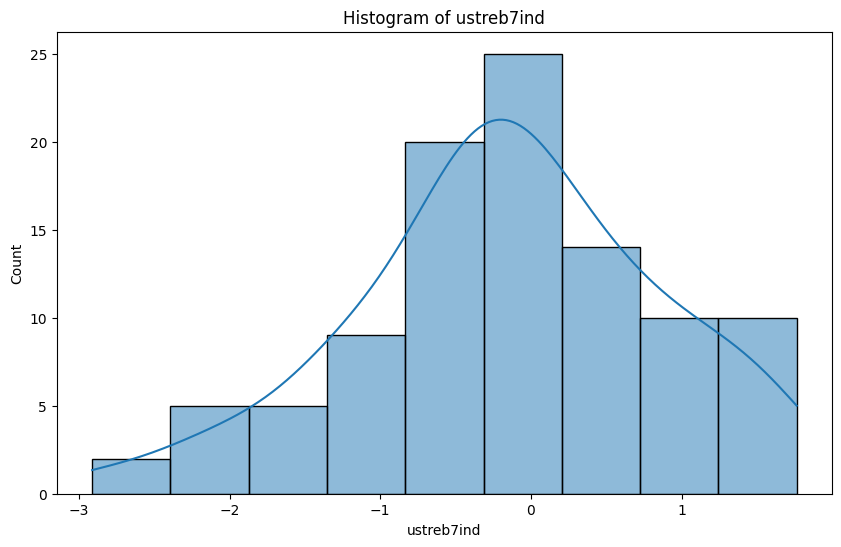

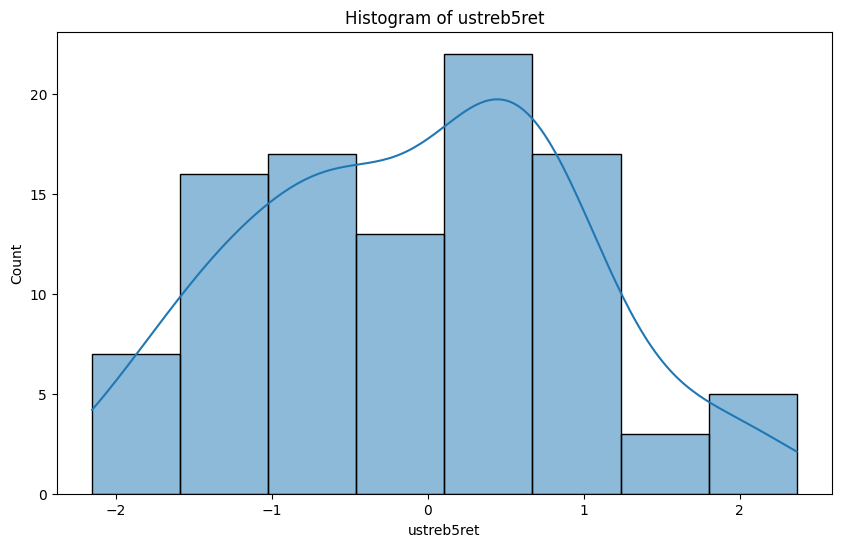

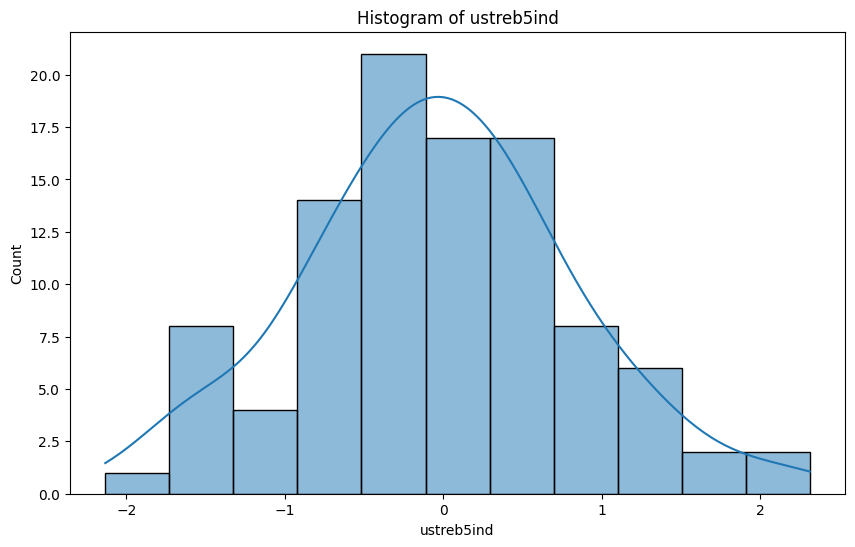

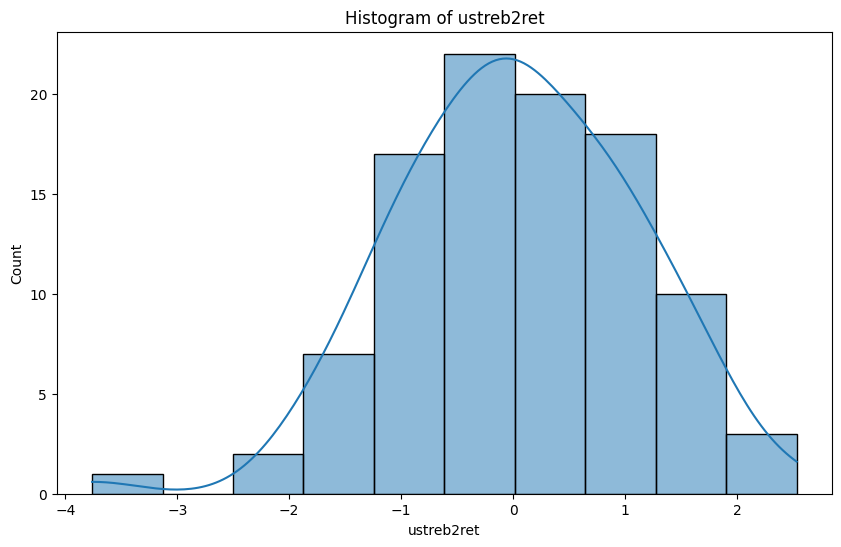

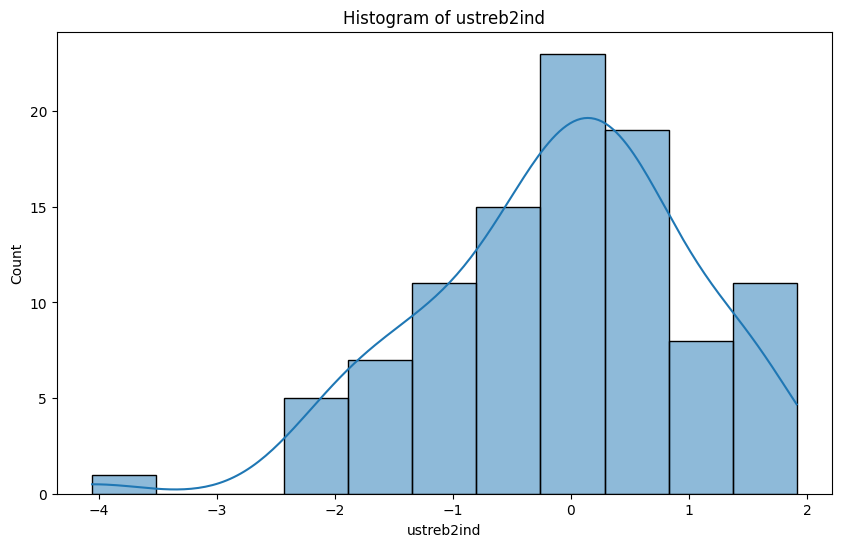

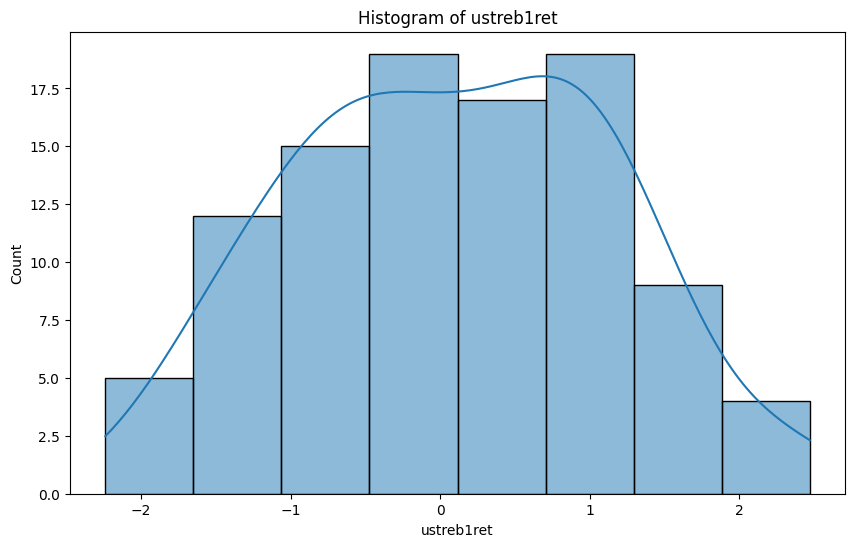

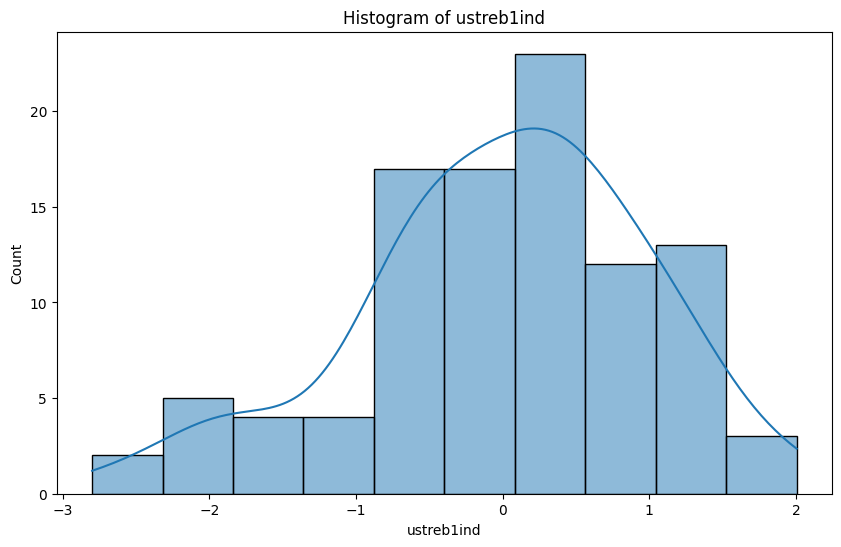

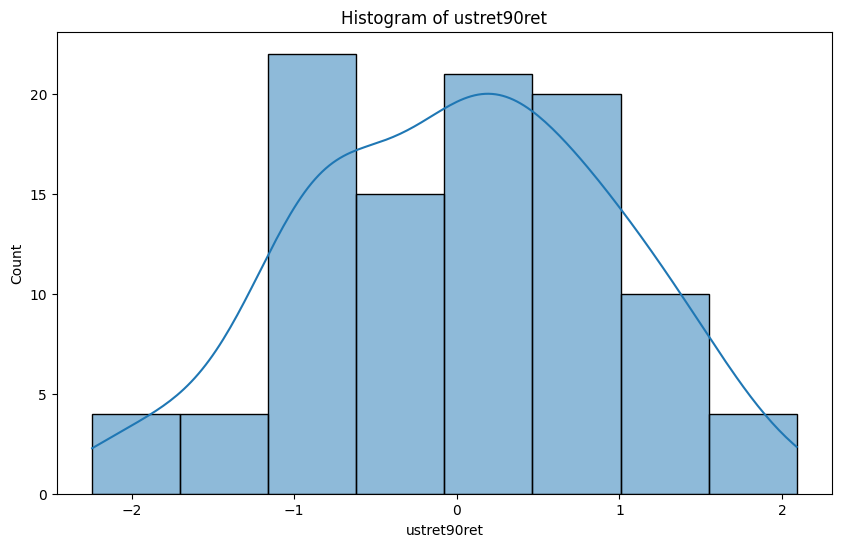

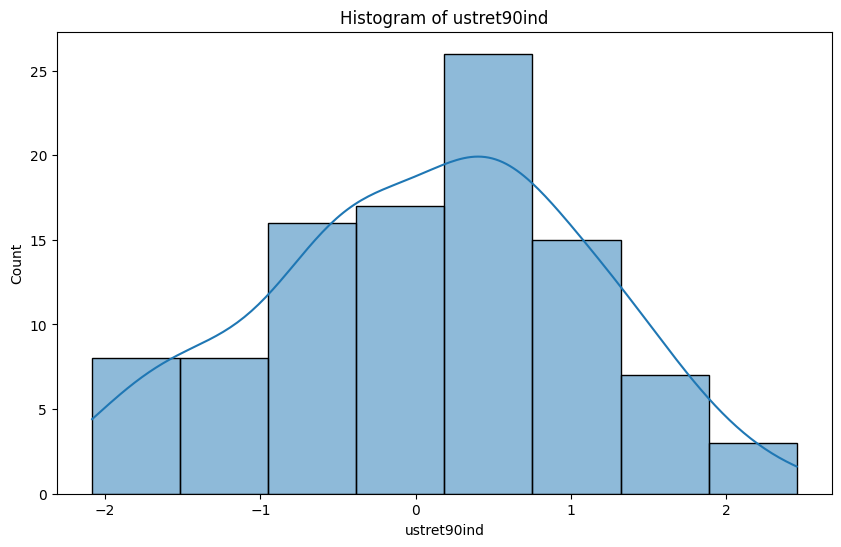

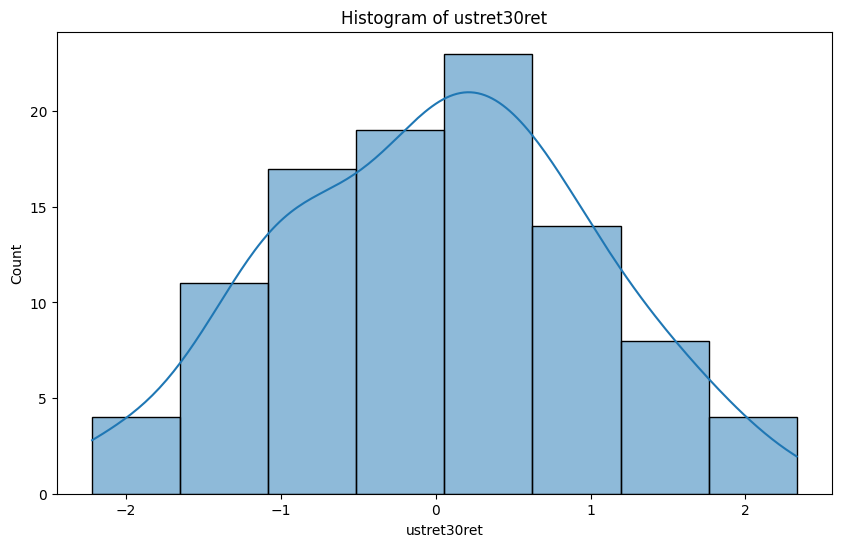

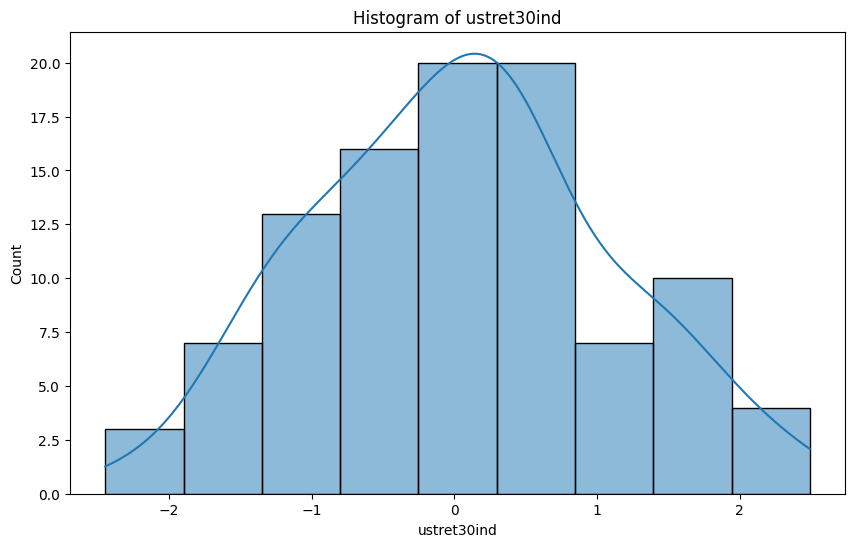

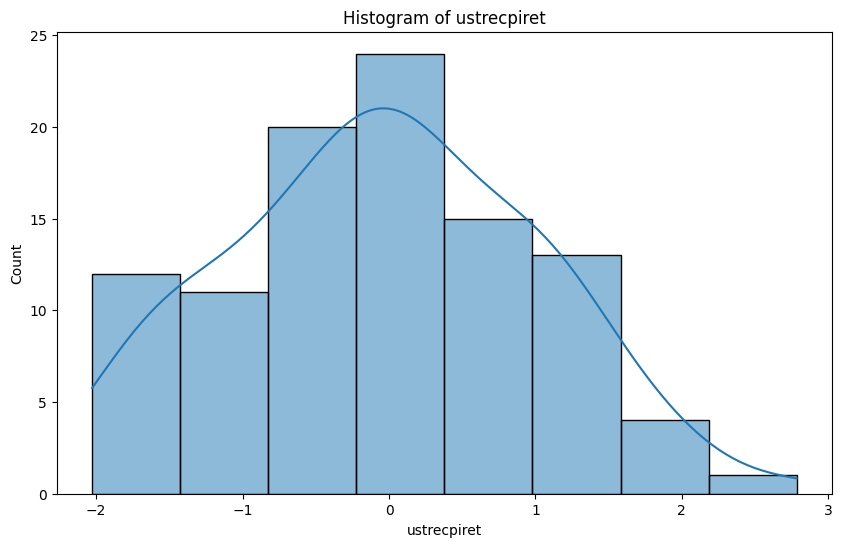

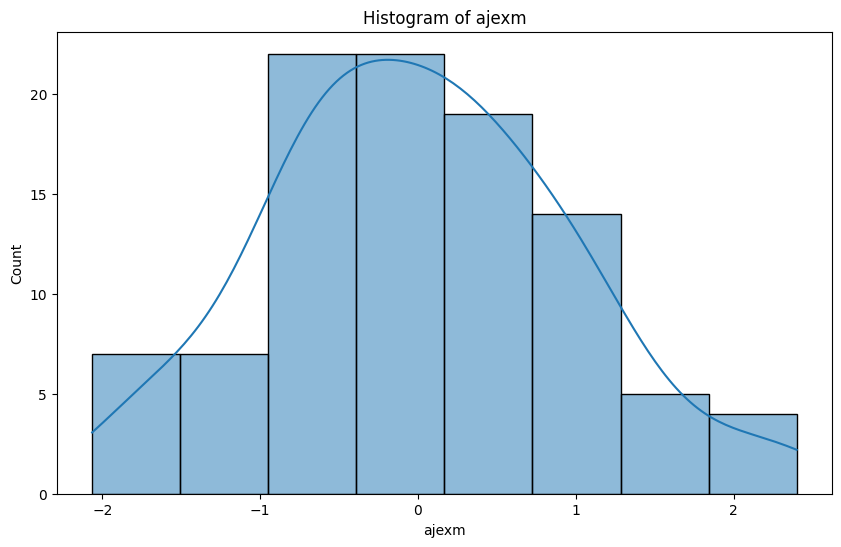

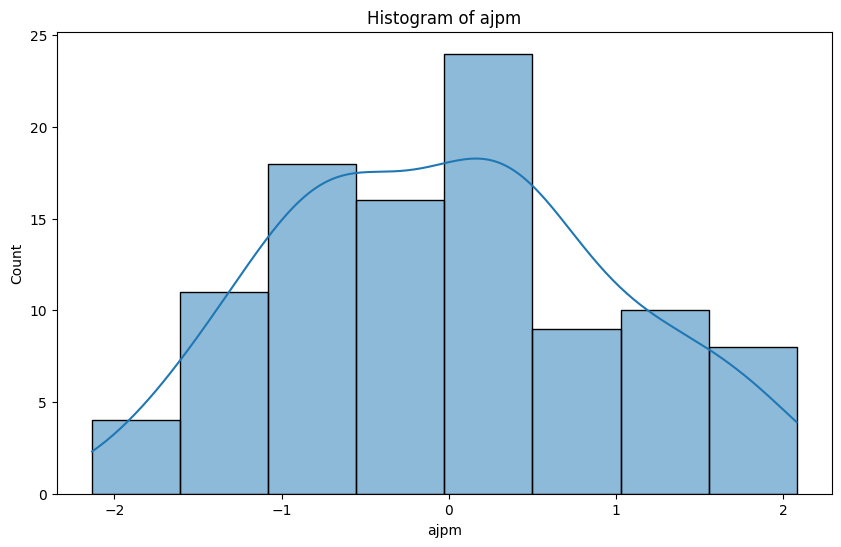

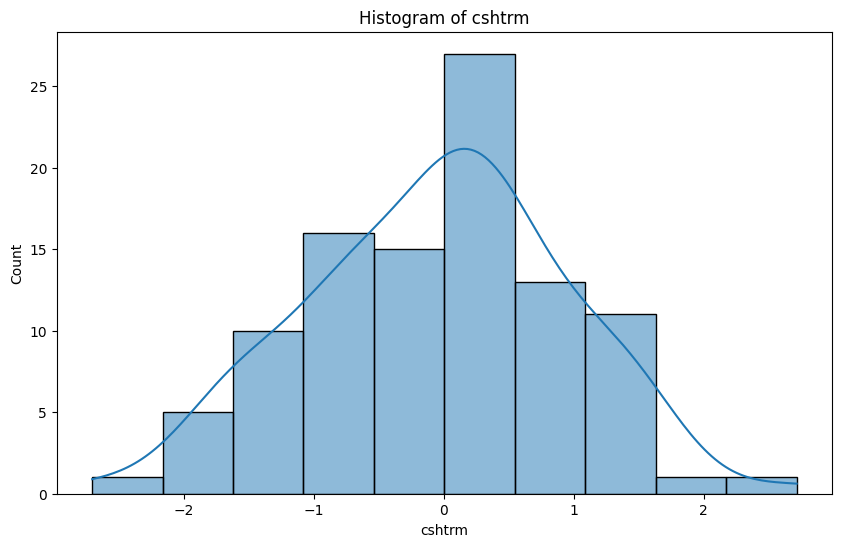

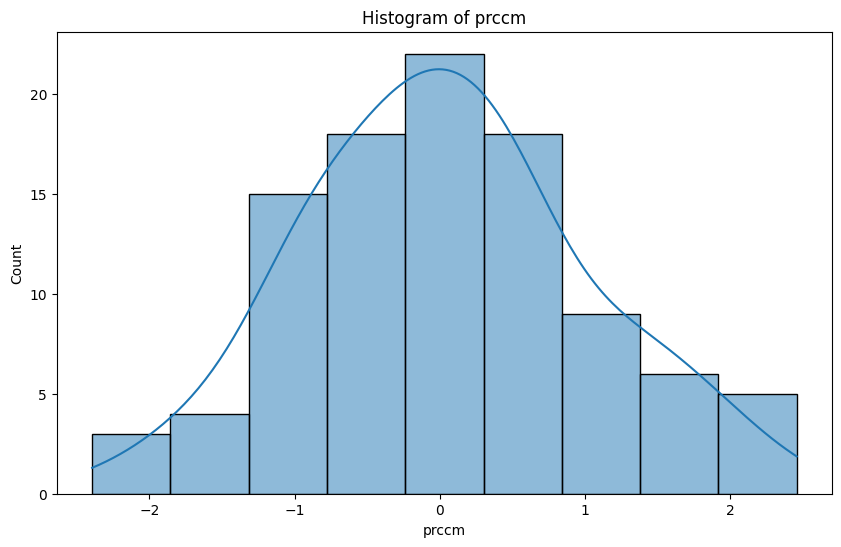

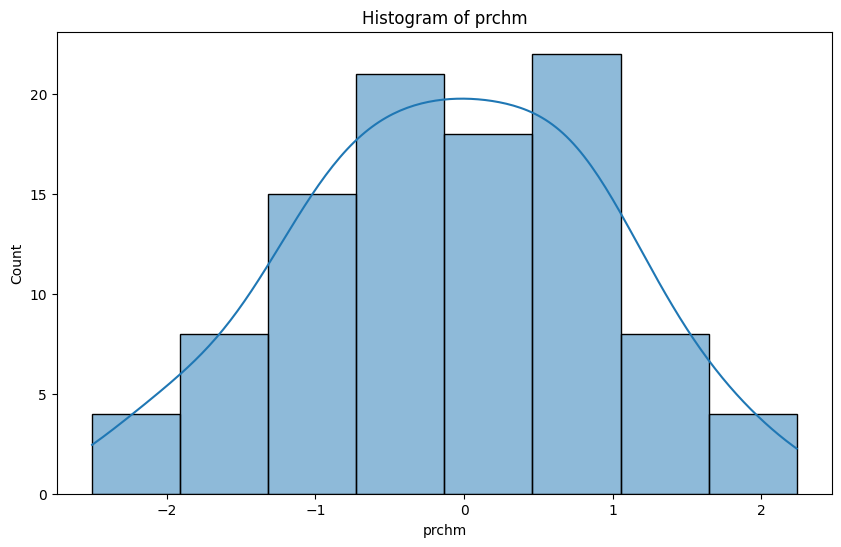

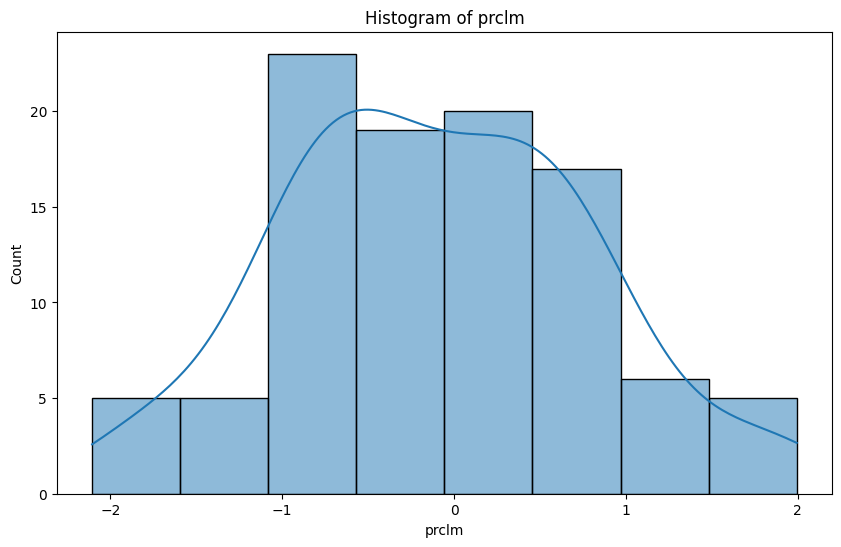

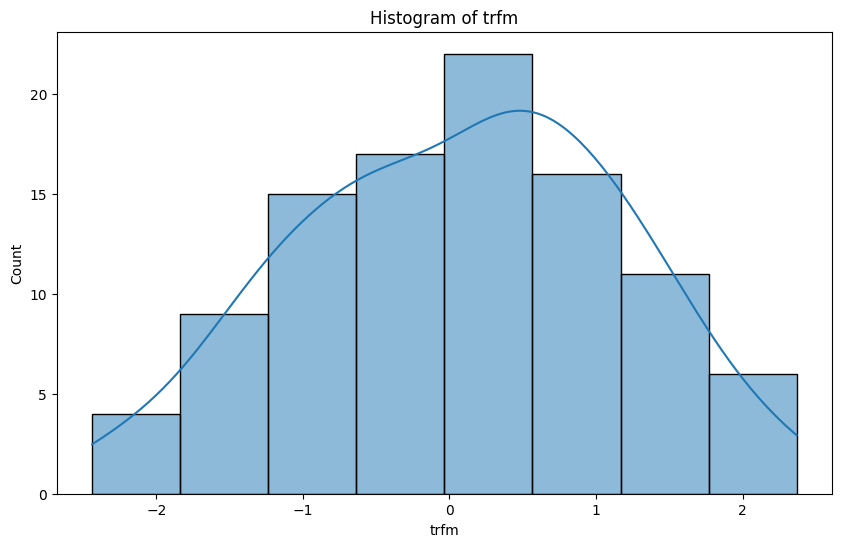

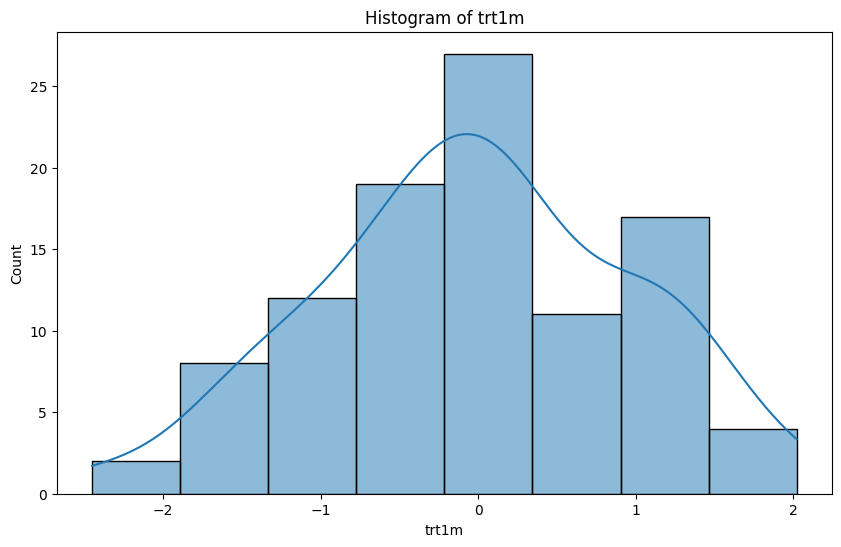

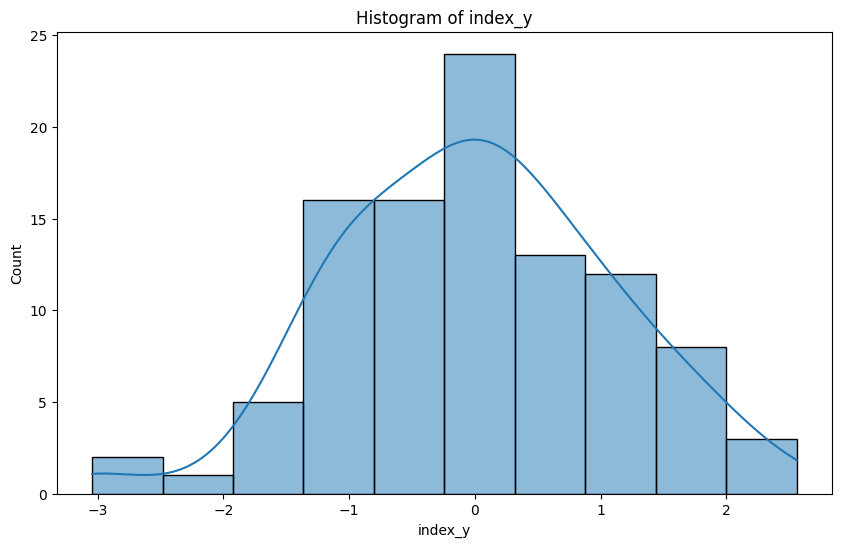

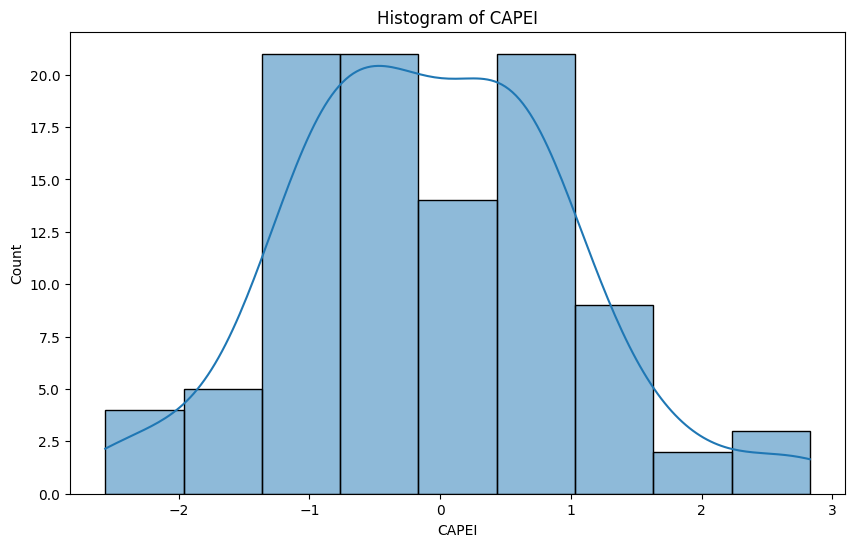

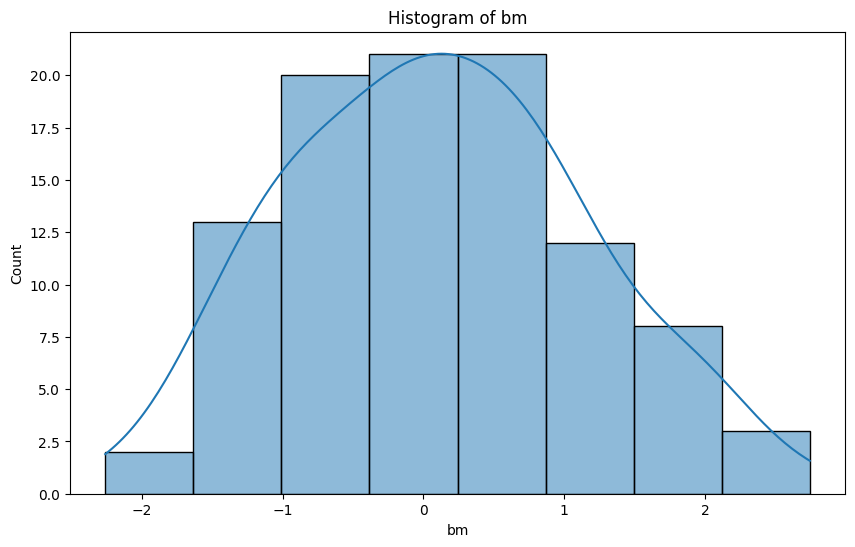

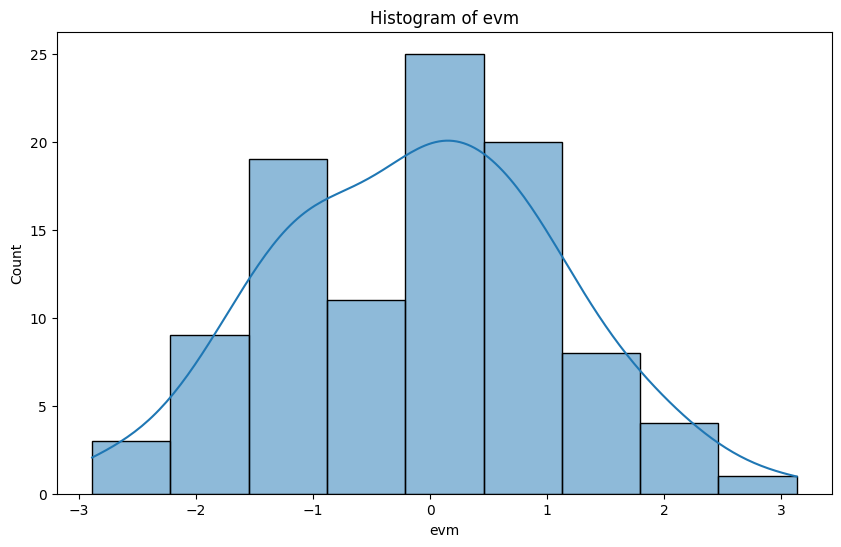

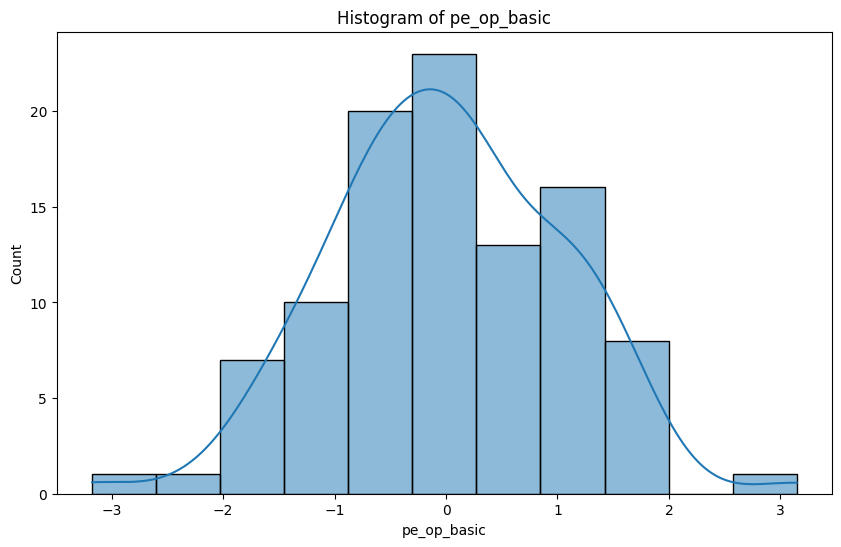

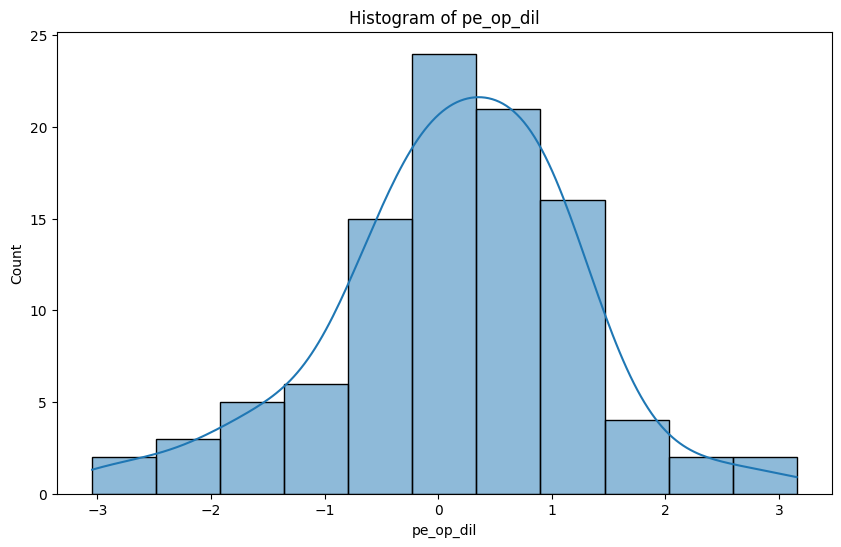

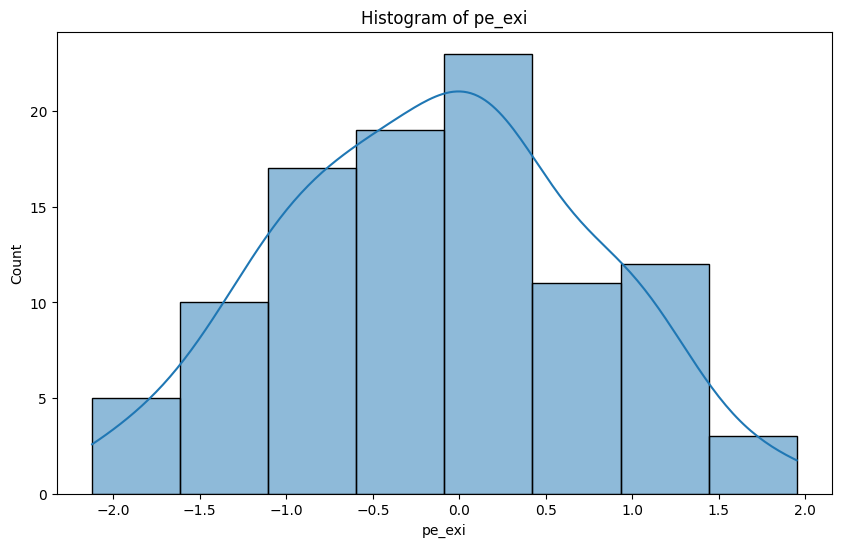

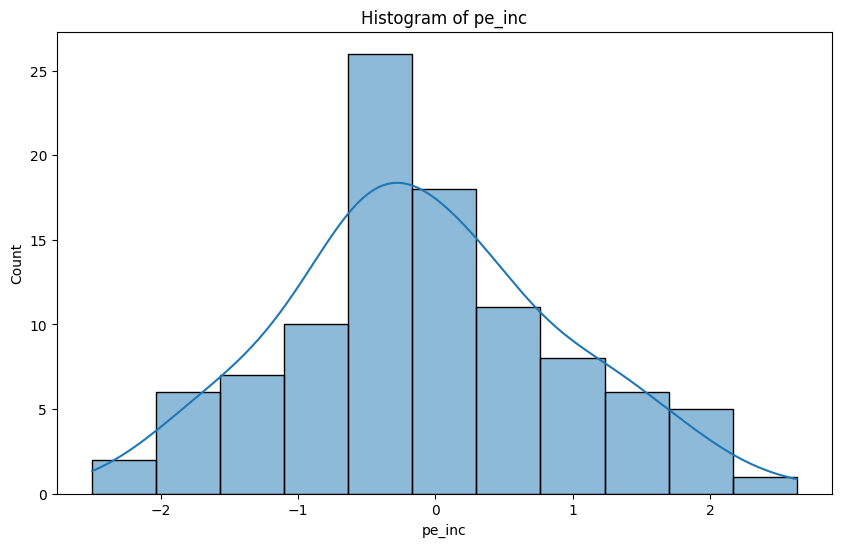

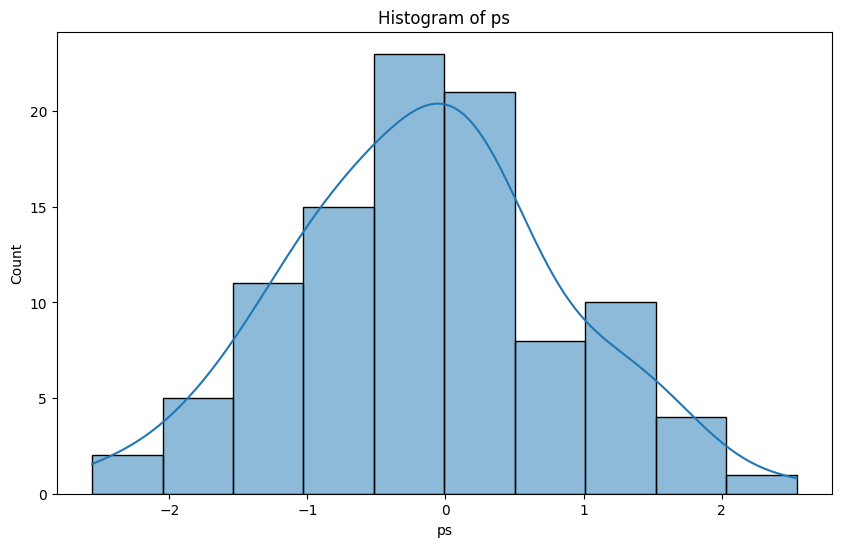

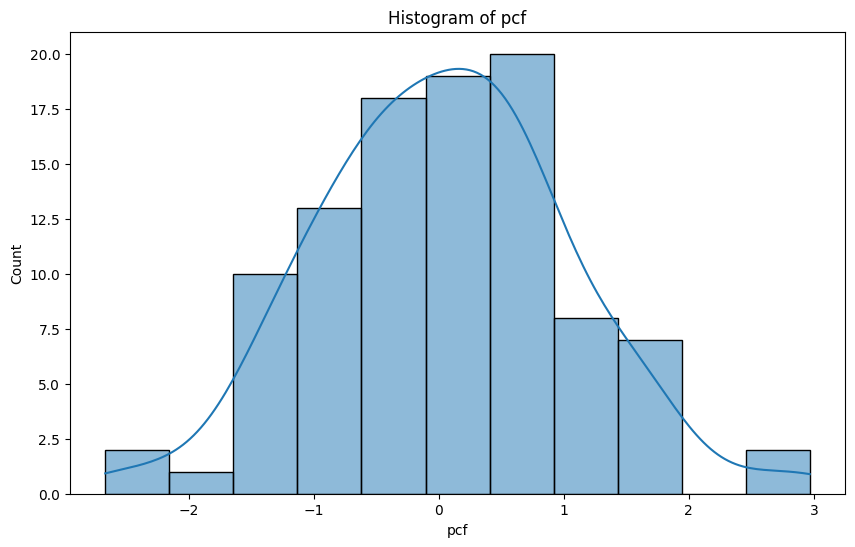

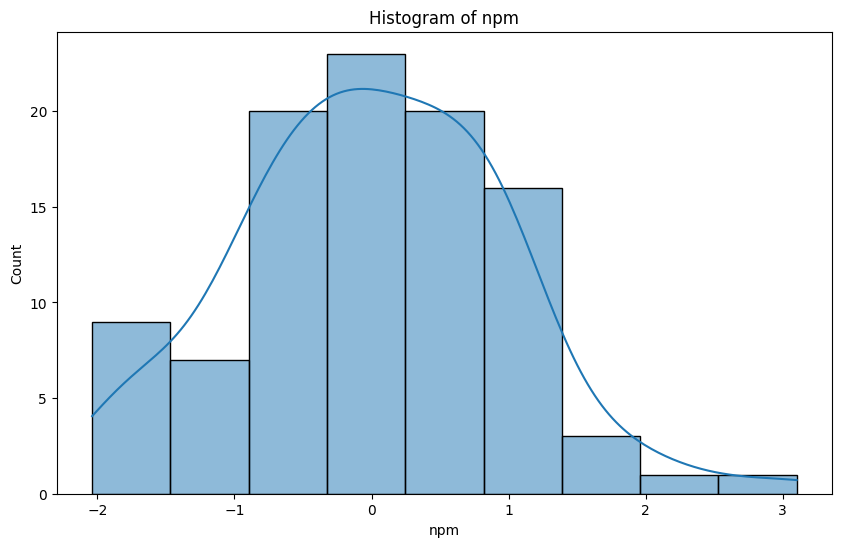

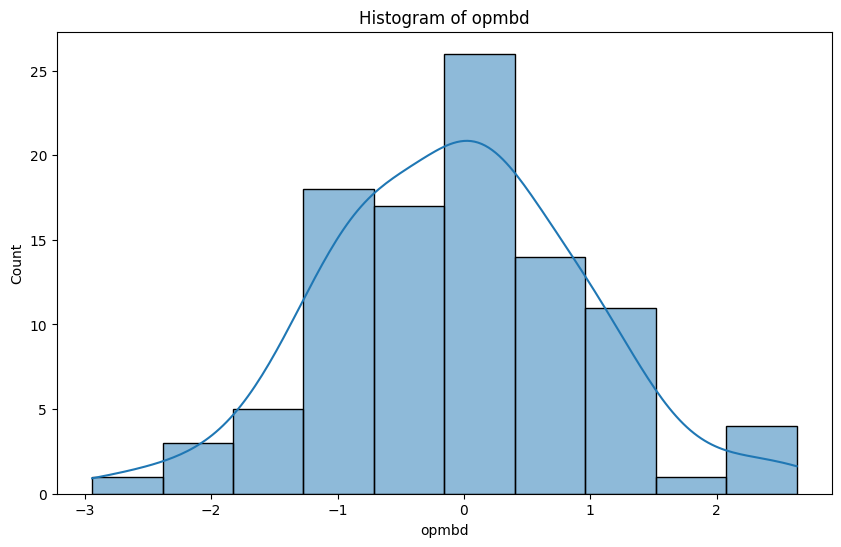

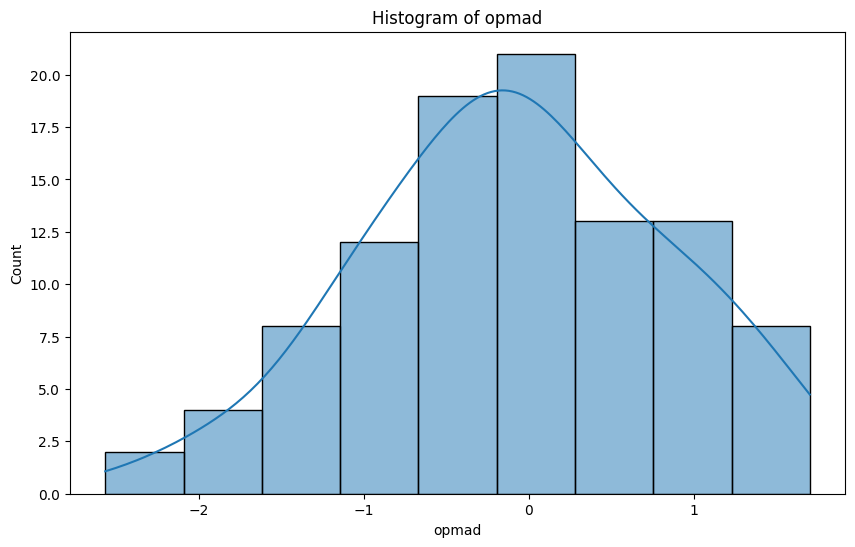

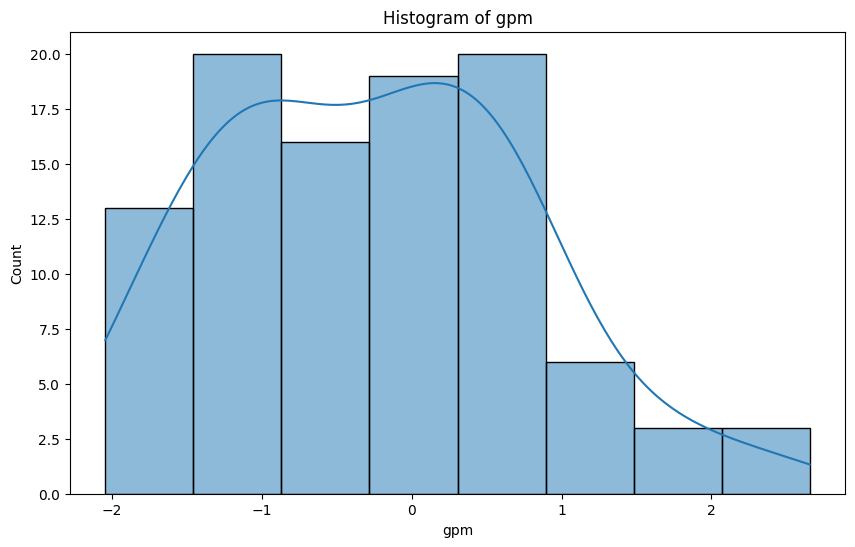

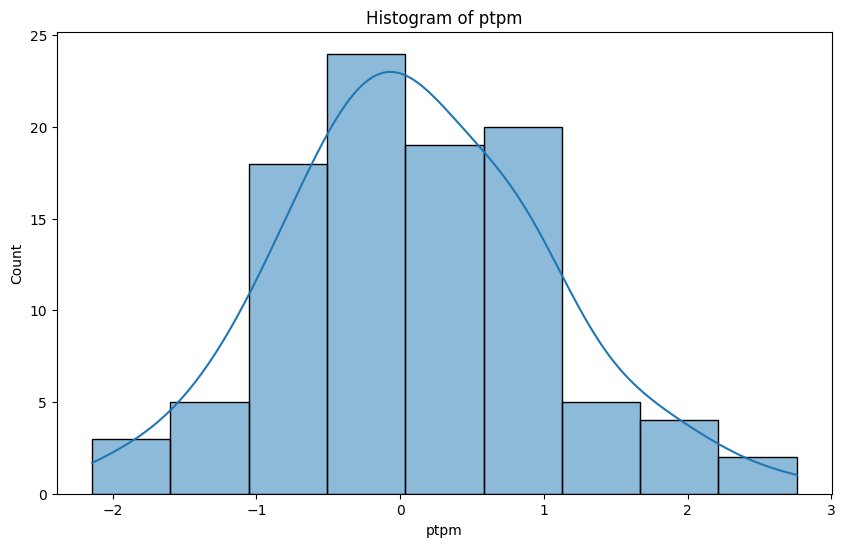

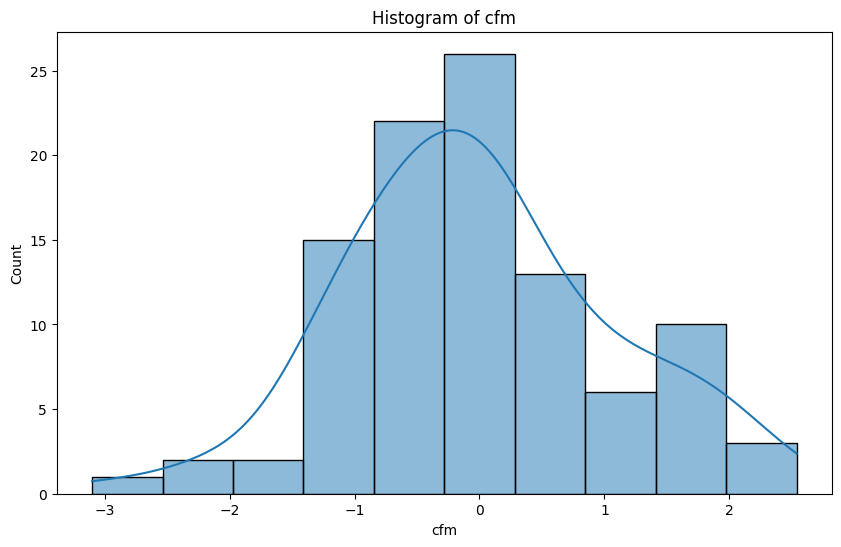

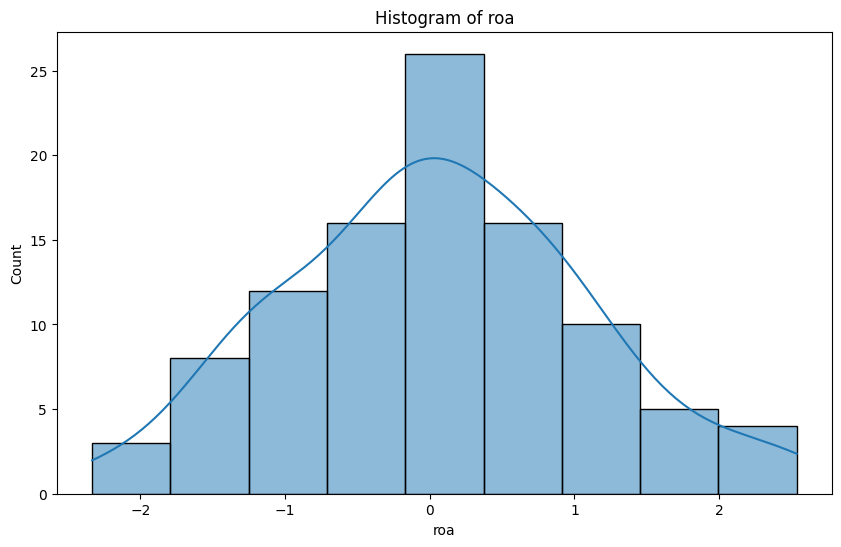

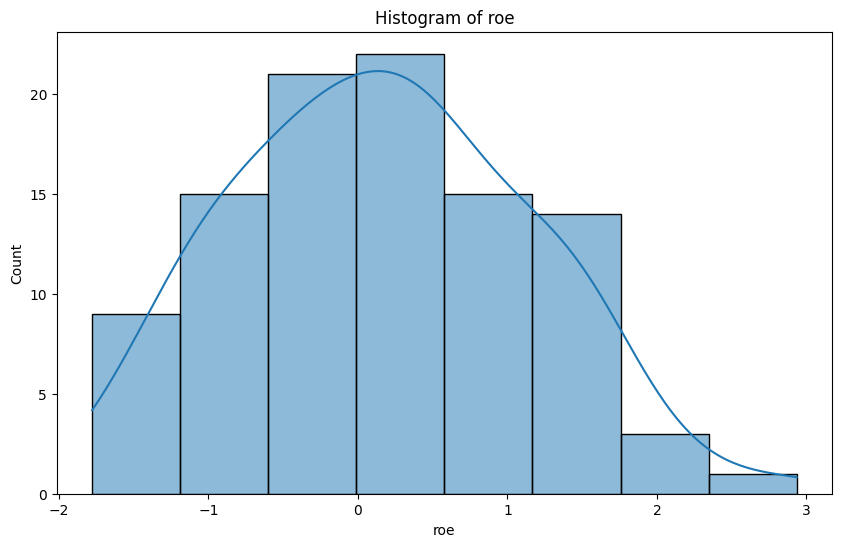

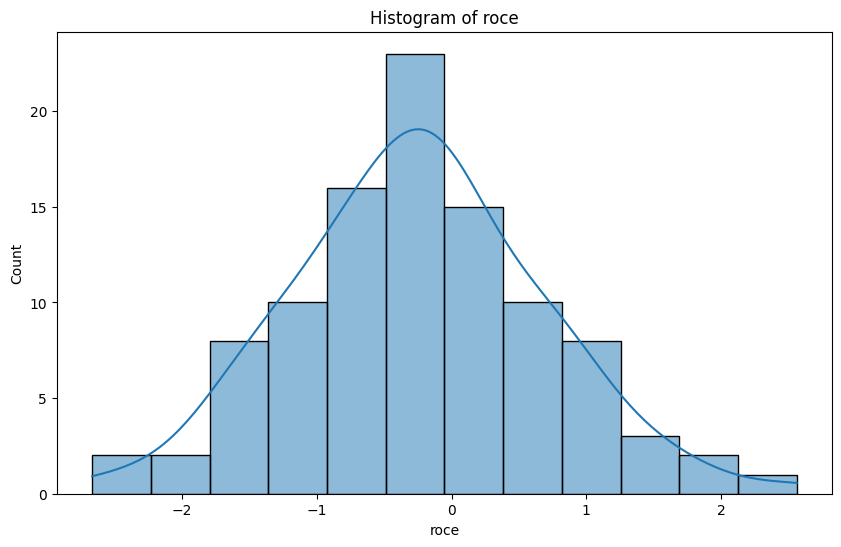

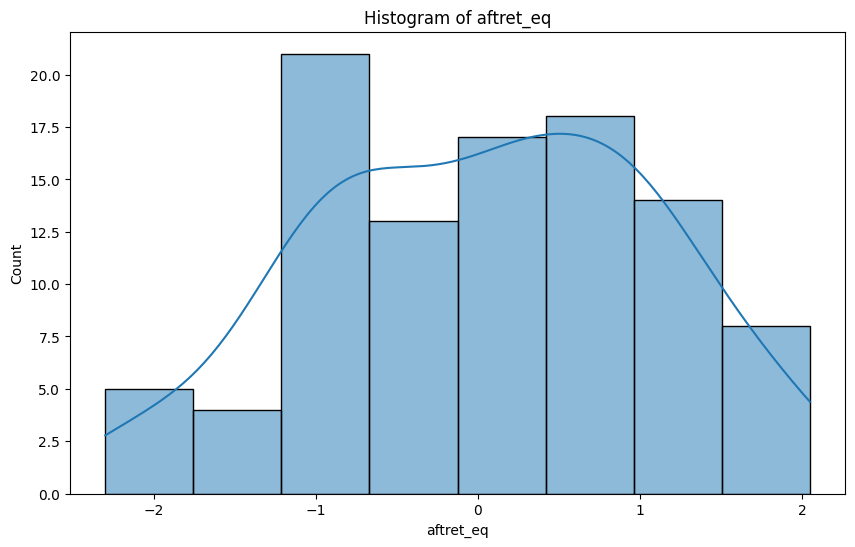

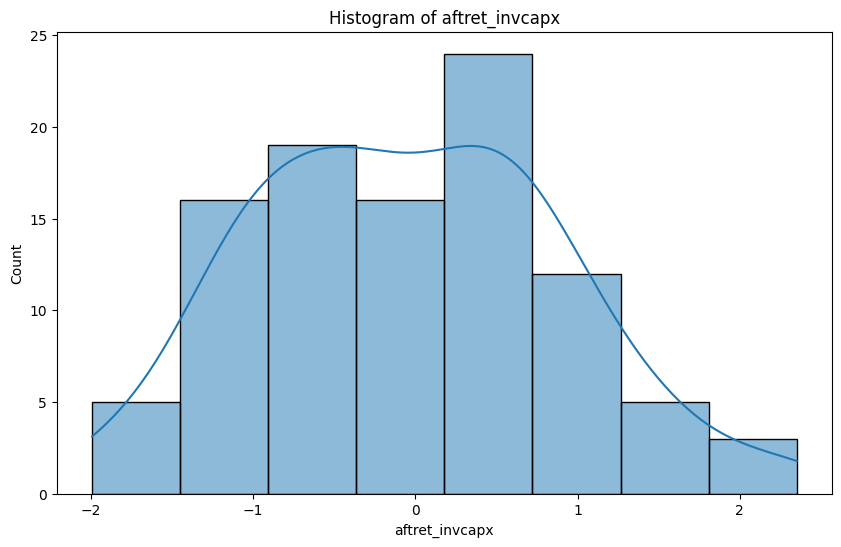

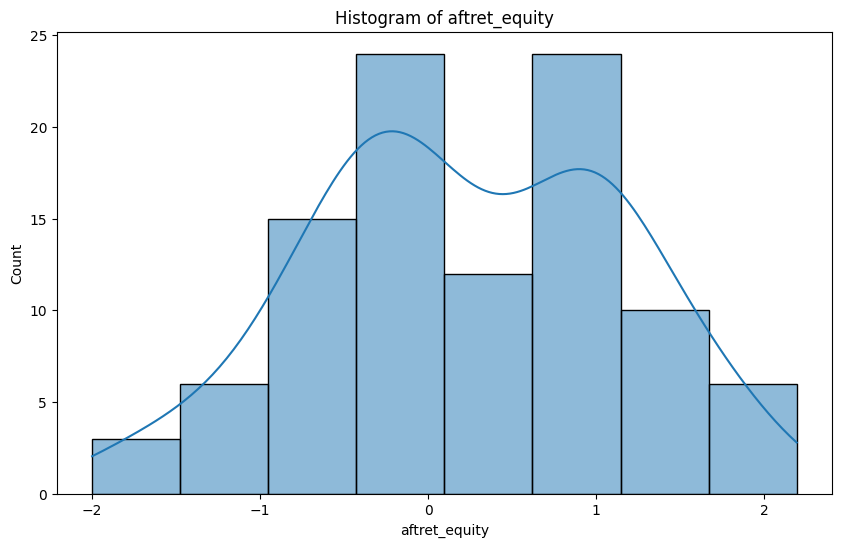

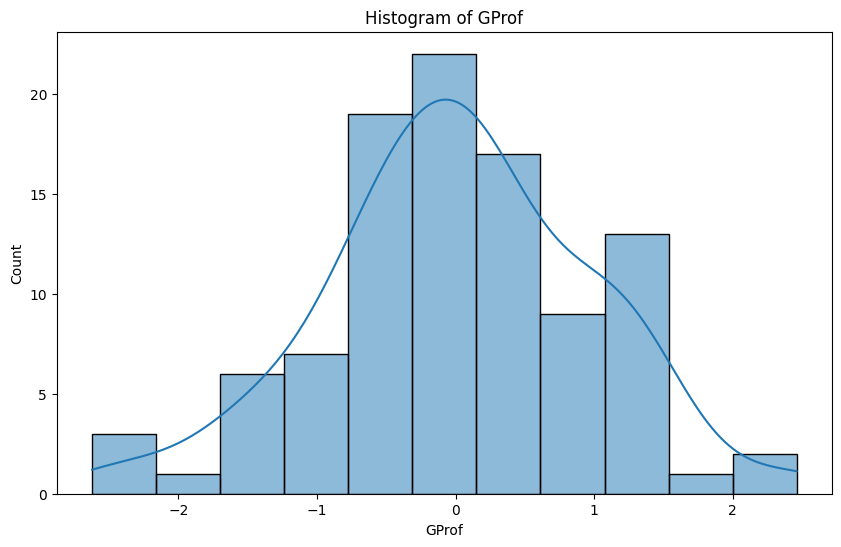

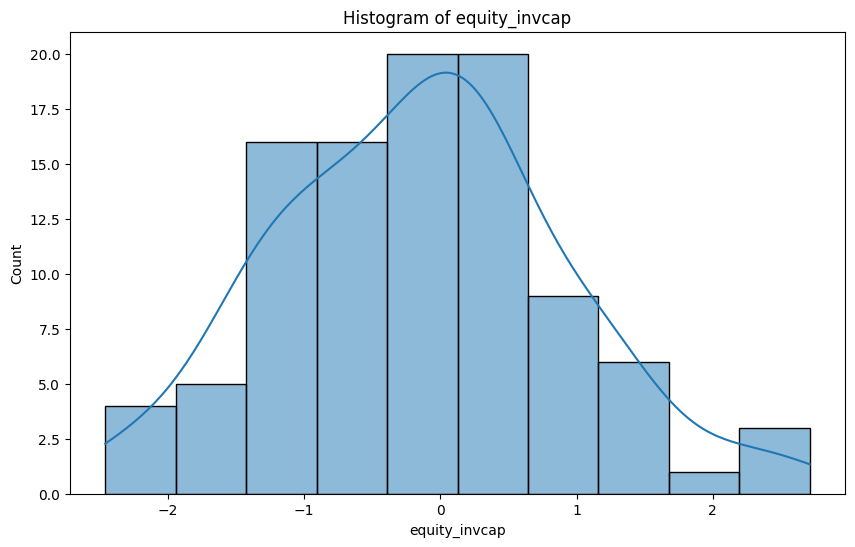

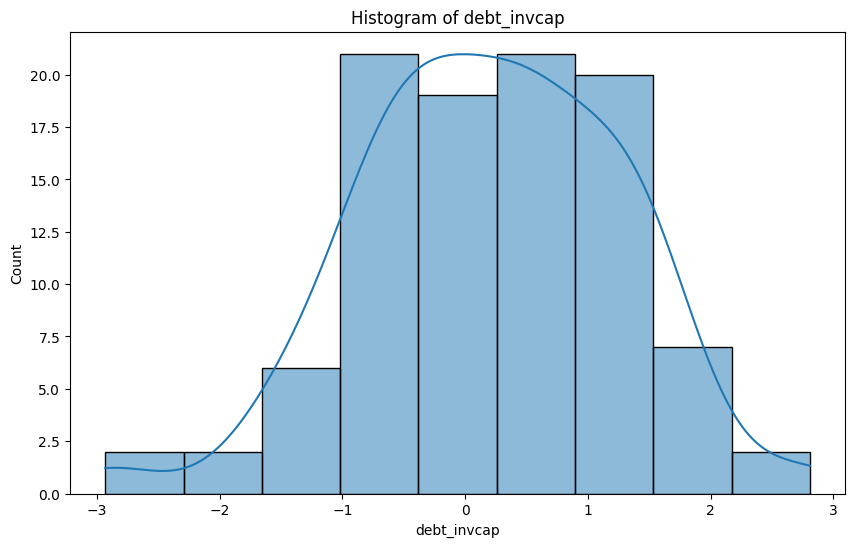

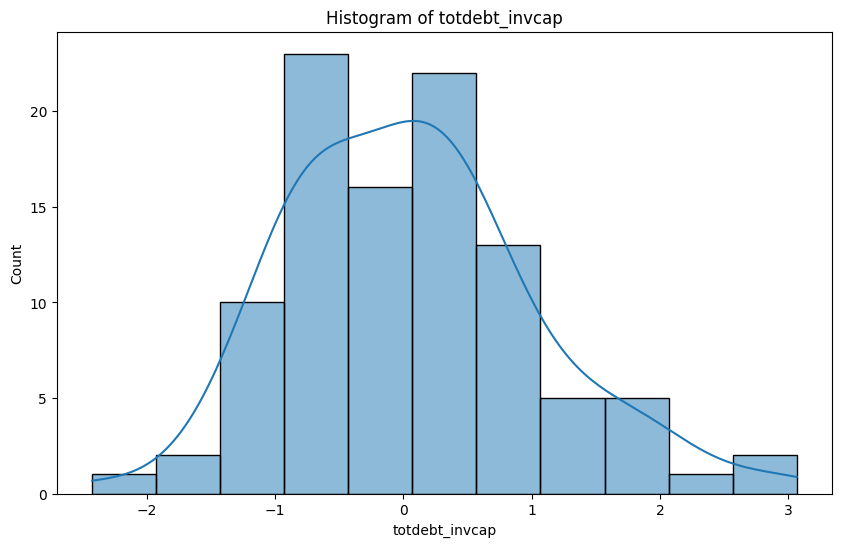

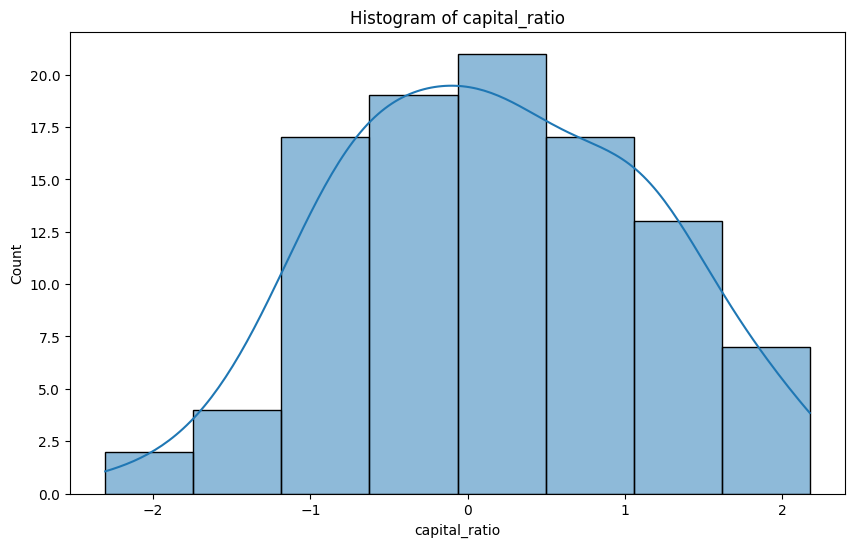

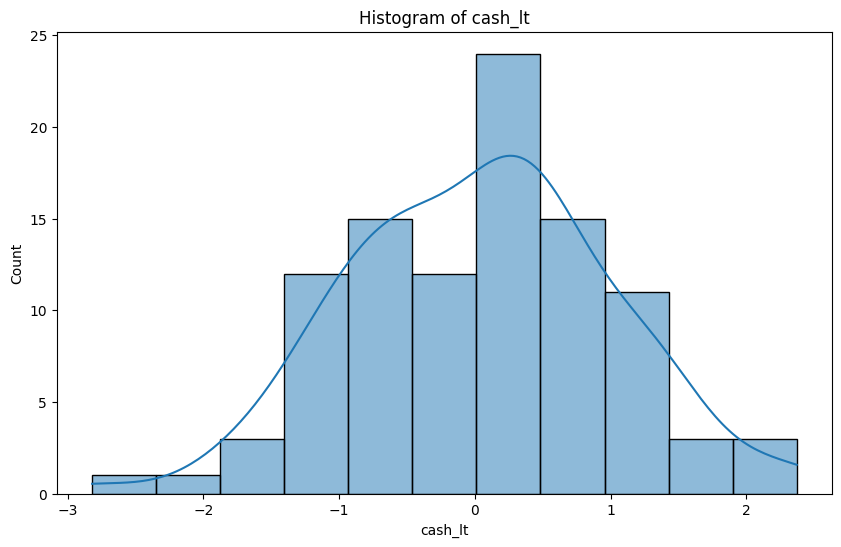

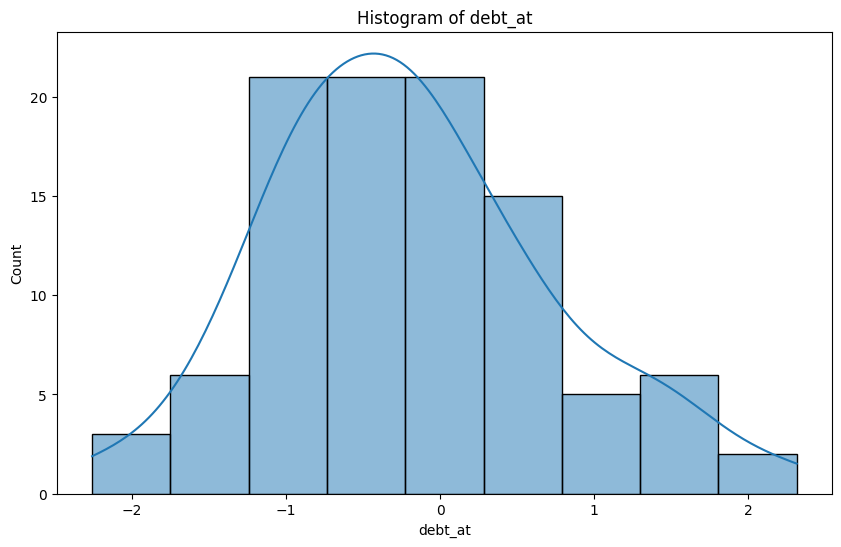

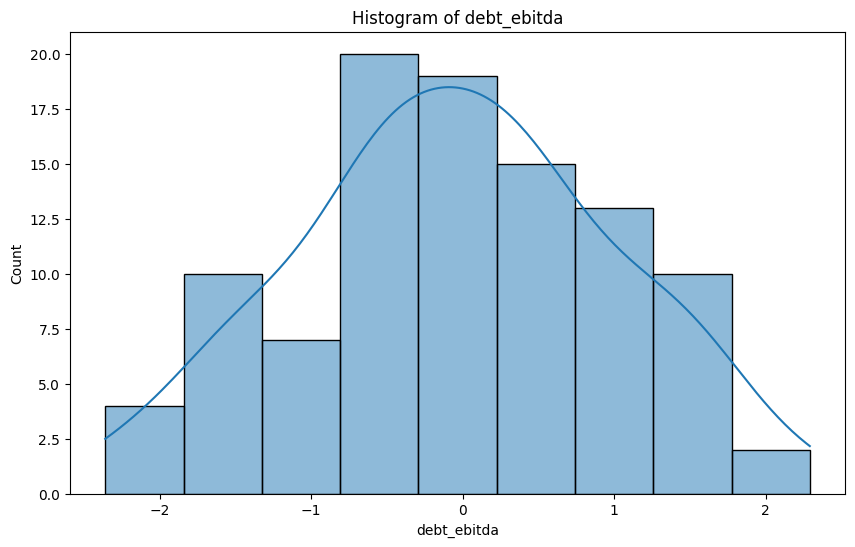

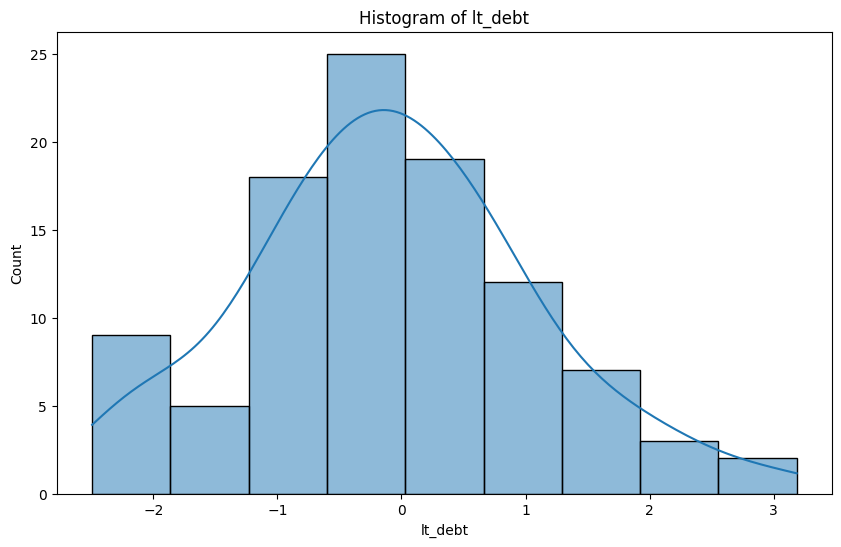

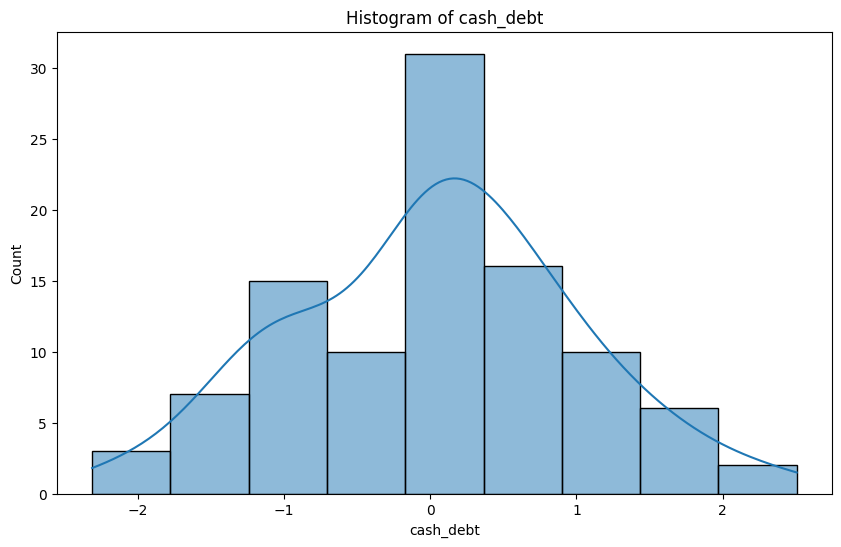

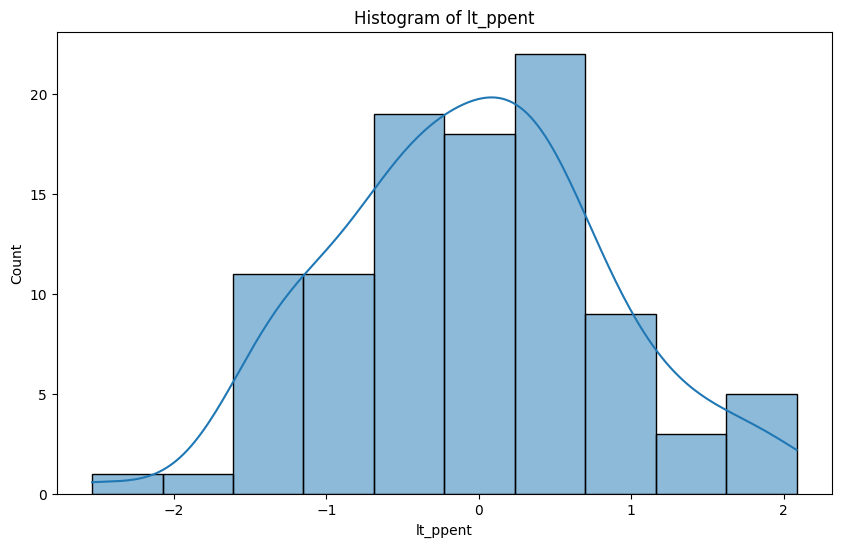

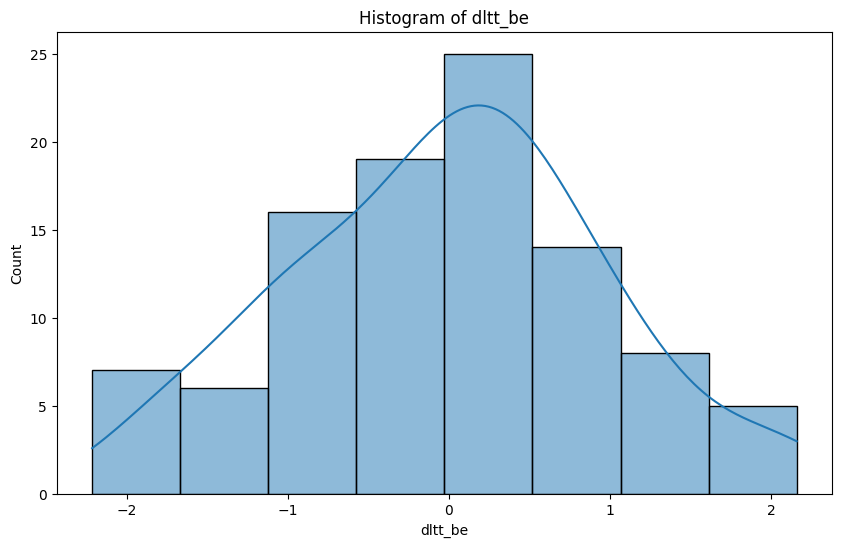

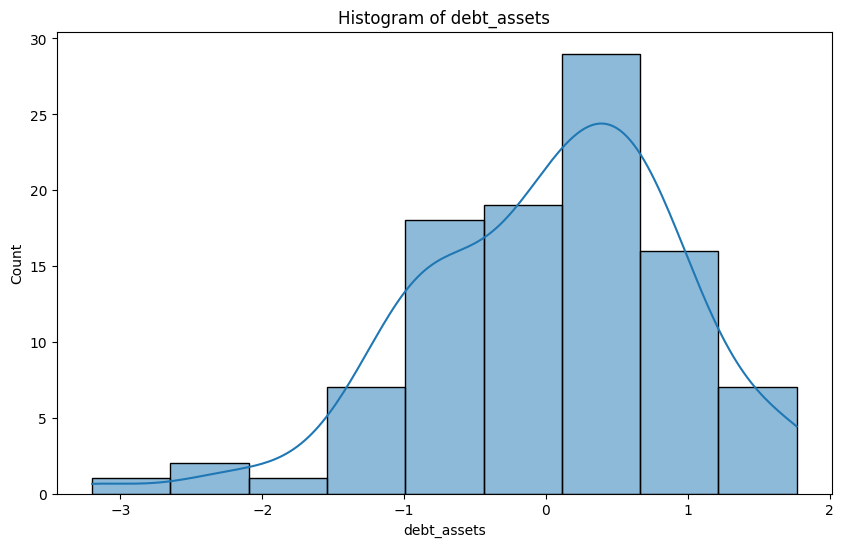

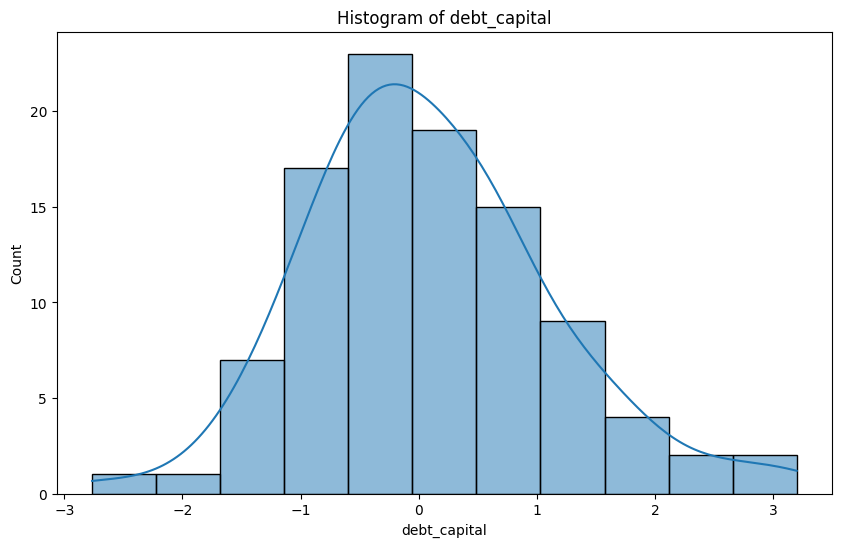

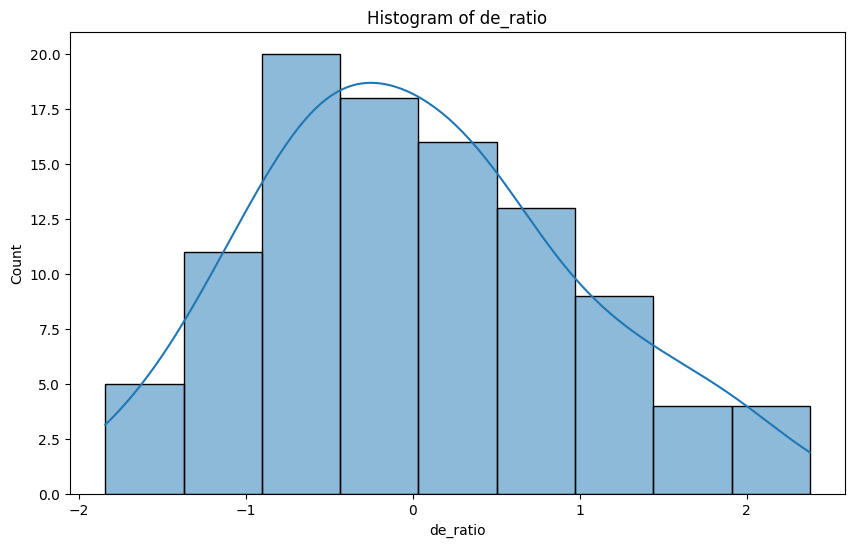

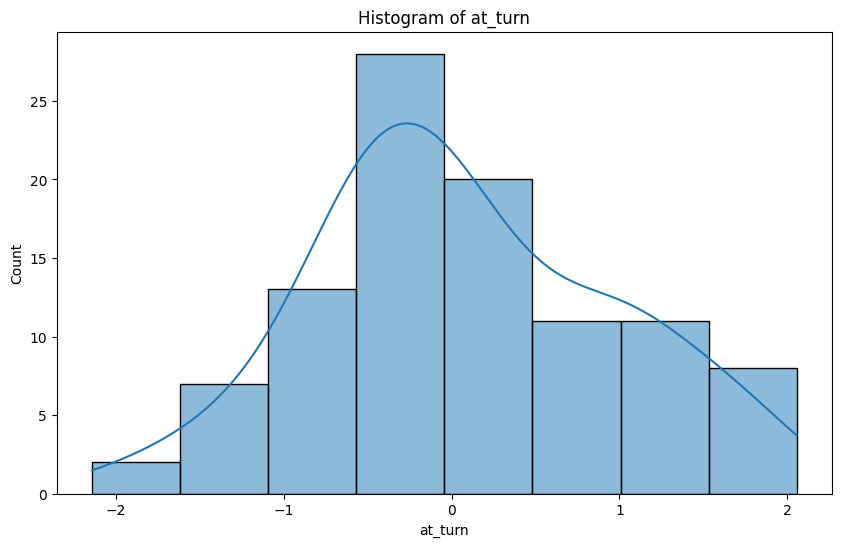

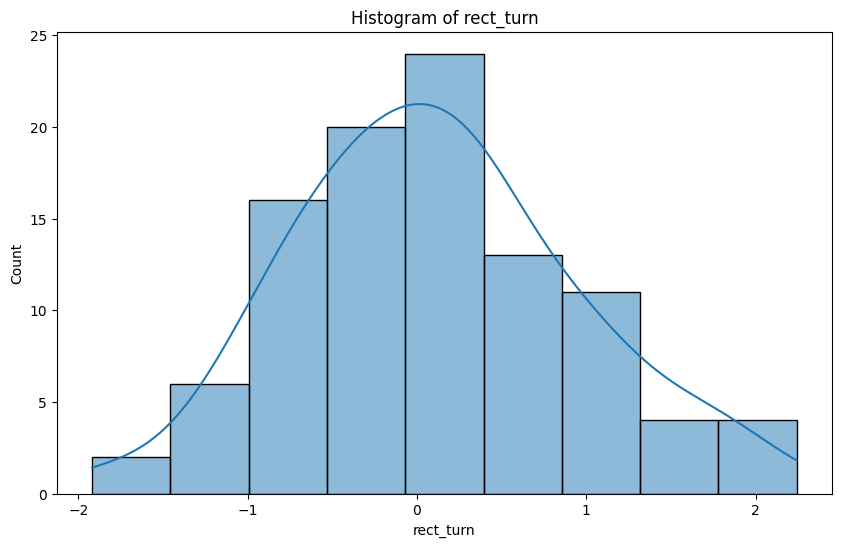

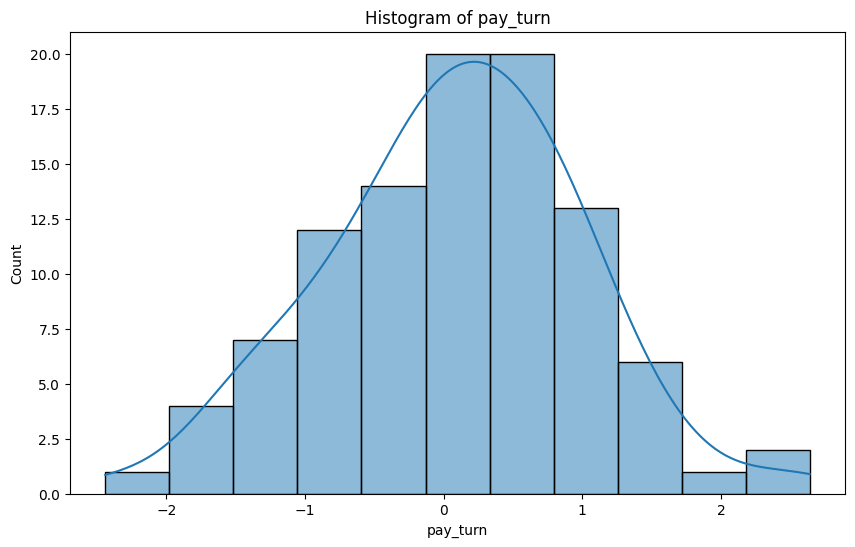

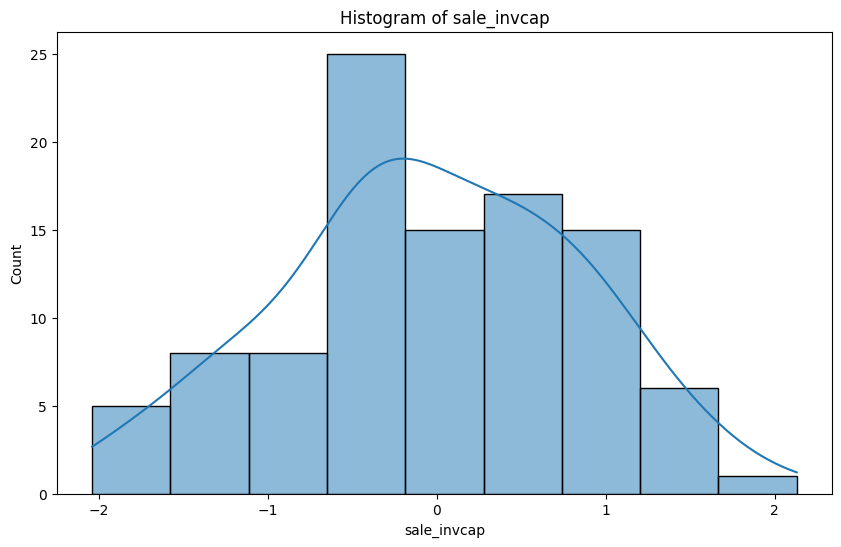

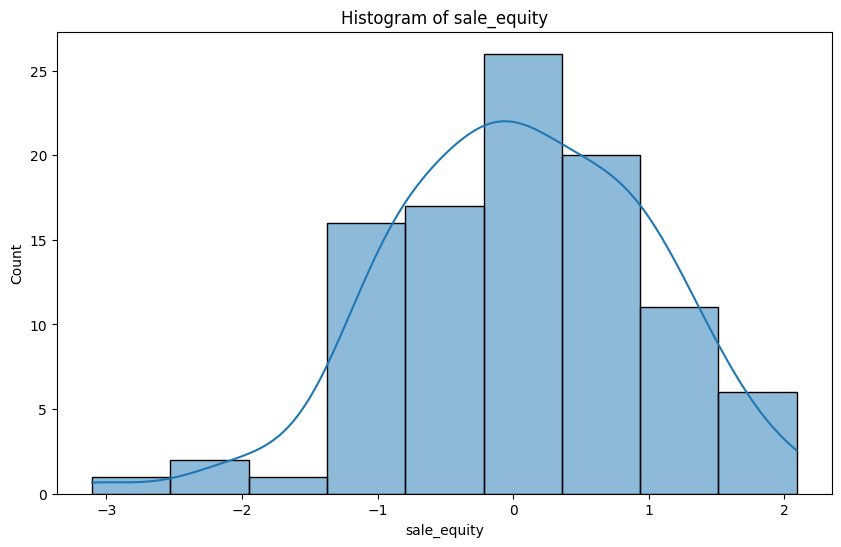

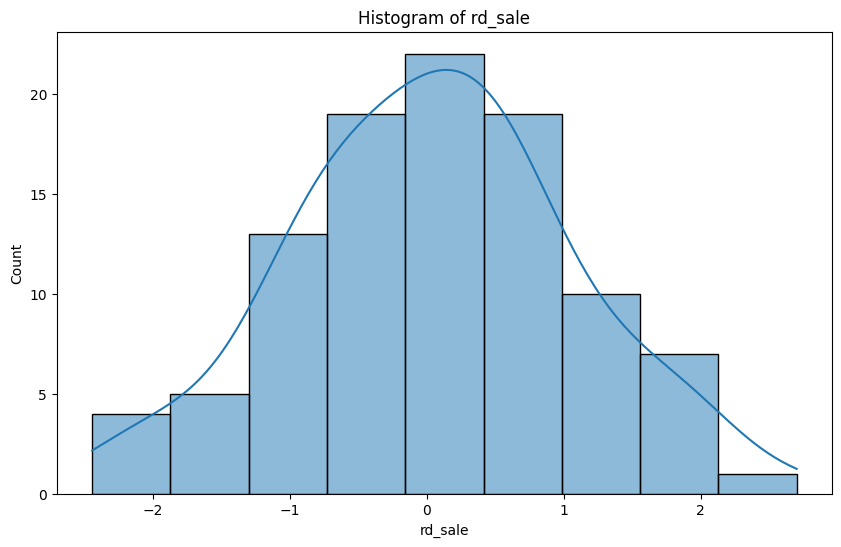

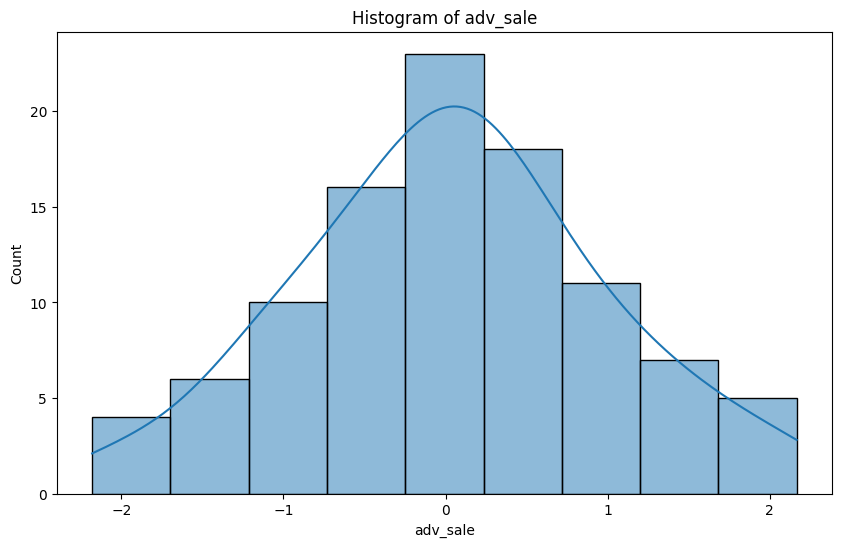

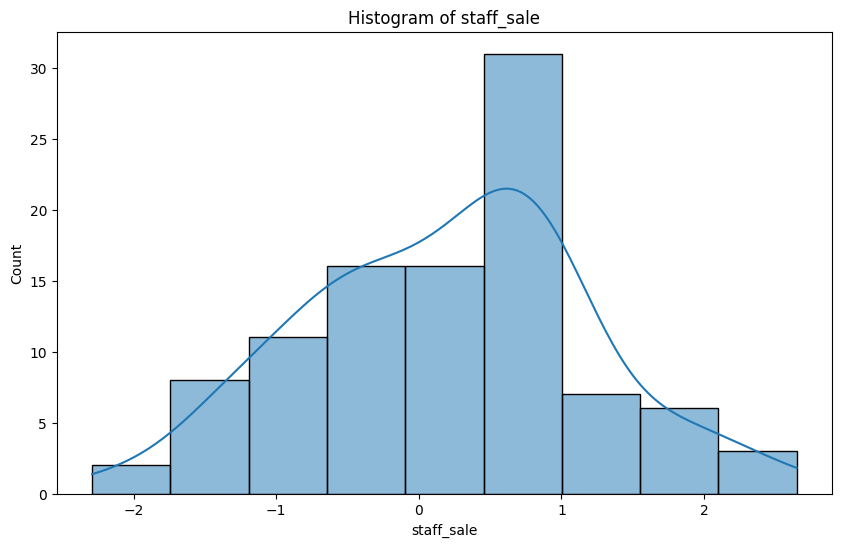

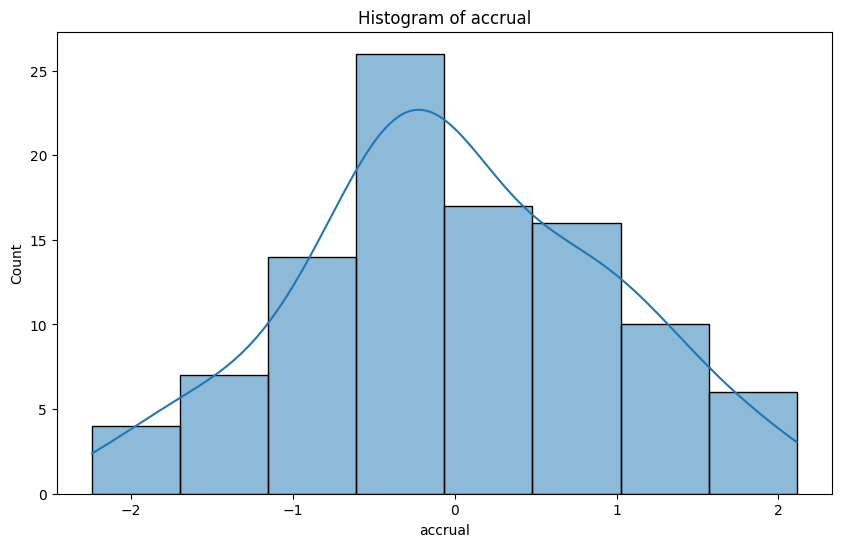

In [12]:
import seaborn as sns

# # For a single column
# sns.histplot(df['column_name'], kde=True)
# plt.title('Histogram of Column Name')
# plt.show()

# For multiple columns (individual histograms)
for col in numeric_columns.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_columns[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

## checking correlation

In [15]:
numeric_columns.columns

Index(['RATING_TYPE', 'Rating', 'FundaIndxint', 'FundaIndxsga', 'monthvwretd',
       'monthvwretx', 'monthewretd', 'monthewretx', 'monthsprtrn',
       'monthspindx',
       ...
       'de_ratio', 'at_turn', 'rect_turn', 'pay_turn', 'sale_invcap',
       'sale_equity', 'rd_sale', 'adv_sale', 'staff_sale', 'accrual'],
      dtype='object', length=153)

In [16]:
corr_feature=numeric_columns.drop(columns=['RATING_TYPE', 'Rating'])

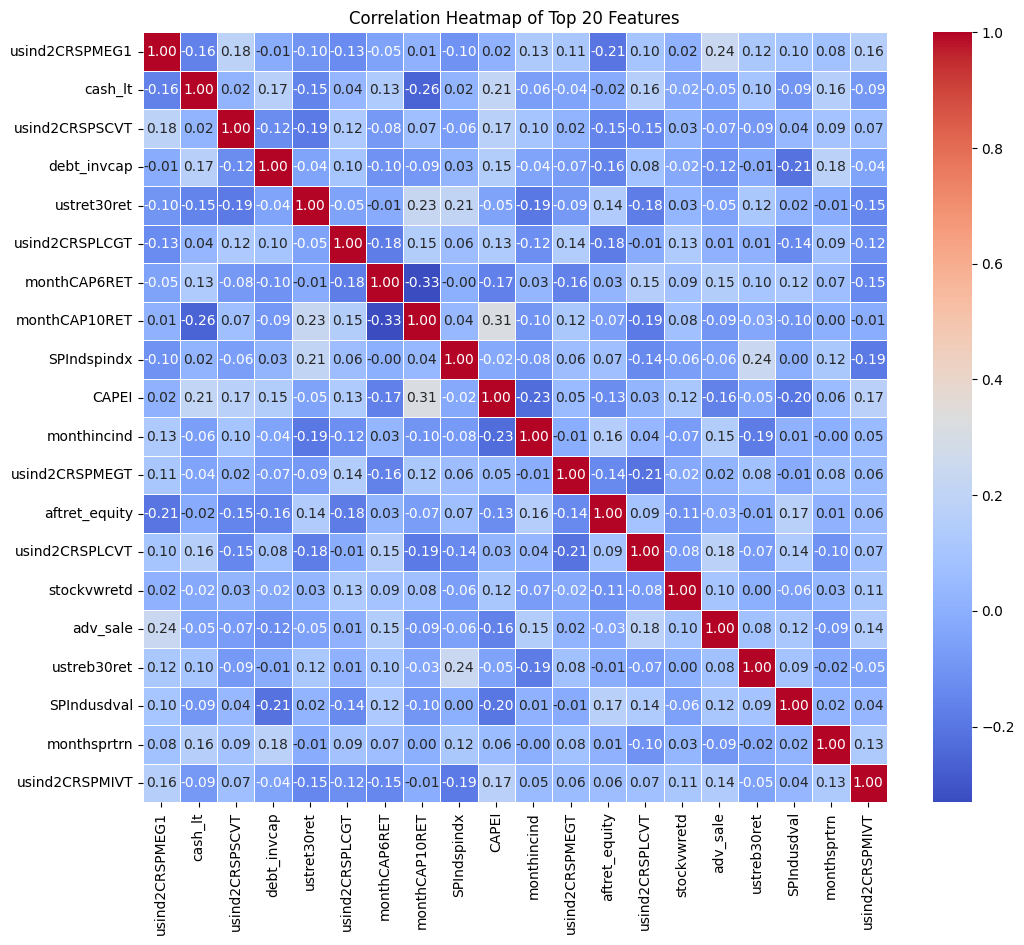

In [17]:
# Compute correlation matrix
corr_matrix = corr_feature.corr()

# Select top 20 correlated features
top_corr_features = corr_matrix.abs().mean().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns[top_corr_features].corr(), annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap of Top 20 Features")
plt.show()

## Box Plot for Outliers

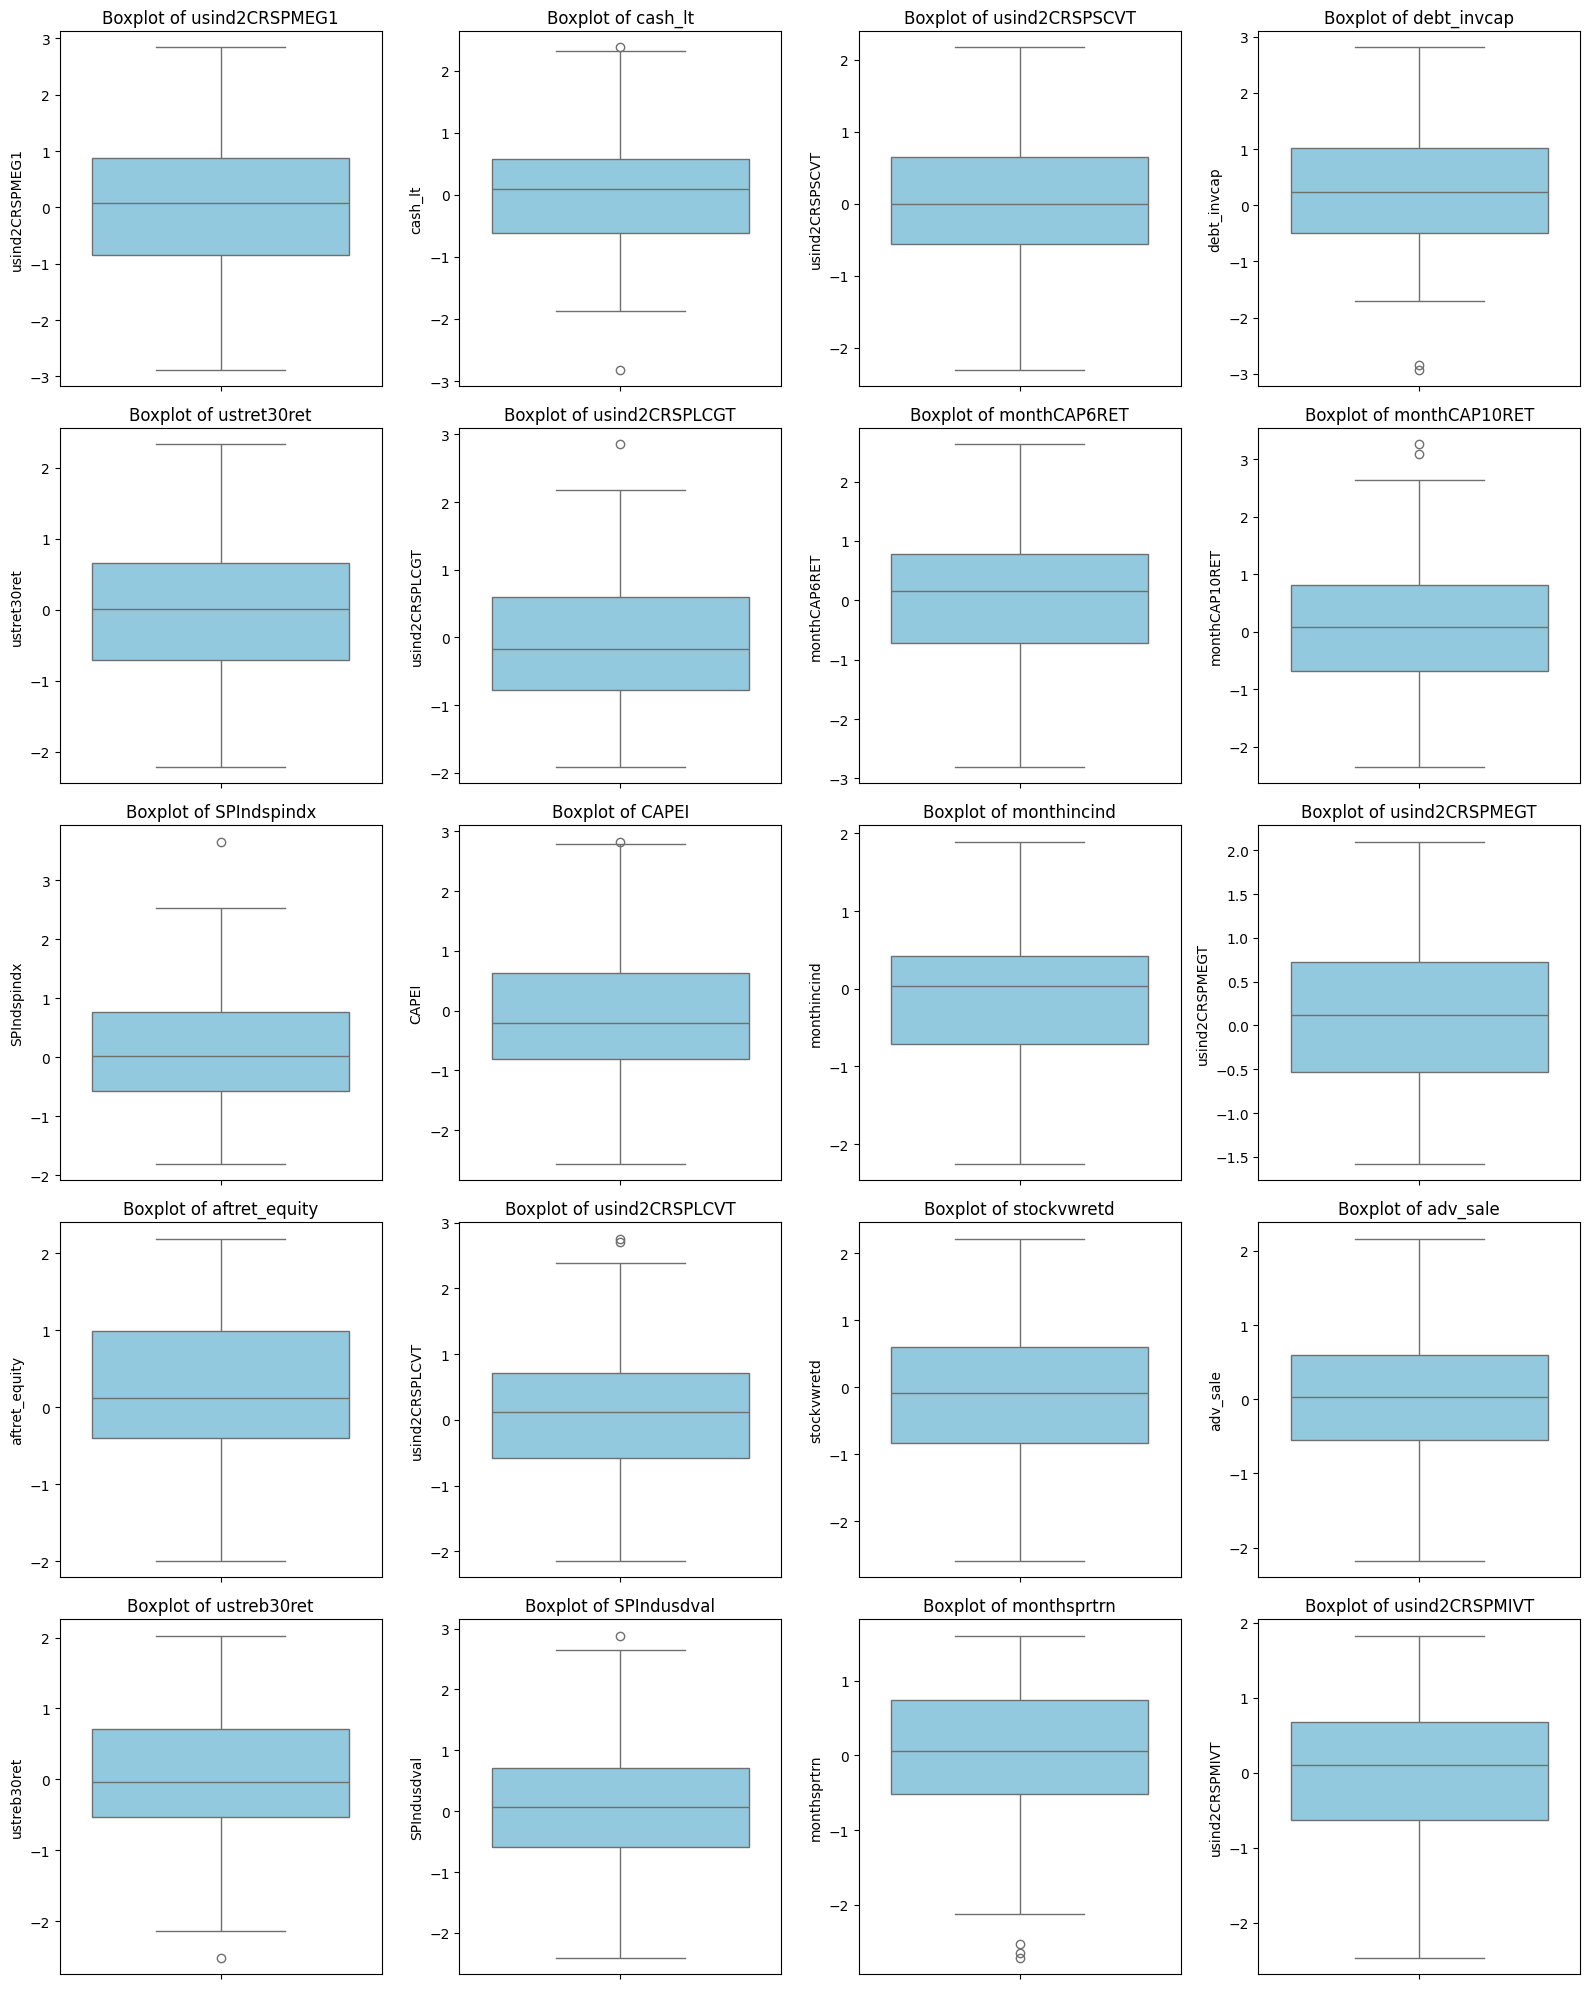

In [18]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))
axs = axs.flatten()

for i, col in enumerate(top_corr_features):
    sns.boxplot(y=numeric_columns[col], ax=axs[i], color='skyblue')
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## Removing Highly Correlated Features

In [190]:
# Create a mask to remove highly correlated features
corr_matrix = corr_feature.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.80:  # Set correlation threshold (e.g., 0.95)
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features
rhc = numeric_columns.drop(columns=correlated_features)
rhc.shape

(100, 153)

## Remove Outliers

In [191]:
from scipy.stats import zscore

def remove_outliers_zscore(data, threshold=3.0):
    # Calculate Z-Scores for numerical columns
    z_scores = data.select_dtypes(include=['float64', 'int64']).apply(zscore)
    
    # Filter data to remove rows where any z-score exceeds the threshold
    cleaned_data = data[(z_scores.abs() < threshold).all(axis=1)]
    
    return cleaned_data

# Example: Using Z-Score threshold of 3.0
ro = remove_outliers_zscore(rhc, threshold=3.0)
print(f"Original shape: {rhc.shape}")
print(f"Cleaned shape: {ro.shape}")

Original shape: (100, 153)
Cleaned shape: (77, 153)


## Classification Model Building

In [196]:
ro.reset_index(inplace=True,drop=True)
ro = ro.astype(str)
ro.head(2)

RATING_TYPE Rating          FundaIndxint         FundaIndxsga  \
0       Fitch     A+    0.1506590434832807  -0.4200474646275161   
1     Moody's     BB  -0.01571493985244664   0.1392041109568161   

            monthvwretd          monthvwretx         monthewretd  \
0   -0.8469337372476631   0.5602257109707197  0.5793034368722204   
1  -0.04524962373931993  -0.9121282566094987  0.4972917778307752   

           monthewretx          monthsprtrn          monthspindx  ...  \
0  -0.5783139229273008  -0.2250059033703754  -0.4158673414117847  ...   
1  -0.9105578447398801    1.207592170430262  -0.1040497567996367  ...   

              de_ratio             at_turn            rect_turn  \
0  -0.7477440313366499  -0.810214566811094   0.3081137166429908   
1   0.6105642755423011   1.201836806061213  -0.4695857181033816   

              pay_turn           sale_invcap          sale_equity  \
0  -0.5963290157224306   -0.2354246245506398  -0.4566760979103481   
1   0.9254726334215964  -0.02161668689565994   -0.410983775992668   

             rd_sale            adv_sale          staff_sale  \
0  1.878286148978428  -1.338059500444486  0.8625645966638215   
1   1.42655481851817  -1.121401420557942  0.8537636181219457   

              accrual  
0  0.8226480216976622  
1  0.9786529554145913  

[2 rows x 153 columns]

In [197]:
ro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 153 entries, RATING_TYPE to accrual
dtypes: object(153)
memory usage: 92.2+ KB


In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [199]:
# Load your dataset
# Separate features and target column
X = ro.drop(['Rating'], axis=1)
y = ro['Rating']
cat=X[['RATING_TYPE']]

# Identify categorical columns
categorical_cols = cat.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = pd.DataFrame(encoder.fit_transform(cat[categorical_cols]))

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, cat_encoded], axis=1)

# Label Encoding for the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X.columns = X.columns.astype(str)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.14      0.33      0.20         3
           7       0.20      1.00      0.33         1

    accuracy                           0.25        16
   macro avg       0.17      0.35      0.21        16
weighted avg       0.13      0.25      0.16        16



C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

##### Model is not performing well may be we have small dataset and with respect to rows we have lot of features now we can try to reduce features

## Feature Selection

### drop low variance features

In [200]:
lv=X.copy()

In [201]:
lv.drop(columns=['0','1','2'],inplace=True)
lv

FundaIndxint          FundaIndxsga           monthvwretd  \
0     0.1506590434832807   -0.4200474646275161   -0.8469337372476631   
1   -0.01571493985244664    0.1392041109568161  -0.04524962373931993   
2     -1.330074065514785  0.001813611194676231    -2.564341981460694   
3   -0.02528762557112797    0.7559352817916524     1.142725883293832   
4    -0.7345476499475264    0.4138748372508074    0.5990933258291411   
..                   ...                   ...                   ...   
72   -0.3393862931781969    0.6475581090137137    0.4850941116132751   
73   -0.8152709365219237    0.5360265349048582    -2.062525673911749   
74    0.6990923818599891    0.8401711592784255     2.341975202512995   
75    -0.481248133823506    -0.539745359324594     1.611792765718436   
76    -2.093794004035063     -1.41996163299169   -0.8129555481186533   

            monthvwretx          monthewretd          monthewretx  \
0    0.5602257109707197   0.5793034368722204  -0.5783139229273008   
1   -0.9121282566094987   0.4972917778307752  -0.9105578447398801   
2    0.9971152218978201   0.7628472907981209  -0.8708646476463285   
3    -0.235318741907252   0.6379666990209654   -1.611961179650085   
4   0.01506438157899474   0.4587101715590127  -0.3296173418064082   
..                  ...                  ...                  ...   
72   0.4515159420189697   0.4453988244117404  -0.3232652892960562   
73   0.6438026017043184  0.01421188881619715    1.143065902889919   
74   0.6839616374744509    2.276651626398837  -0.4187048408064489   
75   0.6681009517567125   0.1098529469547445   0.3715938304865265   
76  -0.1892076594956772     1.12964948497237  -0.1183979005462292   

             monthsprtrn          monthspindx         monthCAP1RET  \
0    -0.2250059033703754  -0.4158673414117847    -1.21575337416725   
1      1.207592170430262  -0.1040497567996367   0.1542473137340681   
2     0.2304872146035031   0.5152728529867655  -0.1586554958685864   
3     0.4323087311907701    1.194181962551069   -1.186641517365048   
4     0.1329361852226909   -1.499836911323544  0.02330760088586962   
..                   ...                  ...                  ...   
72  -0.09709956740332326  -0.7803016538569048  -0.8882107554472478   
73   0.05431888645423658   0.6401898237071239   -1.363039658551122   
74     1.138170740137805   0.4027682919930936   -0.672489473130284   
75    0.6181405952806814   -1.163220540090404  -0.4895394436915037   
76   -0.5037044806731414    2.564057949300346   0.6225563333425816   

           monthCAP2RET  ...              de_ratio               at_turn  \
0   -0.4763006409688278  ...   -0.7477440313366499    -0.810214566811094   
1     1.388312701433808  ...    0.6105642755423011     1.201836806061213   
2     1.659947602725288  ...  -0.08141274691167123    0.5789193065864303   
3     1.275644482625774  ...    0.8568280095944134  -0.06749798224982147   
4    -2.324679272486469  ...     1.152037319464942    0.5401597088701403   
..                  ...  ...                   ...                   ...   
72   0.9795929508408657  ...   -0.3231415381326366      2.05584853220123   
73   -1.334803838218977  ...     0.841021304225833   -0.2218723282821758   
74    1.109260202222924  ...  -0.01505387100160042    0.8755845824216522   
75    1.171580526882511  ...    0.5631787896796314   -0.4587216615831504   
76    2.028357192230239  ...    -0.634827360376867    0.1082915774550986   

               rect_turn              pay_turn           sale_invcap  \
0     0.3081137166429908   -0.5963290157224306   -0.2354246245506398   
1    -0.4695857181033816    0.9254726334215964  -0.02161668689565994   
2    -0.7646206181649926    -1.209669185414412      1.46368200197211   
3     0.4761740090044143    0.8459479247693732    -1.749977532781965   
4    -0.6520578136538172     -1.43409732599647    0.4369331241110122   
..                   ...                   ...                   ...   
72  -0.06762220807054127   -0.4190647448135233    -0.3354836

In [202]:
lv=lv.astype('float64')

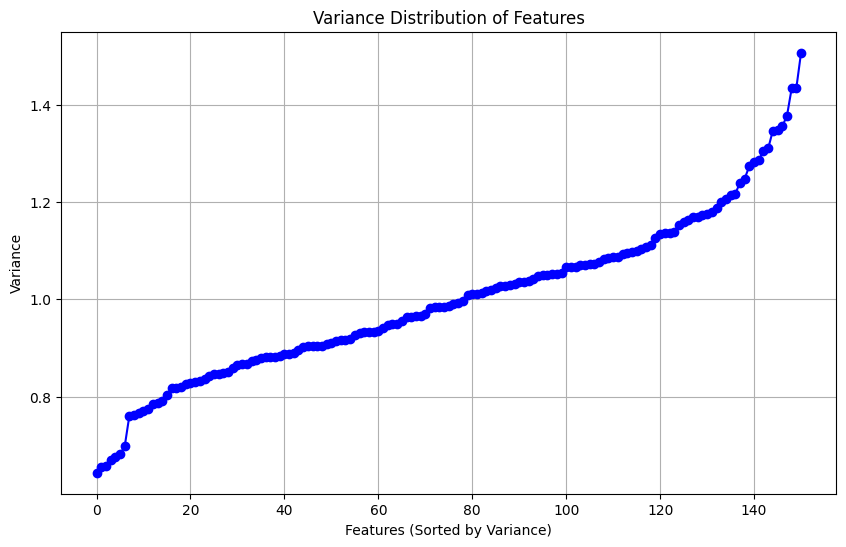

In [203]:
# Calculate variances for numerical columns
numeric_data = lv.select_dtypes(include=['float64', 'int64'])
variances = lv.var()

# Plot the variance distribution
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(variances)), sorted(variances), marker='o', color='blue')
plt.xlabel('Features (Sorted by Variance)')
plt.ylabel('Variance')
plt.title('Variance Distribution of Features')
plt.grid()
plt.show()


###### In Above plot we can see that variances range from approximately 0.65 to 1.55

###### so we can take the threshold 0.7 to reduce the feature size

In [204]:
from sklearn.feature_selection import VarianceThreshold
# Set threshold as the 10th percentile of the variance
threshold = variances.quantile(0.7)
selector = VarianceThreshold(threshold=threshold)
df_selected = selector.fit_transform(X)

# Get the selected features
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns)


Selected Features: Index(['monthvwretx', 'monthewretd', 'monthewretx', 'monthsprtrn',
       'monthCAP1RET', 'monthCAP3RET', 'monthCAP4RET', 'monthCAP6RET',
       'monthCAP9RET', 'monthCAP10RET', 'monthprtcnt', 'monthtotret',
       'monthtotind', 'SPIndewretx', 'SPIndusdcnt', 'SPporusdcnt',
       'usind2CRSPMEG1', 'usind2CRSPMIG1', 'stockvwretd', 'stockvwretx',
       'stockvwUsdVal', 'stockvwTotCnt', 'stockewUsdVal', 'stockewUsdCnt',
       'stocksprtrn', 'ustreb10ind', 'ustreb5ret', 'ustreb2ret', 'ustreb2ind',
       'ustreb1ret', 'ustret90ind', 'index_y', 'CAPEI', 'evm', 'pe_op_dil',
       'opmbd', 'gpm', 'cfm', 'aftret_eq', 'equity_invcap', 'lt_debt'],
      dtype='object')


In [205]:
len(selected_columns)

41

### Here i am using  Random_Forest for feature importance

In [229]:
fi=ro.copy()
fi.head(2)

RATING_TYPE Rating          FundaIndxint         FundaIndxsga  \
0       Fitch     A+    0.1506590434832807  -0.4200474646275161   
1     Moody's     BB  -0.01571493985244664   0.1392041109568161   

            monthvwretd          monthvwretx         monthewretd  \
0   -0.8469337372476631   0.5602257109707197  0.5793034368722204   
1  -0.04524962373931993  -0.9121282566094987  0.4972917778307752   

           monthewretx          monthsprtrn          monthspindx  ...  \
0  -0.5783139229273008  -0.2250059033703754  -0.4158673414117847  ...   
1  -0.9105578447398801    1.207592170430262  -0.1040497567996367  ...   

              de_ratio             at_turn            rect_turn  \
0  -0.7477440313366499  -0.810214566811094   0.3081137166429908   
1   0.6105642755423011   1.201836806061213  -0.4695857181033816   

              pay_turn           sale_invcap          sale_equity  \
0  -0.5963290157224306   -0.2354246245506398  -0.4566760979103481   
1   0.9254726334215964  -0.02161668689565994   -0.410983775992668   

             rd_sale            adv_sale          staff_sale  \
0  1.878286148978428  -1.338059500444486  0.8625645966638215   
1   1.42655481851817  -1.121401420557942  0.8537636181219457   

              accrual  
0  0.8226480216976622  
1  0.9786529554145913  

[2 rows x 153 columns]

In [230]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical ratings
le = LabelEncoder()
fi['Rating_encoded'] = le.fit_transform(fi['Rating'])

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming your target variable is 'target', split data into X and y
X = fi.drop(columns=['Rating','RATING_TYPE','Rating_encoded'])
y = fi['Rating_encoded']

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort the features based on importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance['rank'] = feature_importance['importance'].rank(ascending=False, method='min')

# Select top N important features (e.g., top 20)
top_features = feature_importance['feature']
data_reduced = X[top_features]


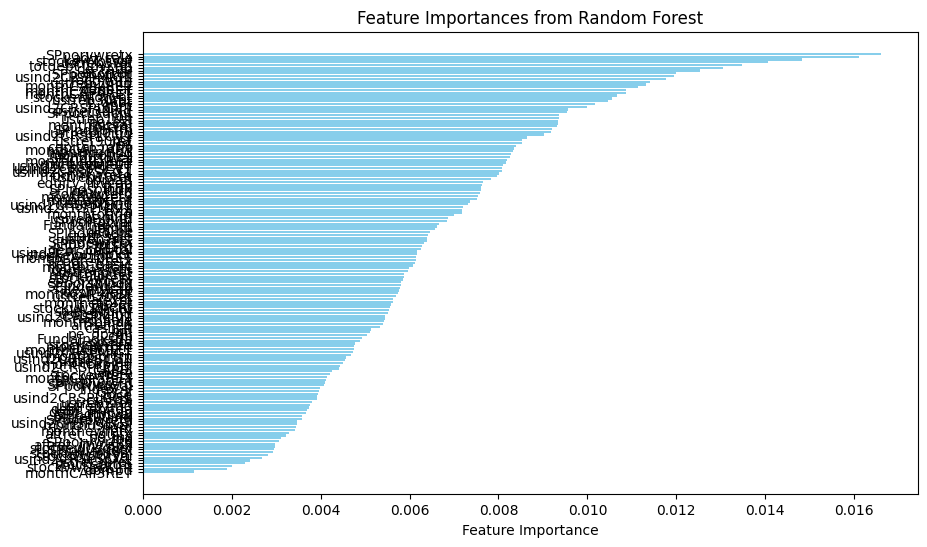

In [232]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [233]:
import numpy as np

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()

# Select features covering 80% cumulative importance
selected_features = feature_importance[feature_importance['cumulative_importance'] <= 0.50]['feature']

# Reduce the dataset using selected features
data_reduced = X[selected_features]

In [234]:
data_reduced

SPporvwretx             adv_sale        stockewTotVal  \
0      1.141628864329489   -1.338059500444486   0.7064056244338486   
1    -0.4421549702365202   -1.121401420557942   -1.275875615806138   
2   -0.01796428845715618  -0.5330306601389762  -0.8964366752815985   
3    -0.2046212879263455   -1.482237222042392  -0.7103980236691914   
4    -0.1477220450830762   0.6649373179706672   -1.683152806036404   
..                   ...                  ...                  ...   
72    0.5371605014609561  -0.6426497279703051  -0.6617998452810052   
73    -1.570928057121767  -0.5360249228981794    0.273366852785388   
74   -0.6488521834098897    1.201069458105084   -1.251842959424773   
75      1.10501843885161     -1.9134303722621    1.189293078288765   
76     2.185779812271167   0.4904444483426685  -0.2987697225650584   

             ustreb5ret       totdebt_invcap              de_ratio  \
0     1.825537038023988  0.02647857853564339   -0.7477440313366499   
1     -1.23928746730438    1.431231004943115    0.6105642755423011   
2   -0.6243376512561662    1.487775795417203  -0.08141274691167123   
3    -1.120691582383748  -0.9276600605294759    0.8568280095944134   
4     1.352244141646078    0.657603556595542     1.152037319464942   
..                  ...                  ...                   ...   
72   0.6521535261796981  -0.5284719699897366   -0.3231415381326366   
73   0.3226323183103053    0.396286310742314     0.841021304225833   
74   -1.253306123199482  0.07969195998551978  -0.01505387100160042   
75   0.1419210128523525  -0.0844623539595969    0.5631787896796314   
76  -0.5505242111902932   0.1806870585323787    -0.634827360376867   

                accrual           SPportotcnt        usind2CRSPMIG1  \
0    0.8226480216976622    0.1603164287869965   -0.7829891742962404   
1    0.9786529554145913     1.728681575814307     2.097410068449485   
2   -0.3024738583924699     0.654536849827144    -1.096045496253452   
3    0.9575132619217975   -0.6663091219490861     -1.58854236172555   
4    0.7212073112874688   -0.8116811003245956  -0.08577651517231642   
..                  ...                   ...                   ...   
72  -0.9291924493536243   0.02169205552628419    -1.305358525584367   
73  -0.6979765412447562   -0.9463779873578178   -0.1152842008532188   
74   0.7844695175240562  -0.06852724485752469   -0.4362021934813096   
75  -0.3875435145156708     0.179628599455004    0.7965149607928405   
76   0.4089106558527965    -1.506241385626309    0.7961336649237618   

               rect_turn  ...         usind2CRSPMEVT       usind2CRSPSCVT  \
0     0.3081137166429908  ...     0.1206040073075034  -0.4987263000738232   
1    -0.4695857181033816  ...   -0.09365776143285096  -0.6699206444384841   
2    -0.7646206181649926  ...      1.959210360111803   -1.001747432709716   
3     0.4761740090044143  ...    -0.4577637854313059  -0.4775153422435507   
4    -0.6520578136538172  ...  -0.006201691433075678  0.06406067018617992   
..                   ...  ...                    ...                  ...   
72  -0.06762220807054127  ...       1.47381233366588   0.6363184450606509   
73    0.2359907646150768  ...     0.8720637069332758   0.5011699345275458   
74   -0.5486206400693285  ...     -0.722685366601347   0.7756464927937428   
75     1.864499723387421  ...      2.305163858754141    2.173165664143021   
76   -0.2926175153797747  ...    -0.2102077019931463   -2.307531518332483   

         usind2CRSPSCG1           monthvwretd             ustreb10ret  \
0     1.493474213473005   -0.8469337372476631      -1.616169719730329   
1     2.118975146918098  -0.04524962373931993      -1.262321085316004   
2   0.02943565756810758    -2.564341981460694      0.6813541422662691   
3    -1.158214347088974     1.142725883293832     -0.3130966609890666   
4     1.033015744469201    0.5990933258291411    -0.08305129483526144   
..                  ...                   ...                     ...   
72    1.595282994507029    0.4850941116132

### model building after feature selection

In [235]:
a=fi[['RATING_TYPE','Rating']]

In [236]:
fs = pd.concat([data_reduced,a], axis=1)

In [237]:
# Load your dataset
# Separate features and target column
X = fs.drop(['Rating'], axis=1)
y = fs['Rating']
cat=X[['RATING_TYPE']]

# Identify categorical columns
categorical_cols = cat.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = pd.DataFrame(encoder.fit_transform(cat[categorical_cols]))

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, cat_encoded], axis=1)

# Label Encoding for the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X.columns = X.columns.astype(str)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=264, random_state=42)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.375
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.40      0.67      0.50         3
           7       0.17      1.00      0.29         1

    accuracy                           0.38        16
   macro avg       0.32      0.40      0.31        16
weighted avg       0.34      0.38      0.32        16



C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## HyperParameter Tuining

In [238]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                    n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the data
random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 257}
Best Score: 0.29358974358974355


In [240]:
# Load your dataset
# Separate features and target column
X = fs.drop(['Rating'], axis=1)
y = fs['Rating']
cat=X[['RATING_TYPE']]

# Identify categorical columns
categorical_cols = cat.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = pd.DataFrame(encoder.fit_transform(cat[categorical_cols]))

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, cat_encoded], axis=1)

# Label Encoding for the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X.columns = X.columns.astype(str)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=257,max_depth=50,min_samples_leaf=1,min_samples_split=9,bootstrap=True, random_state=42)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.375
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.38      1.00      0.55         3
           7       0.25      1.00      0.40         1

    accuracy                           0.38        16
   macro avg       0.27      0.38      0.26        16
weighted avg       0.27      0.38      0.27        16



C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Viky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif